# MS960 - Aprendizado de Máquinas: Aspectos Teóricos e Práticos

## 2S2021 - Projeto I - Relatório Simplificado

### Grupo:

- **RA 155743 - Hugo Ricardo Ribeiro Matarozzi;**
- **RA 170093 - Isabella Mi Hyun Kim;**
- **RA 195171 - Bryan Alves do Prado.**

---

# Inicialização

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
filepath_casesBrazil = './casesBrazil_2.csv'
filepath_imageMNIST = './imageMNIST.csv'
filepath_labelMNIST = './labelMNIST.csv'

---

# Parte I - Regressão Linear

> O arquivo casesBrazil.csv contém dados do número oficial de casos do COVID-19 no Brasil, a partir de 25 de fevereiro de 2020, e se estendendo pelos 100 dias seguintes. A primeira coluna contém o índice do dia (dia 1, 2, 3, etc.) e
a segunda contém o número de casos registrados.

In [5]:
data_1 = pd.read_csv(filepath_casesBrazil)

## Questão 1

> Como vimos, a regressão linear pode ser usada também para o ajuste de curvas não lineares, bastando que se façam as transformações adequadas dos atributos. Com base nisso, implemente um algoritmo de regressão linear que ajuste um polinômio de grau n à curva do número de casos, usando gradiente descendente para a obtenção dos parâmetros. Faça testes com n = 3, 5, 10 e desenhe a curva de cada polinômio sobre os dados originais.

Nesta questão, realizaremos as seguintes etapas:

1. Realizar mudança de escala;
2. Criar polinômios;
3. Criar função custo (regressão linear);
4. Criar função para gradiente descendente (regressão linear);
5. Criar função para exibição de gráficos;
6. Aplicar modelo no conjunto de dados e exibir gráficos.

### 1. Realizar mudança de escala

Como precisamos trabalhar com potências de X, é importante normalizar nossos dados para mitigar distorções devido à mudança de escala. Colocamos assim todos os valores trabalhados na escala de 0 a 1:

In [6]:
def scaling(col):
    M, m = col.max(), col.min()
    col = (col - m)/(M-m)
    return col

In [7]:
X, y = data_1.day, data_1.cases
m = len(y)

X = scaling(X)

y = scaling(y)
y = y.values.reshape(m, 1)

### 2. Criar polinômios

Agora é necessário criar os polinômios dos graus desejados. No caso, podemos fazer uma função que cria o DataFrame cujas colunas são as potências do polinômio de grau n:

In [6]:
def createPol(col, n):
    n += 1
    X = pd.DataFrame({f'day^{i}': col**i for i in range(n)})
    m = X.shape[0]
    X = X.values.reshape(m,n)
    
    return X

In [7]:
X_3, X_5, X_10 = createPol(X, 3), createPol(X, 5), createPol(X, 10)

### 3. Criar função custo (regressão linear)

Neste passo implementamos a função custo no caso da regressão linear, para termos uma referência para a convergência de nosso modelo.

In [8]:
def costFunctionLinReg(X, y, theta):
    m = len(y)
    h = X.dot(theta)
    J = float((1/2*m)*(h-y).T @ (h-y))
    
    return J

### 4. Criar função para gradiente descendente (regressão linear)

De forma semelhante, precisamos implementar a função que realiza o algoritmo do gradiente descendente para regressão linear, de forma a encontrar os valores de theta em cada caso:

In [9]:
def gradientDescentLinReg(X, y, theta, alpha, nbr_iter):
    J_history = []
    m = len(y)
    
    for i in range(nbr_iter):
        h = X.dot(theta)
        theta = theta - (alpha/m)*(X.T.dot(h-y))
        J_history.append(costFunctionLinReg(X, y, theta))
    
    return theta, J_history

### 5. Criar função para exibição de gráficos;

Para visualizar o resultado, podemos criar uma função que exibe os gráficos pedidos:

In [10]:
def showPlot(X, y, theta, J_history):
    n = X.shape[1] - 1
    
    plt.scatter(X[:,1], y, c='red', marker='x', label='Dados de Treinamento')
    plt.plot(X[:,1], X.dot(theta), label=f'Regressão com polinômio de ordem {n}')
    plt.legend()

### 6. Aplicar modelo no conjunto de dados e exibir gráficos

Finalmente, inicializamos os thetas nulos com dimensões apropriados para cada polinômio e aplicamos o gradiente descendente. Os resultados são:

In [11]:
theta_3, theta_5, theta_10 = np.zeros([4, 1]), np.zeros([6, 1]), np.zeros([11, 1])
nbr_iter = 3000
alpha = 0.88

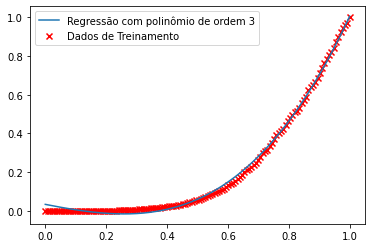

In [12]:
new_theta_3, J_history_3 = gradientDescentLinReg(X_3, y, theta_3, alpha, nbr_iter)
showPlot(X_3, y, new_theta_3, J_history_3)

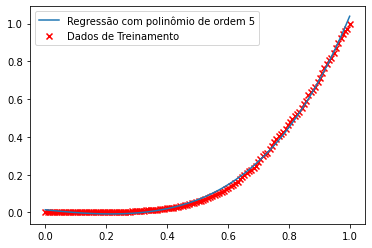

In [13]:
new_theta_5, J_history_5 = gradientDescentLinReg(X_5, y, theta_5, alpha, nbr_iter)
showPlot(X_5, y, new_theta_5, J_history_5)

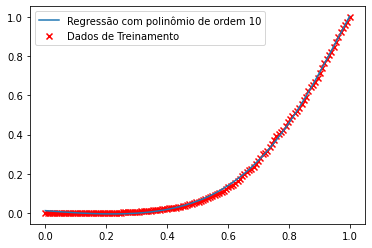

In [14]:
new_theta_10, J_history_10 = gradientDescentLinReg(X_10, y, theta_10, alpha, nbr_iter)
showPlot(X_10, y, new_theta_10, J_history_10)

## Questão 2

>A inspeção visual dos dados mostra que a curva poderia ser melhor aproximada por uma curva exponencial, ou seja:
>
>    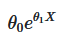
>
>Implemente um algoritmo de regressão linear com gradiente descendente que obtenha θ_0 e θ_1. Mostre a curva exponencial obtida sobreposta aos dados originais. DICA: Em vez de aproximar y por h_θ(x), aproxime log y por log h_θ(x).

Nesta questão, realizaremos as seguintes etapas:

1. Realizar mudança de escala;
2. Manipular dados para regressão exponencial;
3. Aplicar modelo no conjunto de dados e exibir gráfico;
4. Retornar à escala original e exibir gráfico.

### 1. Realizar mudança de escala

Mais uma vez, precisamos aplicar uma mudança de escala para as variáveis:

In [15]:
X, y = data_1.day, data_1.cases
m = len(y)

X = scaling(X)

y = scaling(y)
y = y.values.reshape(m, 1)

### 2. Manipular dados para regressão exponencial

Para realizar a regressão linear em uma função exponencial, usamos o logaritmo natural em y e em h de forma a linearizar nossa equação. Como y contém valores nulos, adicionamos uma folga de 0.001 de forma a não sairmos do domínio da função:

In [16]:
X_exp = {'X_0': np.ones([m, 1]), 'X_1': X}
X_exp = pd.DataFrame({f'day^{i}': X**i for i in range(2)})
X_exp = X_exp.values.reshape(m,2)

y_exp = np.log(0.001 + y)

### 3. Aplicar modelo no conjunto de dados e exibir gráfico

Agora podemos aplicar a já implementada função do gradiente descendente para regressão linear, agora nos dados manipulados, e exibir o gráfico:

In [17]:
theta_exp = np.zeros([2, 1])
nbr_iter = 3000
alpha = 1

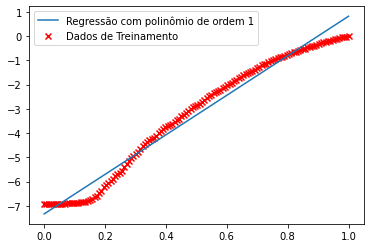

In [18]:
new_theta_exp, J_history_exp = gradientDescentLinReg(X_exp, y_exp, theta_exp, alpha, nbr_iter)
showPlot(X_exp, y_exp, new_theta_exp, J_history_exp)

### 4. Retornar à proporção original e exibir gráfico

Precisamos agora exibir o gráfico referente à proporção original, não-linearizada, dos dados. Basta realizar a transformação inversa nos dados, e obtemos:

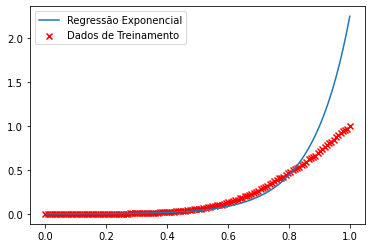

In [19]:
plt.scatter(X_exp[:,1],np.exp(y_exp) - 0.001 ,c='red',marker='x',label='Dados de Treinamento')
plt.plot(X_exp[:,1], np.exp(X_exp.dot(new_theta_exp)),label='Regressão Exponencial')
plt.legend()

## Questão 3

> Teste diferentes valores para a taxa de aprendizado α e mostre um gráfico do custo J em função de α. SUGESTÃO: Usar α = 10, 3, 1, 0.3, 0.1, 0.03, 0.01, 0.003, 0.001.

Nesta questão, realizaremos as seguintes etapas:

1. Criar função para exibição de gráfico;
2. Exibir gráficos referentes à questão 1 (polinomial);
3. Exibir gráficos referentes à questão 2 (exponencial).

### 1. Criar função para exibição de gráfico

Para exibir os gráficos, podemos criar funções que realizam a exibição com dependência em alpha.

In [20]:
def plotJalpha(X, y, theta, alpha, nbr_iter):  
    new_theta,J_history = gradientDescentLinReg(X, y, theta, alpha, nbr_iter)
    plt.plot(range(len(J_history)), J_history, label=f'alpha = {alpha}')
    plt.legend()

### 2. Exibir gráficos referentes à questão 1 (polinômios)

Iniciamos mostrando os gráficos referentes aos polinômios da questão 1. Para os valores de alpha = 10 e alpha = 3, o algoritmo não converge e o comportamento pode ser capturado para um baixo valor de iterações (nbr = 10).

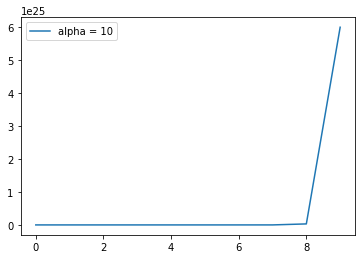

In [21]:
alpha = 10
plotJalpha(X_3, y, theta_3, alpha, 10)

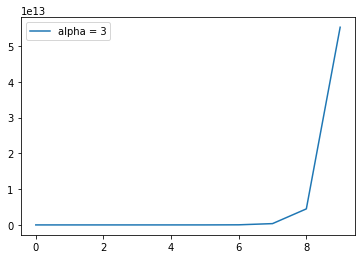

In [22]:
alpha = 3
plotJalpha(X_3, y, theta_3, alpha, 10)

Para alpha entre os valores 1, 0.3, 0.1, 0.03, 0.01, 0.003 e 0.001, fixamos o número de iterações (nbr_iter = 3000) e temos:

In [23]:
alpha_list = [1, 0.3, 0.1, 0.03, 0.01, 0.003, 0.001]
nbr_iter = 3000

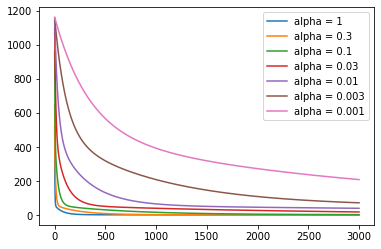

In [24]:
for alpha in alpha_list:
    plotJalpha(X_3, y, theta_3, alpha, nbr_iter)

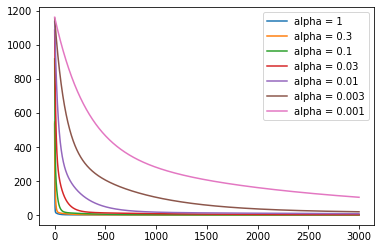

In [25]:
for alpha in alpha_list:
    plotJalpha(X_5, y, theta_5, alpha, nbr_iter)

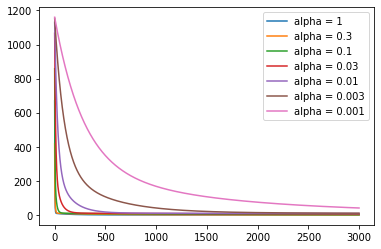

In [26]:
for alpha in alpha_list:
    plotJalpha(X_10, y, theta_10, alpha, nbr_iter)

### 3. Exibir gráfico referente à questão 2 (exponencial)

De forma semelhante, exibimos o gráfico referente à exponencial da questão 2. A análise é semelhante ao do caso anterior, com valores mais altos de alpha gerando divergência da função de custo, sempre utilizando os mesmos parâmetros:

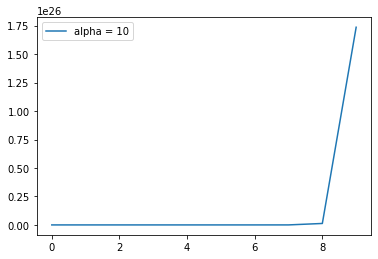

In [27]:
alpha = 10
plotJalpha(X_exp, y_exp, theta_exp, alpha, 10)

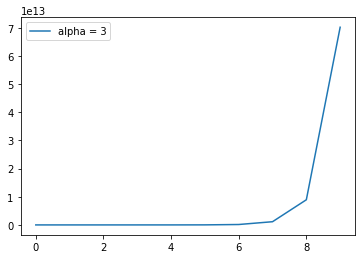

In [28]:
alpha = 3
plotJalpha(X_exp, y_exp, theta_exp, alpha, 10)

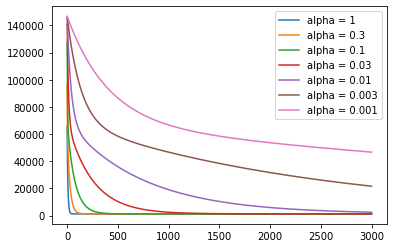

In [29]:
for alpha in alpha_list:
    plotJalpha(X_exp, y_exp, theta_exp, alpha, nbr_iter)

## Questão 4

> Implemente o ajuste de 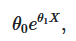mas agora usando equações normais.

Nesta questão, realizaremos as seguintes etapas:

1. Calcular o valor da equação normal;
2. Comparar os valores obtidos com a equação normal e com o gradiente descendente.

### 1. Calcular o valor da equação normal

Primeiramente, calculamos o valor da equação normal para a regressão linear, dada por

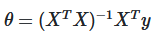
utilizando os valores já normalizados para melhor comparação com o theta obtido pelo método do gradiente descendente.

In [30]:
normal_theta_exp = np.linalg.pinv(X_exp.T @ X_exp) @ X_exp.T @ y_exp

### 2. Comparar os valores obtidos com a equação normal e com o gradiente descendente

Por fim, comparamos os valores obtidos:

In [31]:
print(f'Gradiente descendente:\n {new_theta_exp}\n\nEquação normal:\n {normal_theta_exp}')

Gradiente descendente:
 [[-7.33058934]
 [ 8.14271295]]

Equação normal:
 [[-7.33058934]
 [ 8.14271295]]


Note que foram obtidos resultados muito próximos, iguais até o grau de precisão exibido.

---

# Parte II - Regressão Logística

> Um dos problemas de maior importância para o desenvolvimento histórico de machine e deep learning foi o reconhecimento de dígitos manuscritos. Neste contexto, a base de imagens MNIST teve papel fundamental. A forma mais usual de reconhecer dígitos nessa base usando os algoritmos que aprendemos neste curso é linearizando cada imagem original de tamanho 20×20 para um vetor de comprimento 400. O arquivo imageMNIST.csv contém em cada linha uma imagem da base MNIST transformada em vetor. Já o arquivo labelMNIST.csv contém o dígito correspondente àquela linha.

In [32]:
data_2 = pd.read_csv(filepath_imageMNIST, sep=',', decimal=",")
data_3 = pd.read_csv(filepath_labelMNIST)

## Questão 1

> Implemente a regressão logística multi-classes para resolver este problema. Use vetorização sempre que possível. Mostre a porcentagem de imagens classificadas corretamente. Mostre também as imagens que ele classificou incorretamente, juntamente com o dígito verdadeiro e o dígito que o classificador atribuiu.

Nesta questão, realizaremos as seguintes etapas:

1. Criar função sigmóide;
2. Criar função custo (regressão logística);
3. Criar função para gradiente descendente (regressão logística);
4. Estruturar dados para a aplicação do modelo;
5. Aplicar modelo no conjunto de dados;
6. Avaliação de desempenho;
7. Exibição dos erros.

### 1. Criar função sigmóide

Primeiramente, precisamos imprementar uma simples função sigmóide:

In [33]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

### 2. Criar função custo (regressão logística)

A partir da função sigmóide, criamos uma nova função custo, agora para o nosso caso de regressão logística. Já pensando na classificação multi-classes, fazemos a função de forma que possa ser aceita uma matriz Y em vez de um vetor y, realizando as devidas adaptações com vetorização:

In [34]:
def costFunctionLogReg(X, Y, Theta):
    m = len(Y)
    h = sigmoid(X.dot(Theta))
    J = (-1/m)*np.diag(Y.T @ np.log(h) + (1-Y).T @ np.log(1-h))
    
    return J

### 3. Criar função para gradiente descendente (regressão logística)

Da mesma maneira, implementamos uma nova função para o gradiente descendente, desta vez apropriado para a regressão logística:

In [35]:
def gradientDescentLogReg(X, Y, Theta, alpha, nbr_iter):
    J_history = []
    m = len(Y)
    
    for i in range(nbr_iter):
        h = sigmoid(X.dot(Theta))
        Theta = Theta - (alpha/m)*(X.T.dot(h-Y))
        J_history.append(costFunctionLogReg(X, Y, Theta))
        
    return Theta,J_history

### 4. Estruturar dados para a aplicação do modelo

Precisamos agora estruturar X e Y da forma correta para a aplicação do algoritmo. Primordialmente, precisamos criar uma matriz Y compatível com o método de classificação "one vs all":

In [36]:
X = data_2.values

m = X.shape[0]
n = X.shape[1]
nbr_classes = 10

X = np.append(np.ones([m,1]),X,axis=1)

In [37]:
y = data_3.replace(10,0).values
aux = []

for i in range(m):
    aux.append(np.array([1 if y[i] == j else 0 for j in range(nbr_classes)]))

Y = np.array(aux).reshape(-1, nbr_classes)

### 5. Aplicar modelo no conjunto de dados

Com os dados corretamente estruturados, agora realizamos o gradiente descendente multi-classes:

In [38]:
Theta = np.zeros([n+1,nbr_classes])
cost = costFunctionLogReg(X,Y,Theta)
print(cost)

[0.69314718 0.69314718 0.69314718 0.69314718 0.69314718 0.69314718
 0.69314718 0.69314718 0.69314718 0.69314718]


In [39]:
nbr_iter = 3000
alpha = 3

new_Theta, J_history = gradientDescentLogReg(X, Y, Theta, alpha, nbr_iter)

In [40]:
cost = costFunctionLogReg(X, Y, new_Theta)
print(cost)

[0.00854382 0.01451583 0.05217396 0.05895767 0.03439551 0.05513439
 0.01997413 0.03204969 0.07888204 0.07153734]


### 6. Avaliação de desempenho

Podemos criar uma função que nos retorne a predição de nosso modelo, dado um conjunto de dados, e com outra assim avaliar o desempenho do nosso classificador em termos percentuais:

In [41]:
def predict(X, theta):
    m = X.shape[0]
    aux = sigmoid(X.dot(theta))
    pred = []
    
    for row in aux:
        pred.append(np.argmax(row))
    
    pred = np.array(pred).reshape((m, 1)) 
    
    return pred

In [42]:
def evaluatePrediction(Y, pred):
    m = len(Y)
    Y_labels = []
    
    for row in Y:
        Y_labels.append(np.argmax(row))
        
    Y_labels = np.array(Y_labels).reshape((m, 1))
    ratio = (Y_labels == pred).sum()/m
    
    return ratio

In [43]:
pred = predict(X, new_Theta)
percentage = evaluatePrediction(Y, pred)
print(f'Taxa de acerto = {100*percentage:.2f}%')

Taxa de acerto = 95.32%


### 7. Exibição dos erros

Por fim, podemos criar função que dentifica os erros de nosso modelo e nos dá um feedback, com imagem, de cada um:

In [44]:
def missFeedback(X, Y, pred):
    m = len(Y)
    
    y_labels = []
    for row in Y:
        y_labels.append(np.argmax(row))
    y_labels = np.array(y_labels).reshape((m, 1))
   
    for i in range(m):
        if not (y_labels == pred)[i]:
            print(f'Label: \t {y_labels[i]}')
            print(f'Predição: {pred[i]}')
            pixels = X[i, 1:].reshape((20, 20))
            plt.imshow(pixels, cmap='gray')
            plt.show()
            print('----------------------------------')        

Label: 	 [0]
Predição: [8]


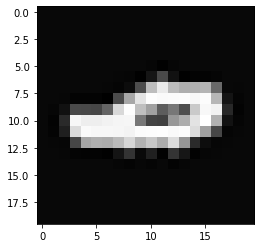

----------------------------------
Label: 	 [0]
Predição: [4]


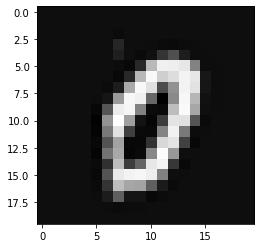

----------------------------------
Label: 	 [1]
Predição: [5]


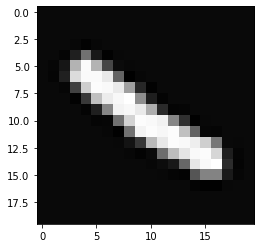

----------------------------------
Label: 	 [1]
Predição: [5]


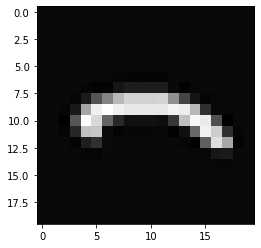

----------------------------------
Label: 	 [1]
Predição: [8]


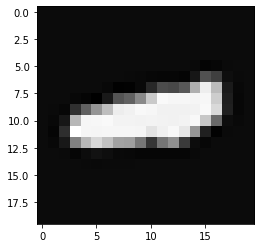

----------------------------------
Label: 	 [1]
Predição: [8]


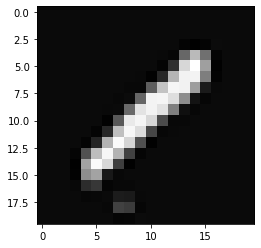

----------------------------------
Label: 	 [1]
Predição: [2]


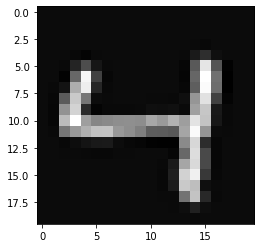

----------------------------------
Label: 	 [1]
Predição: [8]


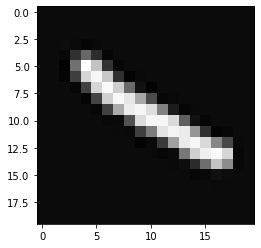

----------------------------------
Label: 	 [1]
Predição: [5]


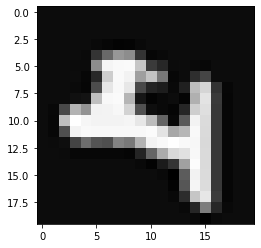

----------------------------------
Label: 	 [2]
Predição: [5]


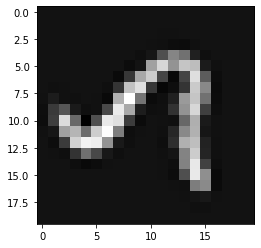

----------------------------------
Label: 	 [2]
Predição: [7]


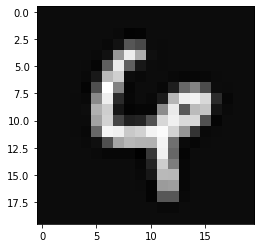

----------------------------------
Label: 	 [2]
Predição: [1]


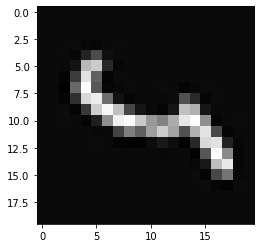

----------------------------------
Label: 	 [2]
Predição: [5]


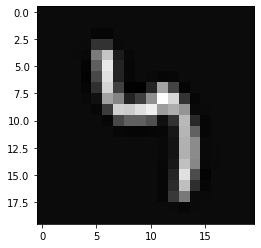

----------------------------------
Label: 	 [2]
Predição: [8]


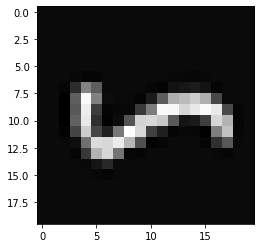

----------------------------------
Label: 	 [2]
Predição: [4]


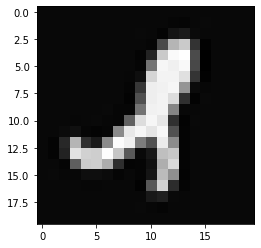

----------------------------------
Label: 	 [2]
Predição: [9]


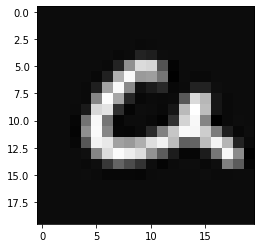

----------------------------------
Label: 	 [2]
Predição: [3]


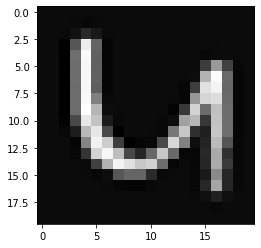

----------------------------------
Label: 	 [2]
Predição: [8]


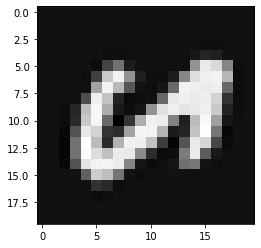

----------------------------------
Label: 	 [2]
Predição: [7]


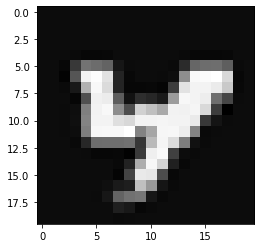

----------------------------------
Label: 	 [2]
Predição: [8]


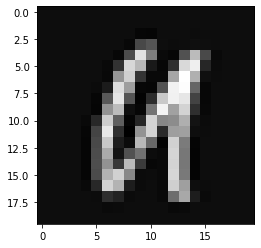

----------------------------------
Label: 	 [2]
Predição: [9]


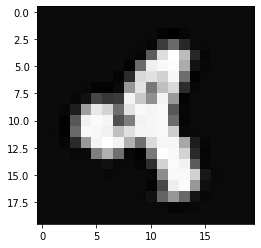

----------------------------------
Label: 	 [2]
Predição: [4]


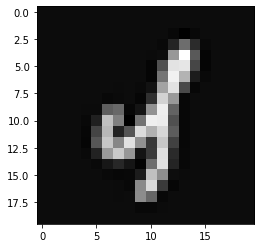

----------------------------------
Label: 	 [2]
Predição: [9]


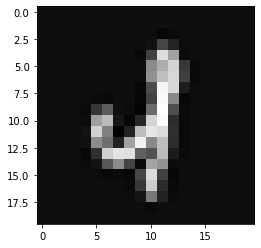

----------------------------------
Label: 	 [2]
Predição: [8]


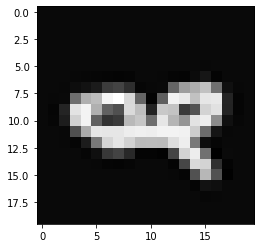

----------------------------------
Label: 	 [2]
Predição: [8]


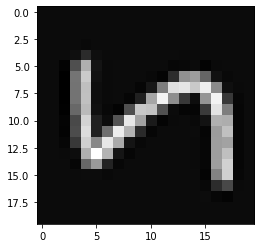

----------------------------------
Label: 	 [2]
Predição: [0]


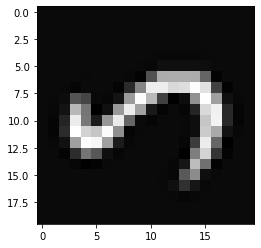

----------------------------------
Label: 	 [2]
Predição: [8]


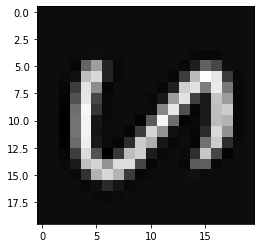

----------------------------------
Label: 	 [2]
Predição: [4]


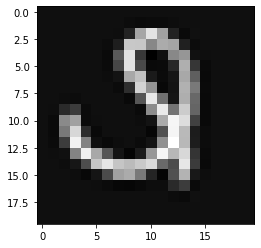

----------------------------------
Label: 	 [2]
Predição: [8]


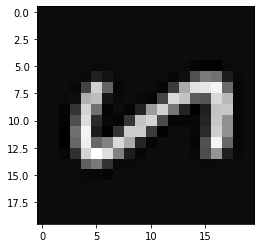

----------------------------------
Label: 	 [2]
Predição: [8]


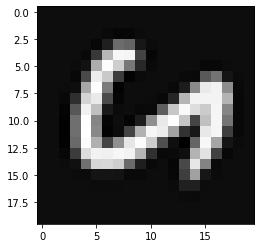

----------------------------------
Label: 	 [2]
Predição: [8]


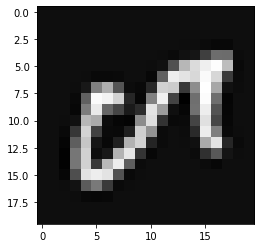

----------------------------------
Label: 	 [2]
Predição: [8]


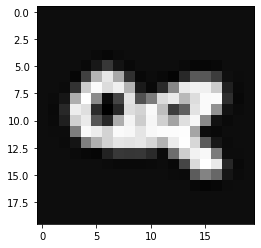

----------------------------------
Label: 	 [2]
Predição: [6]


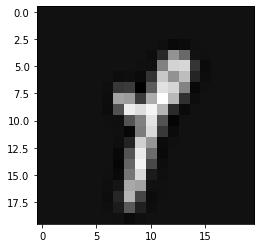

----------------------------------
Label: 	 [2]
Predição: [8]


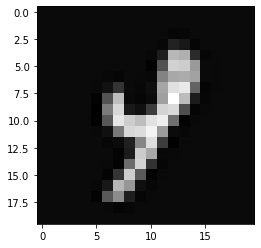

----------------------------------
Label: 	 [2]
Predição: [4]


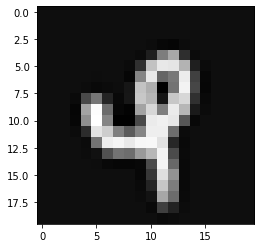

----------------------------------
Label: 	 [2]
Predição: [4]


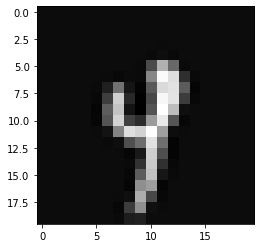

----------------------------------
Label: 	 [2]
Predição: [8]


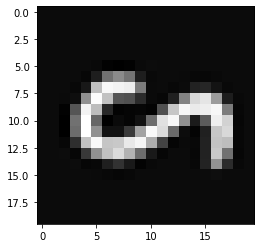

----------------------------------
Label: 	 [2]
Predição: [1]


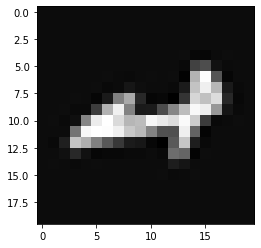

----------------------------------
Label: 	 [2]
Predição: [3]


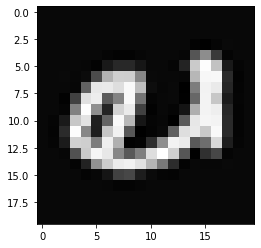

----------------------------------
Label: 	 [2]
Predição: [7]


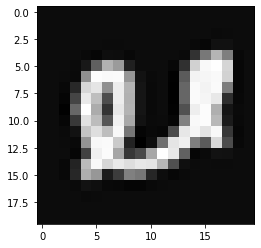

----------------------------------
Label: 	 [2]
Predição: [0]


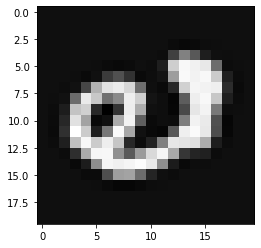

----------------------------------
Label: 	 [3]
Predição: [5]


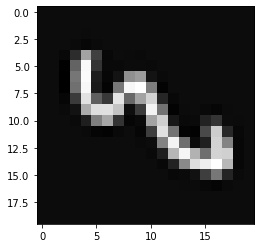

----------------------------------
Label: 	 [3]
Predição: [7]


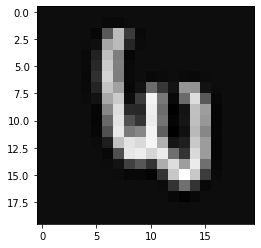

----------------------------------
Label: 	 [3]
Predição: [7]


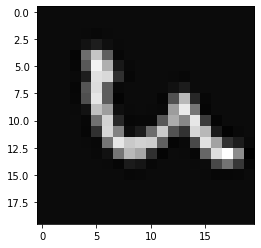

----------------------------------
Label: 	 [3]
Predição: [5]


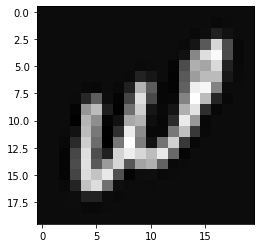

----------------------------------
Label: 	 [3]
Predição: [2]


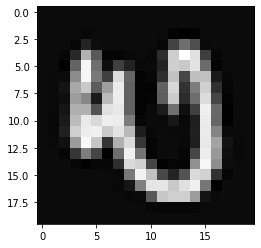

----------------------------------
Label: 	 [3]
Predição: [6]


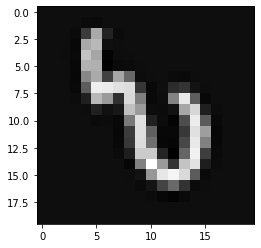

----------------------------------
Label: 	 [3]
Predição: [9]


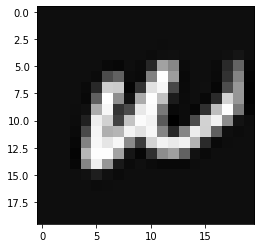

----------------------------------
Label: 	 [3]
Predição: [2]


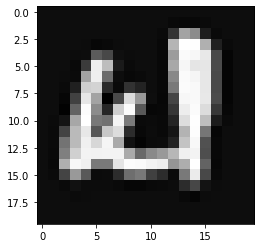

----------------------------------
Label: 	 [3]
Predição: [5]


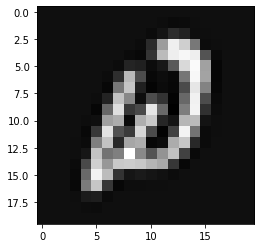

----------------------------------
Label: 	 [3]
Predição: [5]


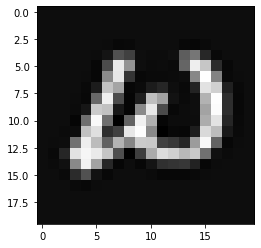

----------------------------------
Label: 	 [3]
Predição: [8]


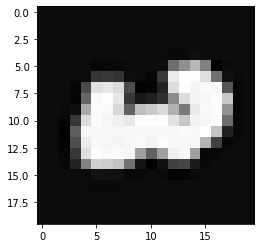

----------------------------------
Label: 	 [3]
Predição: [9]


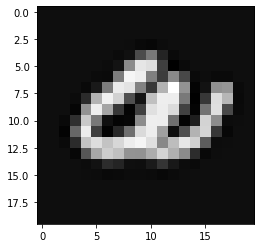

----------------------------------
Label: 	 [3]
Predição: [9]


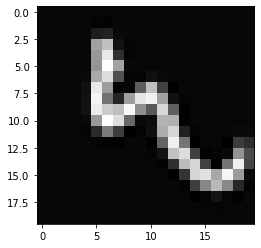

----------------------------------
Label: 	 [3]
Predição: [2]


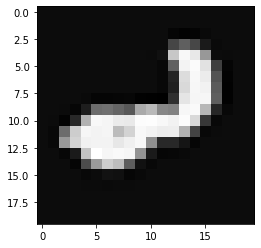

----------------------------------
Label: 	 [3]
Predição: [2]


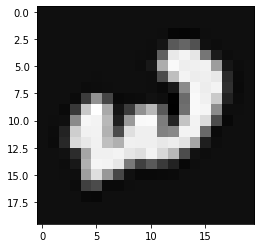

----------------------------------
Label: 	 [3]
Predição: [2]


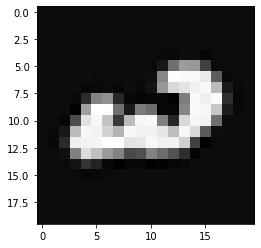

----------------------------------
Label: 	 [3]
Predição: [5]


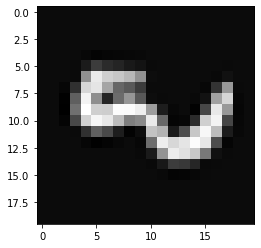

----------------------------------
Label: 	 [3]
Predição: [4]


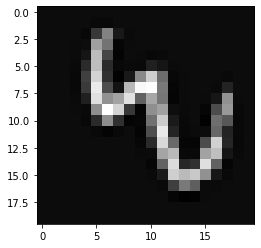

----------------------------------
Label: 	 [3]
Predição: [7]


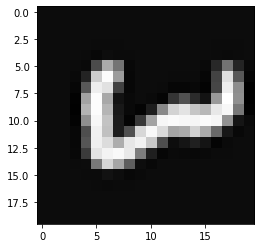

----------------------------------
Label: 	 [3]
Predição: [1]


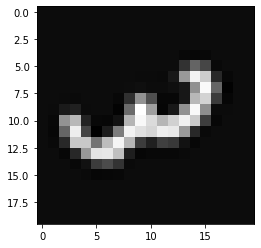

----------------------------------
Label: 	 [3]
Predição: [9]


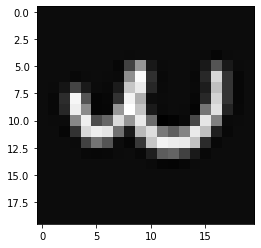

----------------------------------
Label: 	 [3]
Predição: [8]


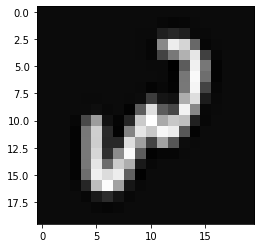

----------------------------------
Label: 	 [3]
Predição: [7]


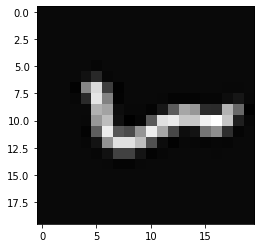

----------------------------------
Label: 	 [3]
Predição: [5]


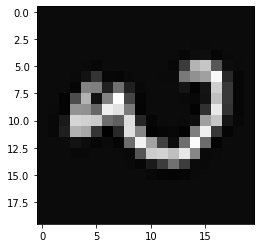

----------------------------------
Label: 	 [3]
Predição: [5]


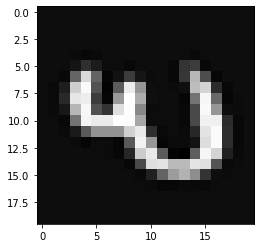

----------------------------------
Label: 	 [3]
Predição: [5]


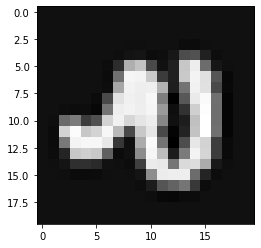

----------------------------------
Label: 	 [3]
Predição: [8]


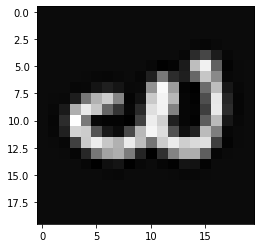

----------------------------------
Label: 	 [3]
Predição: [5]


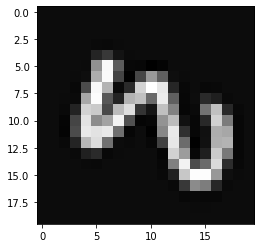

----------------------------------
Label: 	 [3]
Predição: [9]


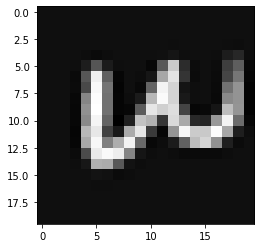

----------------------------------
Label: 	 [3]
Predição: [2]


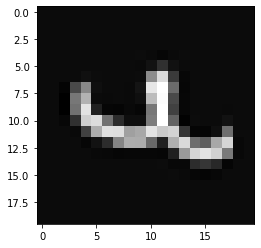

----------------------------------
Label: 	 [3]
Predição: [2]


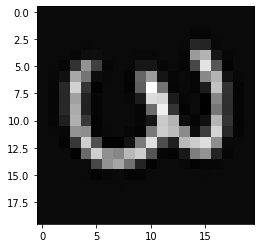

----------------------------------
Label: 	 [3]
Predição: [9]


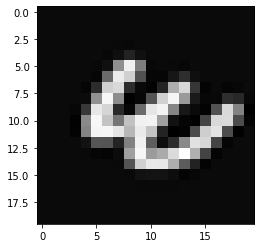

----------------------------------
Label: 	 [3]
Predição: [1]


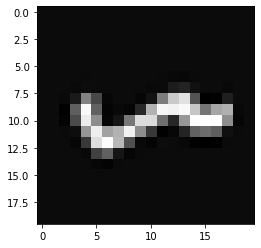

----------------------------------
Label: 	 [3]
Predição: [7]


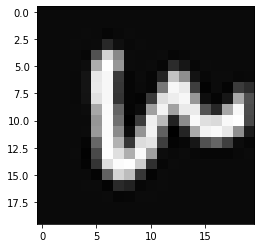

----------------------------------
Label: 	 [3]
Predição: [8]


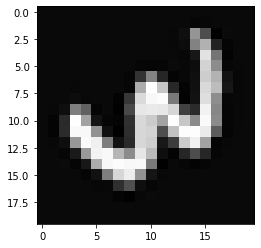

----------------------------------
Label: 	 [3]
Predição: [5]


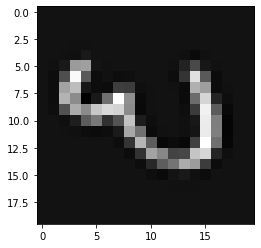

----------------------------------
Label: 	 [3]
Predição: [7]


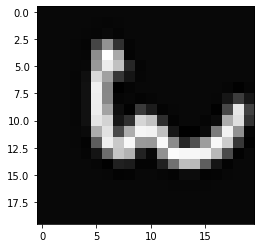

----------------------------------
Label: 	 [3]
Predição: [2]


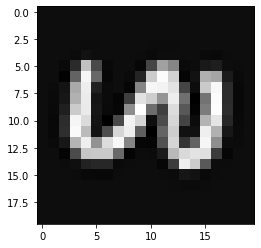

----------------------------------
Label: 	 [3]
Predição: [5]


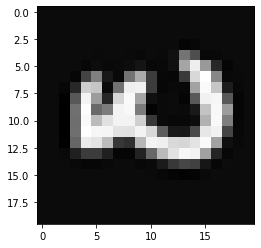

----------------------------------
Label: 	 [4]
Predição: [9]


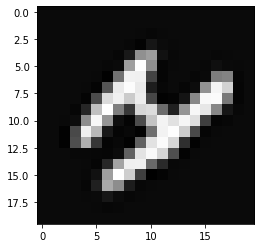

----------------------------------
Label: 	 [4]
Predição: [6]


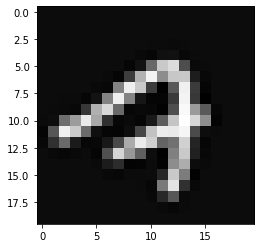

----------------------------------
Label: 	 [4]
Predição: [8]


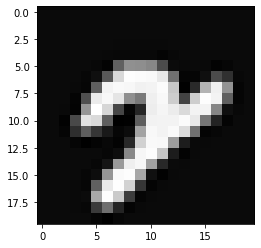

----------------------------------
Label: 	 [4]
Predição: [9]


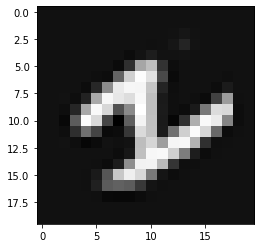

----------------------------------
Label: 	 [4]
Predição: [1]


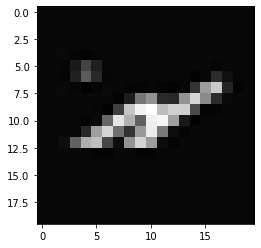

----------------------------------
Label: 	 [4]
Predição: [9]


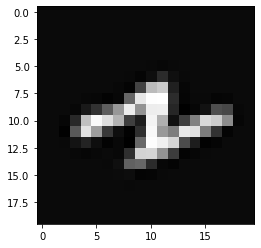

----------------------------------
Label: 	 [4]
Predição: [9]


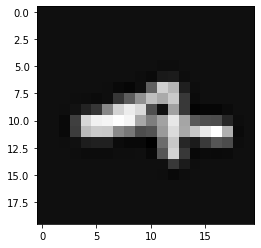

----------------------------------
Label: 	 [4]
Predição: [9]


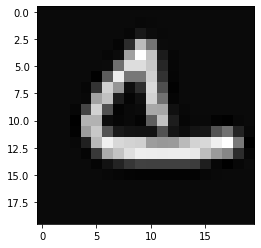

----------------------------------
Label: 	 [4]
Predição: [9]


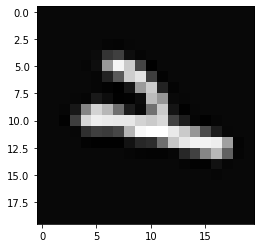

----------------------------------
Label: 	 [4]
Predição: [8]


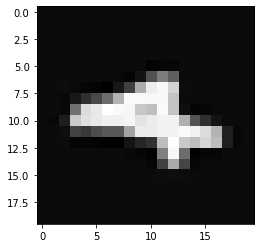

----------------------------------
Label: 	 [4]
Predição: [2]


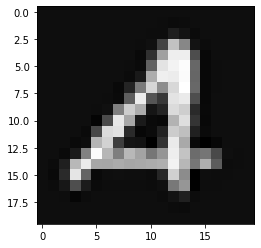

----------------------------------
Label: 	 [4]
Predição: [9]


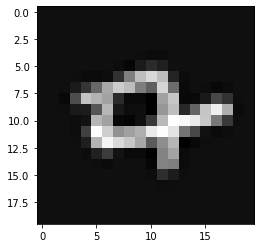

----------------------------------
Label: 	 [4]
Predição: [9]


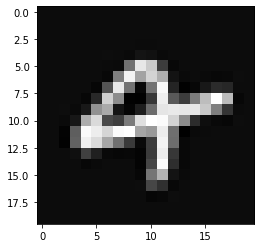

----------------------------------
Label: 	 [4]
Predição: [9]


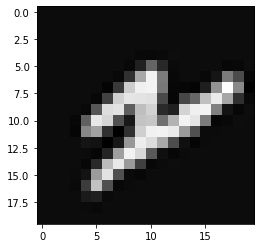

----------------------------------
Label: 	 [4]
Predição: [8]


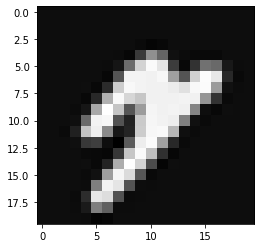

----------------------------------
Label: 	 [4]
Predição: [9]


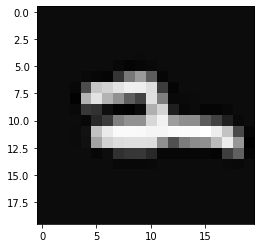

----------------------------------
Label: 	 [4]
Predição: [8]


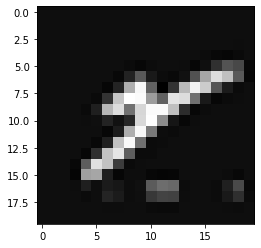

----------------------------------
Label: 	 [4]
Predição: [6]


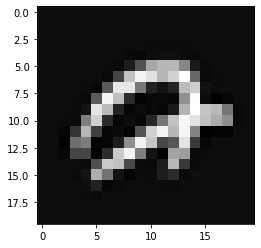

----------------------------------
Label: 	 [4]
Predição: [9]


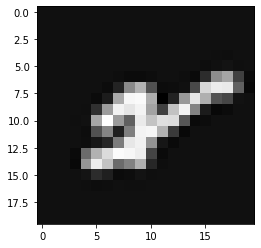

----------------------------------
Label: 	 [5]
Predição: [3]


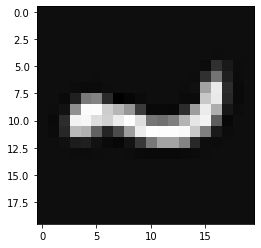

----------------------------------
Label: 	 [5]
Predição: [8]


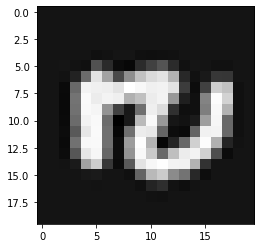

----------------------------------
Label: 	 [5]
Predição: [6]


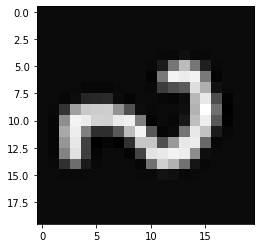

----------------------------------
Label: 	 [5]
Predição: [9]


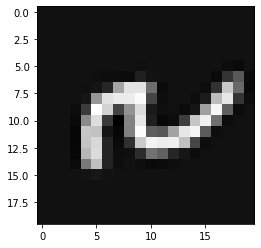

----------------------------------
Label: 	 [5]
Predição: [8]


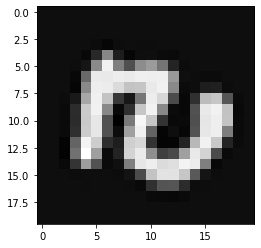

----------------------------------
Label: 	 [5]
Predição: [2]


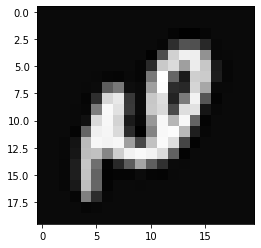

----------------------------------
Label: 	 [5]
Predição: [7]


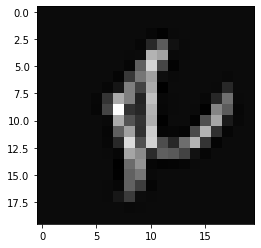

----------------------------------
Label: 	 [5]
Predição: [3]


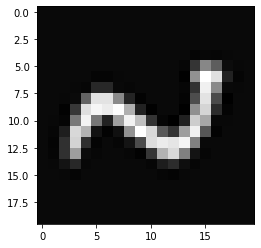

----------------------------------
Label: 	 [5]
Predição: [4]


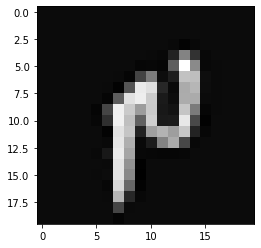

----------------------------------
Label: 	 [5]
Predição: [6]


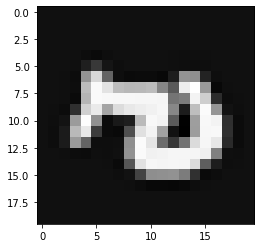

----------------------------------
Label: 	 [5]
Predição: [3]


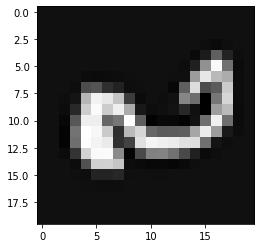

----------------------------------
Label: 	 [5]
Predição: [4]


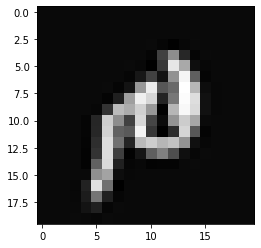

----------------------------------
Label: 	 [5]
Predição: [2]


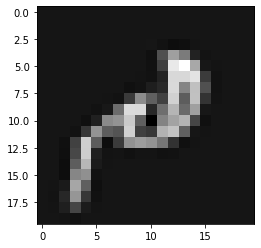

----------------------------------
Label: 	 [5]
Predição: [3]


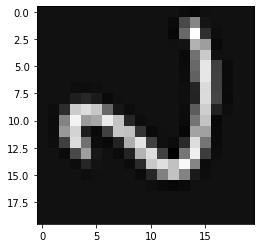

----------------------------------
Label: 	 [5]
Predição: [8]


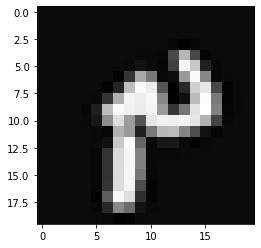

----------------------------------
Label: 	 [5]
Predição: [3]


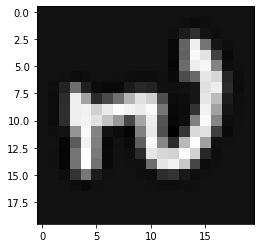

----------------------------------
Label: 	 [5]
Predição: [8]


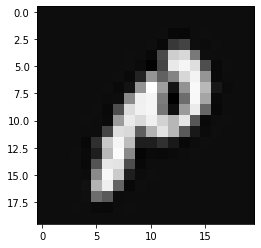

----------------------------------
Label: 	 [5]
Predição: [9]


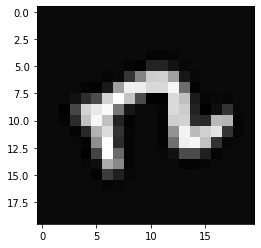

----------------------------------
Label: 	 [5]
Predição: [8]


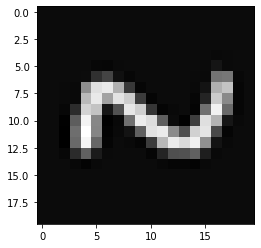

----------------------------------
Label: 	 [5]
Predição: [6]


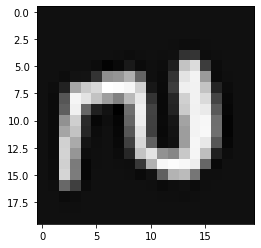

----------------------------------
Label: 	 [5]
Predição: [3]


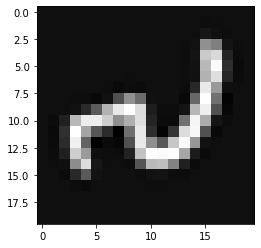

----------------------------------
Label: 	 [5]
Predição: [3]


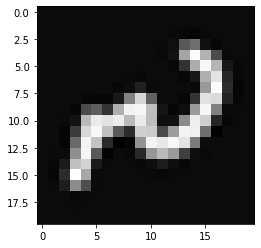

----------------------------------
Label: 	 [5]
Predição: [3]


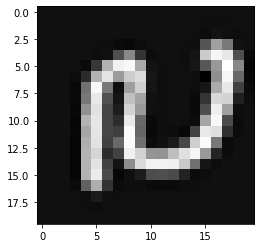

----------------------------------
Label: 	 [5]
Predição: [2]


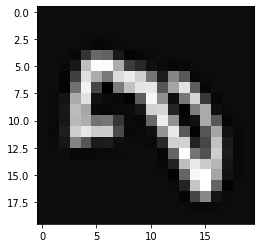

----------------------------------
Label: 	 [5]
Predição: [3]


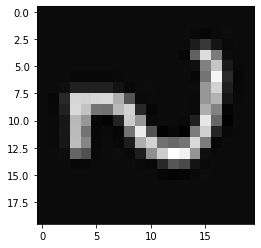

----------------------------------
Label: 	 [5]
Predição: [0]


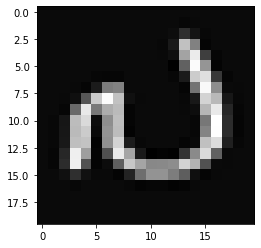

----------------------------------
Label: 	 [5]
Predição: [3]


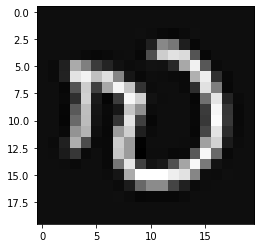

----------------------------------
Label: 	 [5]
Predição: [1]


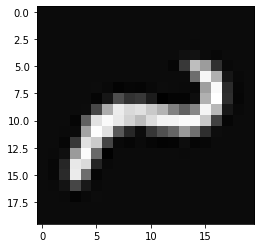

----------------------------------
Label: 	 [5]
Predição: [3]


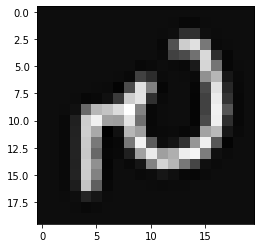

----------------------------------
Label: 	 [5]
Predição: [9]


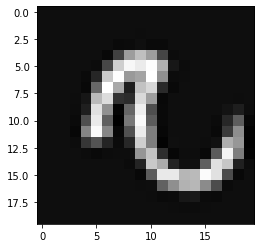

----------------------------------
Label: 	 [5]
Predição: [0]


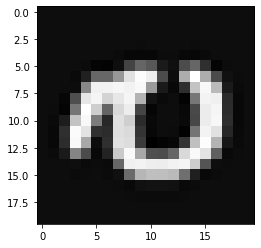

----------------------------------
Label: 	 [5]
Predição: [6]


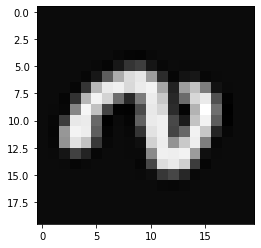

----------------------------------
Label: 	 [5]
Predição: [8]


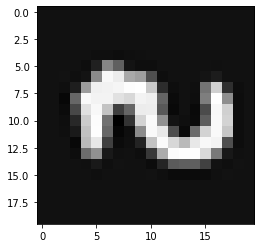

----------------------------------
Label: 	 [5]
Predição: [4]


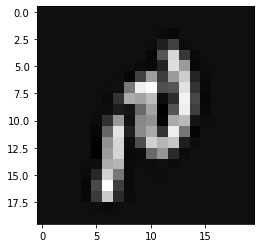

----------------------------------
Label: 	 [5]
Predição: [8]


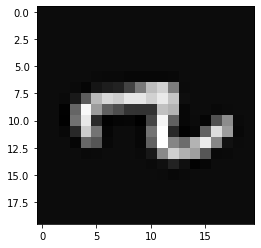

----------------------------------
Label: 	 [5]
Predição: [4]


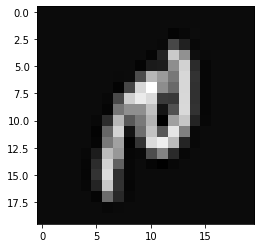

----------------------------------
Label: 	 [5]
Predição: [8]


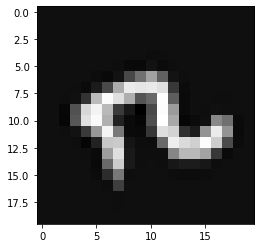

----------------------------------
Label: 	 [5]
Predição: [3]


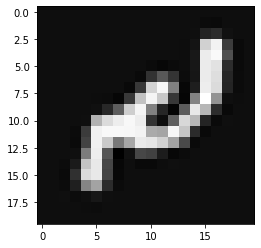

----------------------------------
Label: 	 [6]
Predição: [0]


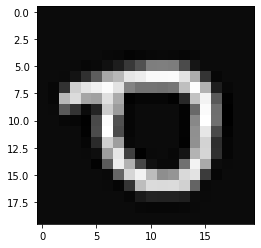

----------------------------------
Label: 	 [6]
Predição: [4]


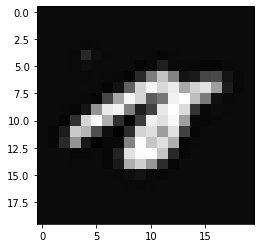

----------------------------------
Label: 	 [6]
Predição: [5]


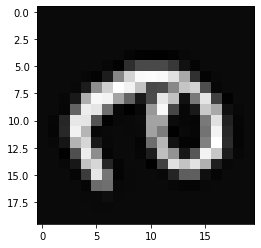

----------------------------------
Label: 	 [6]
Predição: [1]


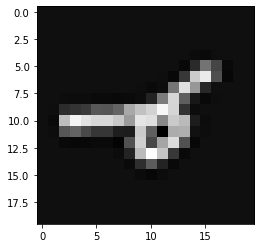

----------------------------------
Label: 	 [6]
Predição: [5]


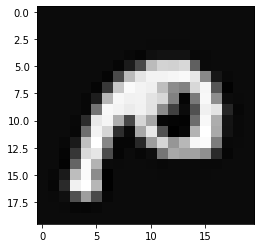

----------------------------------
Label: 	 [6]
Predição: [1]


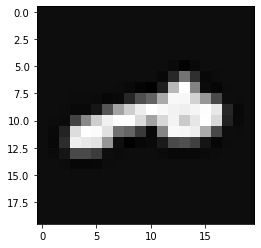

----------------------------------
Label: 	 [6]
Predição: [8]


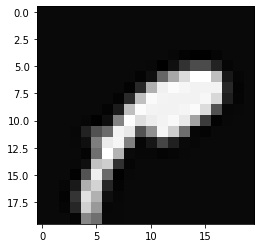

----------------------------------
Label: 	 [6]
Predição: [5]


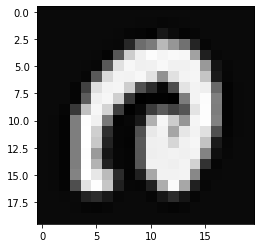

----------------------------------
Label: 	 [6]
Predição: [0]


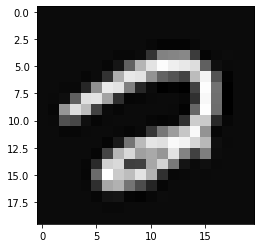

----------------------------------
Label: 	 [7]
Predição: [4]


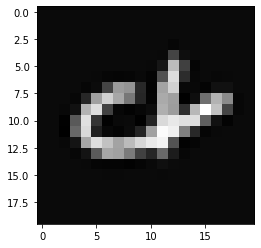

----------------------------------
Label: 	 [7]
Predição: [9]


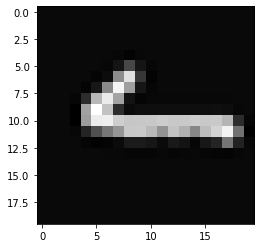

----------------------------------
Label: 	 [7]
Predição: [1]


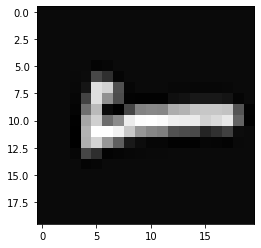

----------------------------------
Label: 	 [7]
Predição: [4]


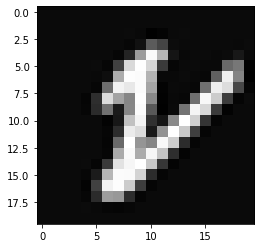

----------------------------------
Label: 	 [7]
Predição: [4]


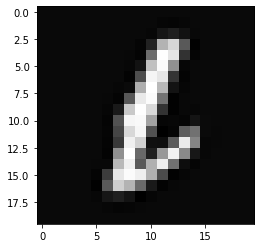

----------------------------------
Label: 	 [7]
Predição: [9]


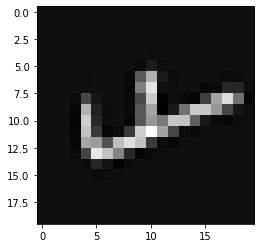

----------------------------------
Label: 	 [7]
Predição: [9]


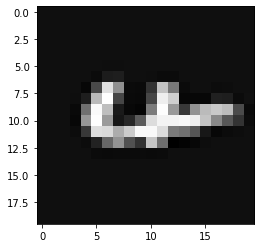

----------------------------------
Label: 	 [7]
Predição: [5]


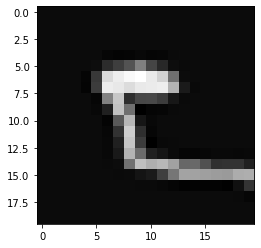

----------------------------------
Label: 	 [7]
Predição: [9]


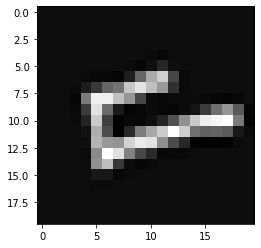

----------------------------------
Label: 	 [7]
Predição: [9]


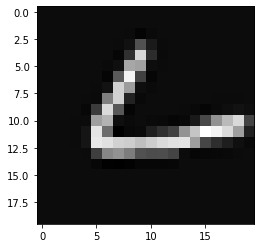

----------------------------------
Label: 	 [7]
Predição: [9]


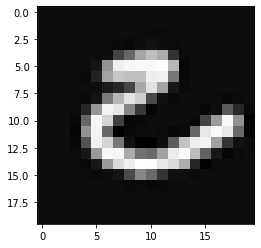

----------------------------------
Label: 	 [7]
Predição: [2]


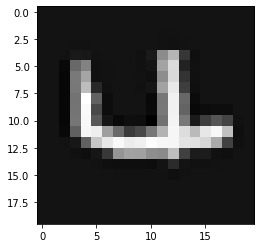

----------------------------------
Label: 	 [7]
Predição: [9]


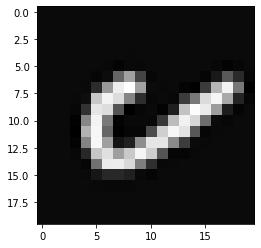

----------------------------------
Label: 	 [7]
Predição: [2]


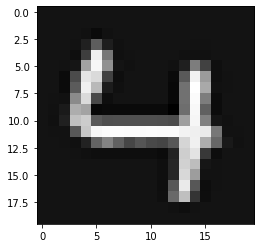

----------------------------------
Label: 	 [7]
Predição: [9]


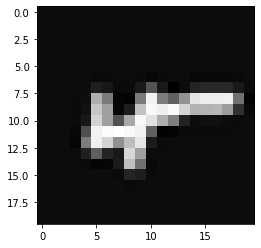

----------------------------------
Label: 	 [7]
Predição: [8]


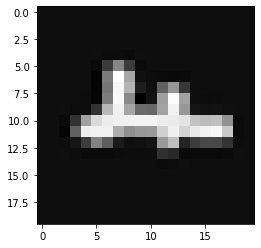

----------------------------------
Label: 	 [7]
Predição: [9]


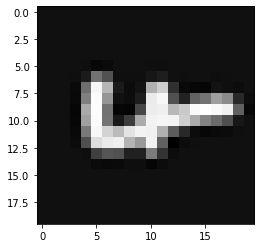

----------------------------------
Label: 	 [7]
Predição: [8]


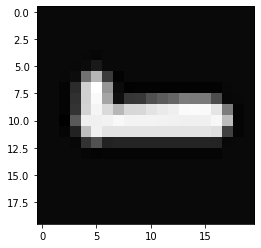

----------------------------------
Label: 	 [7]
Predição: [9]


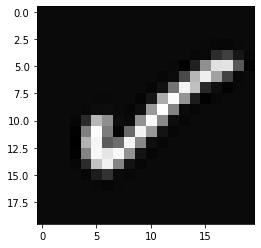

----------------------------------
Label: 	 [7]
Predição: [9]


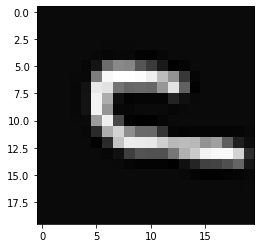

----------------------------------
Label: 	 [8]
Predição: [1]


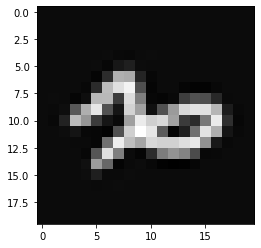

----------------------------------
Label: 	 [8]
Predição: [3]


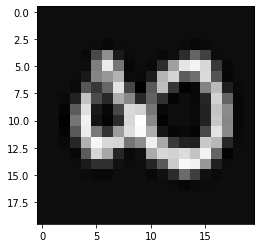

----------------------------------
Label: 	 [8]
Predição: [4]


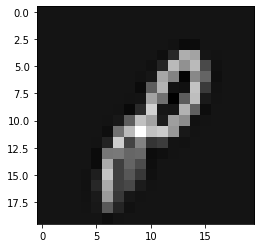

----------------------------------
Label: 	 [8]
Predição: [1]


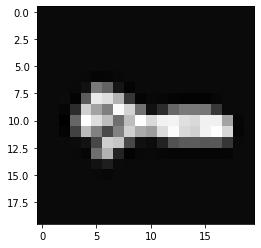

----------------------------------
Label: 	 [8]
Predição: [2]


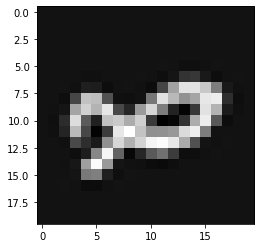

----------------------------------
Label: 	 [8]
Predição: [4]


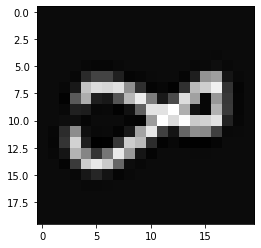

----------------------------------
Label: 	 [8]
Predição: [1]


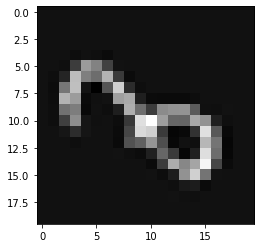

----------------------------------
Label: 	 [8]
Predição: [7]


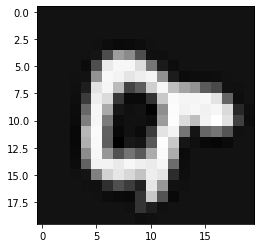

----------------------------------
Label: 	 [8]
Predição: [5]


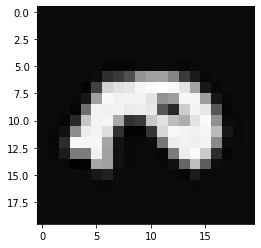

----------------------------------
Label: 	 [8]
Predição: [9]


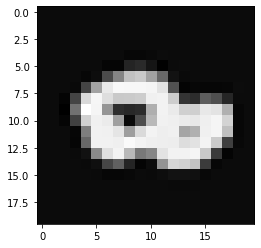

----------------------------------
Label: 	 [8]
Predição: [1]


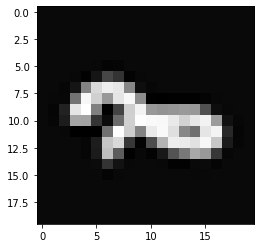

----------------------------------
Label: 	 [8]
Predição: [1]


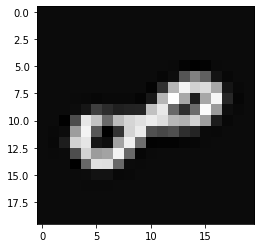

----------------------------------
Label: 	 [8]
Predição: [9]


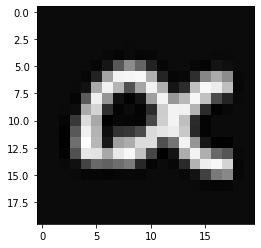

----------------------------------
Label: 	 [8]
Predição: [5]


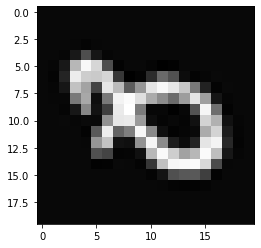

----------------------------------
Label: 	 [8]
Predição: [9]


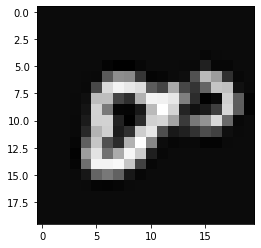

----------------------------------
Label: 	 [8]
Predição: [3]


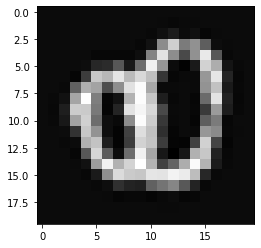

----------------------------------
Label: 	 [8]
Predição: [9]


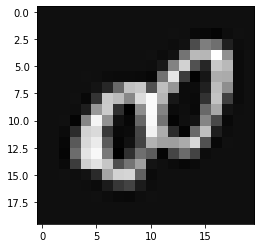

----------------------------------
Label: 	 [8]
Predição: [4]


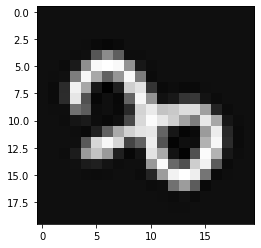

----------------------------------
Label: 	 [8]
Predição: [2]


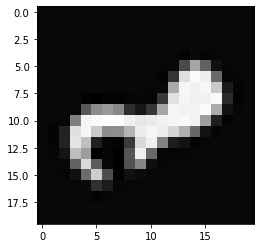

----------------------------------
Label: 	 [8]
Predição: [1]


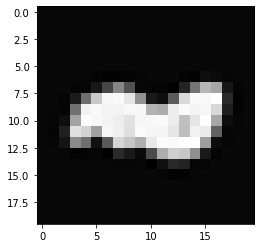

----------------------------------
Label: 	 [8]
Predição: [3]


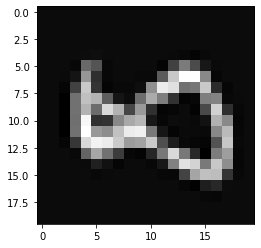

----------------------------------
Label: 	 [8]
Predição: [4]


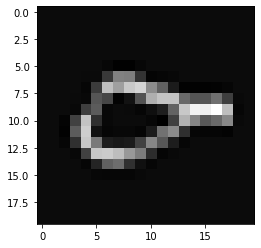

----------------------------------
Label: 	 [8]
Predição: [6]


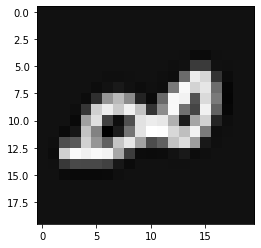

----------------------------------
Label: 	 [8]
Predição: [5]


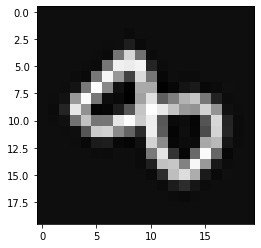

----------------------------------
Label: 	 [8]
Predição: [6]


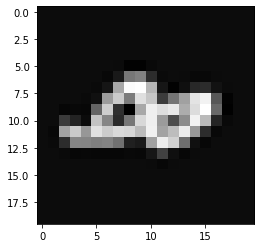

----------------------------------
Label: 	 [8]
Predição: [6]


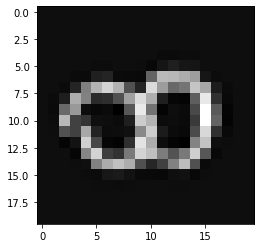

----------------------------------
Label: 	 [8]
Predição: [3]


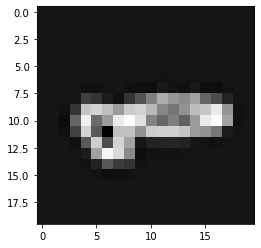

----------------------------------
Label: 	 [8]
Predição: [6]


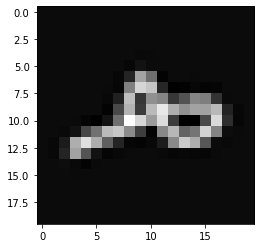

----------------------------------
Label: 	 [8]
Predição: [9]


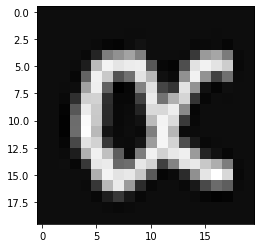

----------------------------------
Label: 	 [8]
Predição: [2]


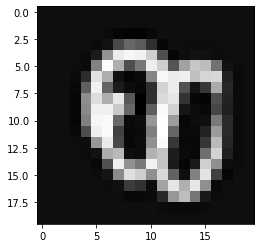

----------------------------------
Label: 	 [8]
Predição: [4]


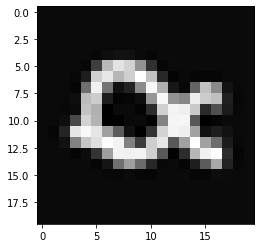

----------------------------------
Label: 	 [8]
Predição: [4]


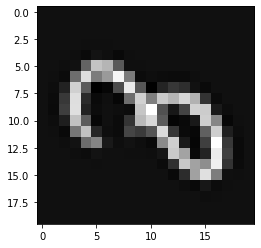

----------------------------------
Label: 	 [8]
Predição: [3]


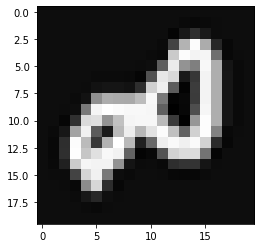

----------------------------------
Label: 	 [9]
Predição: [7]


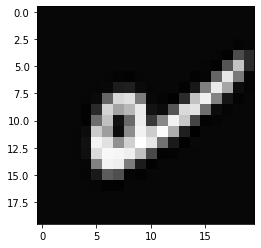

----------------------------------
Label: 	 [9]
Predição: [5]


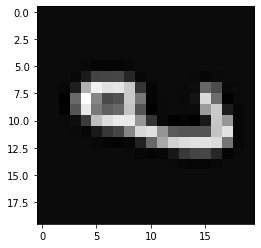

----------------------------------
Label: 	 [9]
Predição: [8]


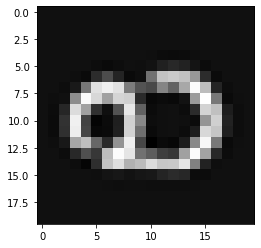

----------------------------------
Label: 	 [9]
Predição: [4]


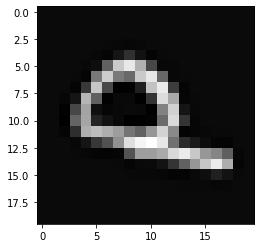

----------------------------------
Label: 	 [9]
Predição: [7]


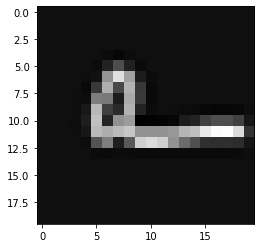

----------------------------------
Label: 	 [9]
Predição: [7]


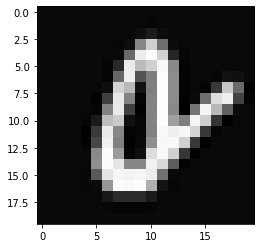

----------------------------------
Label: 	 [9]
Predição: [7]


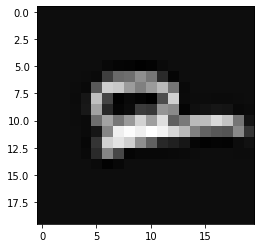

----------------------------------
Label: 	 [9]
Predição: [2]


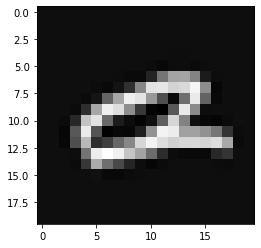

----------------------------------
Label: 	 [9]
Predição: [7]


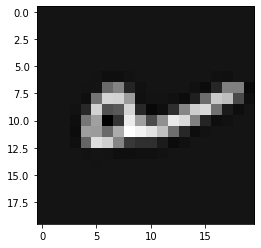

----------------------------------
Label: 	 [9]
Predição: [0]


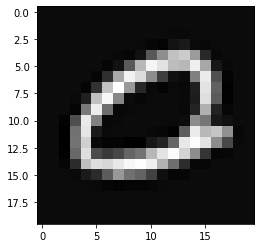

----------------------------------
Label: 	 [9]
Predição: [4]


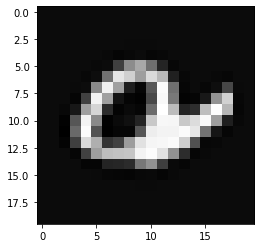

----------------------------------
Label: 	 [9]
Predição: [8]


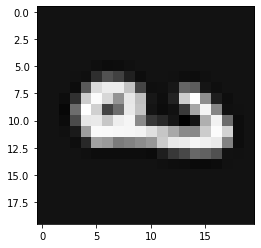

----------------------------------
Label: 	 [9]
Predição: [3]


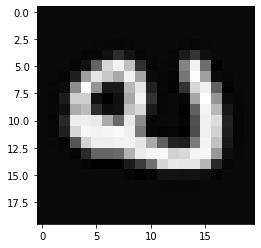

----------------------------------
Label: 	 [9]
Predição: [3]


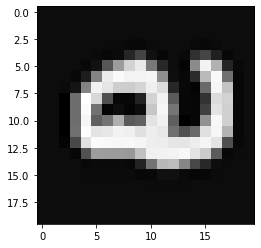

----------------------------------
Label: 	 [9]
Predição: [7]


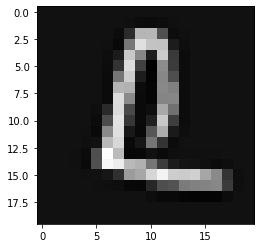

----------------------------------
Label: 	 [9]
Predição: [4]


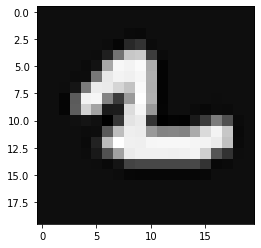

----------------------------------
Label: 	 [9]
Predição: [7]


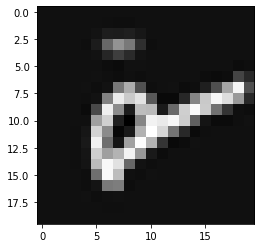

----------------------------------
Label: 	 [9]
Predição: [6]


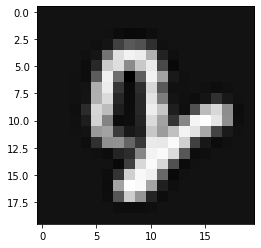

----------------------------------
Label: 	 [9]
Predição: [2]


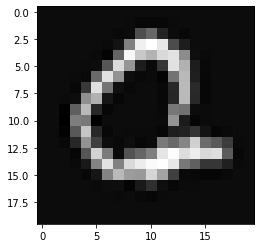

----------------------------------
Label: 	 [9]
Predição: [2]


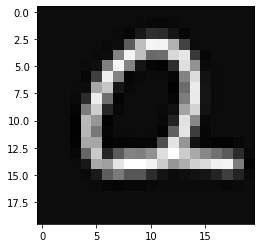

----------------------------------
Label: 	 [9]
Predição: [7]


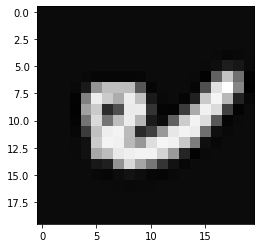

----------------------------------
Label: 	 [9]
Predição: [7]


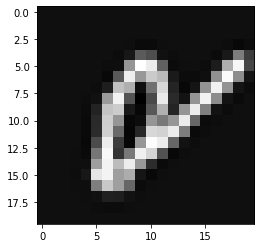

----------------------------------
Label: 	 [9]
Predição: [5]


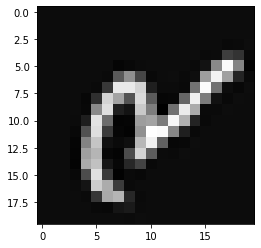

----------------------------------
Label: 	 [9]
Predição: [3]


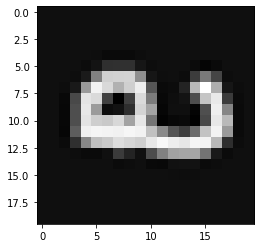

----------------------------------
Label: 	 [9]
Predição: [1]


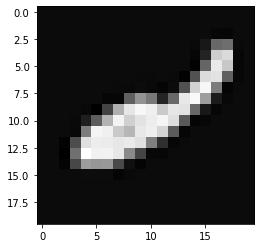

----------------------------------
Label: 	 [9]
Predição: [7]


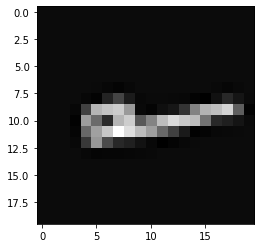

----------------------------------
Label: 	 [9]
Predição: [7]


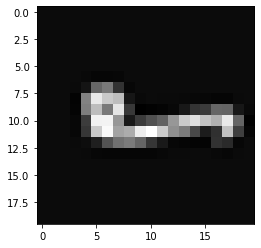

----------------------------------
Label: 	 [9]
Predição: [8]


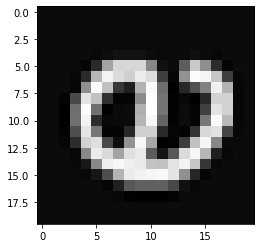

----------------------------------
Label: 	 [9]
Predição: [7]


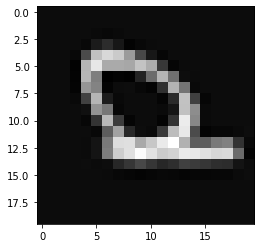

----------------------------------
Label: 	 [9]
Predição: [4]


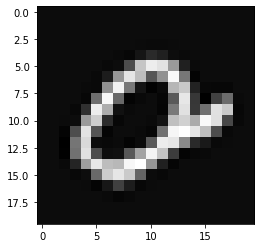

----------------------------------
Label: 	 [9]
Predição: [0]


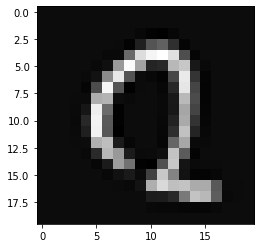

----------------------------------
Label: 	 [9]
Predição: [0]


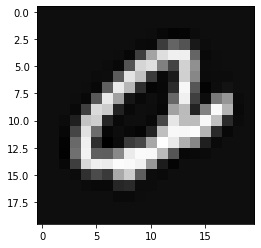

----------------------------------
Label: 	 [9]
Predição: [4]


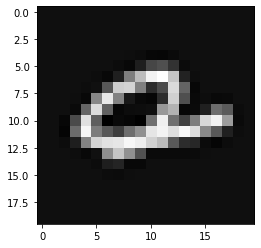

----------------------------------
Label: 	 [9]
Predição: [3]


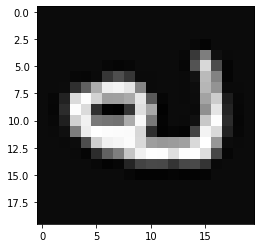

----------------------------------
Label: 	 [9]
Predição: [7]


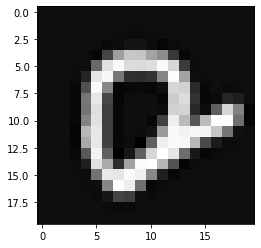

----------------------------------


In [45]:
missFeedback(X, Y, pred)

## Questão 2

> Implemente agora a regressão logística multi-classes regularizada para o mesmo problema. Mostre a porcentagem de acerto e as imagens classificadas erroneamente.

Nesta questão, realizaremos as seguintes etapas:

1. Criar função custo (regressão logística com regularização);
2. Criar função para gradiente descendente (regressão logística com regularização);
3. Aplicar modelo no conjunto de dados;
4. Avaliação de desempenho;
5. Exibição dos erros.

### 1. Criar função custo (regressão logística com regularização)

O procedimento para esta questão é muito semelhante a anterior. Basta somente adicionar o termo da regularização em ambas as funções custo e para gradiente descendente. Primeiro, na função custo:

In [46]:
def costFunctionLogRegReg(X, Y, Theta, beta):
    J = costFunctionLogReg(X, Y, Theta) + np.diag((beta/(2*m))*(Theta[1:].T @ Theta[1:]))
    return J

### 2. Criar função para gradiente descendente (regressão logística com regularização)

Agora, com a função para gradiente descendente:

In [47]:
def gradientDescentLogRegReg(X, Y, Theta, alpha, beta, nbr_iter):
    J_history = []
    m = len(Y)
    
    Theta_aux = Theta.copy()
    Theta_aux[0] = 0
    
    for i in range(nbr_iter):
        h = sigmoid(X.dot(Theta))
        Theta_aux = Theta.copy()
        Theta_aux[0] = 0
        Theta = Theta - (alpha/m)*(X.T.dot(h-Y) + beta*Theta_aux)
        J_history.append(costFunctionLogRegReg(X, Y, Theta, beta))
        
    return Theta, J_history

### 3. Aplicar modelo no conjunto de dados

Agora, aplicamos os modelos adaptados com a regularização em nosso conjunto de dados já preparado:

In [48]:
Theta = np.zeros([n+1,nbr_classes])
beta = 3

cost = costFunctionLogRegReg(X, Y, Theta, beta)
print(cost)

[0.69314718 0.69314718 0.69314718 0.69314718 0.69314718 0.69314718
 0.69314718 0.69314718 0.69314718 0.69314718]


In [49]:
nbr_iter = 3000
alpha = 3
beta = 3

new_Theta_reg, J_history = gradientDescentLogRegReg(X, Y, Theta, alpha, beta, nbr_iter)

In [50]:
cost = costFunctionLogRegReg(X, Y, new_Theta_reg, beta)
print(cost)

[0.02900591 0.03550177 0.07998921 0.08141756 0.064223   0.09292684
 0.04474164 0.05695403 0.1155029  0.10497395]


### 4. Avaliação de desempenho

Da mesma forma que na questão anterior, podemos avaliar o desempenho de nosso modelo:

In [51]:
pred = predict(X, new_Theta_reg)
percentage = evaluatePrediction(Y, pred)
print(f'Taxa de acerto = {100*percentage:.2f}%')

Taxa de acerto = 92.96%


### 5. Exibição dos erros

E novamente, podemos exibir os erros:

Label: 	 [0]
Predição: [5]


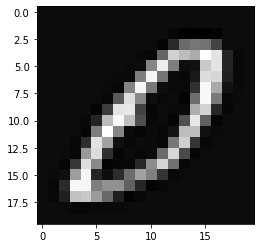

----------------------------------
Label: 	 [0]
Predição: [3]


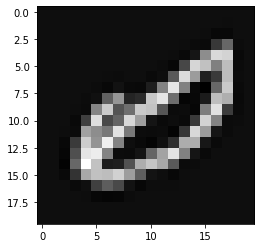

----------------------------------
Label: 	 [0]
Predição: [8]


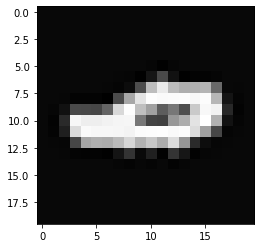

----------------------------------
Label: 	 [0]
Predição: [4]


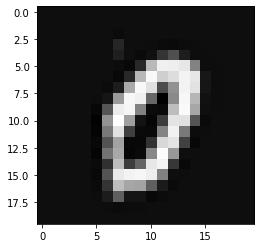

----------------------------------
Label: 	 [0]
Predição: [6]


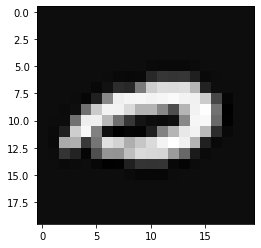

----------------------------------
Label: 	 [1]
Predição: [5]


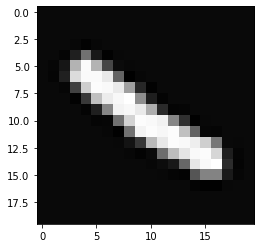

----------------------------------
Label: 	 [1]
Predição: [5]


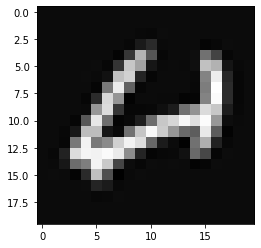

----------------------------------
Label: 	 [1]
Predição: [5]


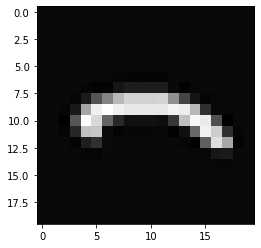

----------------------------------
Label: 	 [1]
Predição: [8]


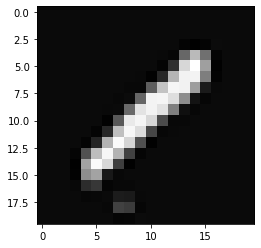

----------------------------------
Label: 	 [1]
Predição: [2]


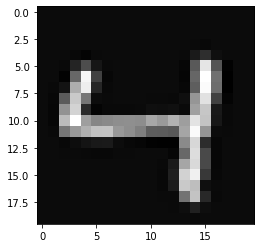

----------------------------------
Label: 	 [1]
Predição: [5]


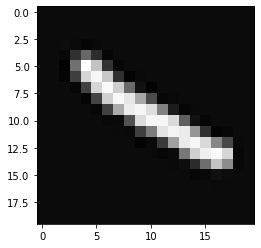

----------------------------------
Label: 	 [1]
Predição: [5]


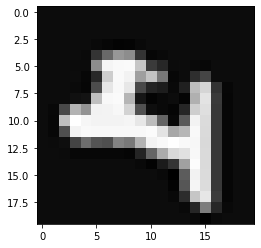

----------------------------------
Label: 	 [2]
Predição: [6]


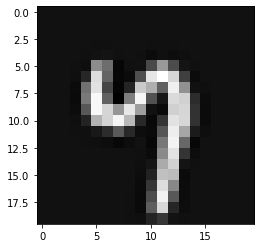

----------------------------------
Label: 	 [2]
Predição: [7]


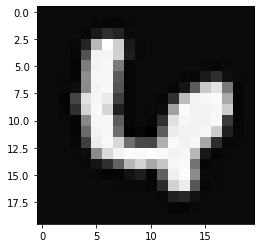

----------------------------------
Label: 	 [2]
Predição: [5]


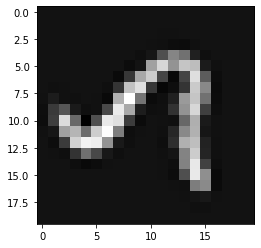

----------------------------------
Label: 	 [2]
Predição: [7]


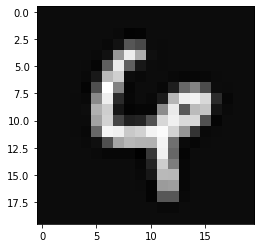

----------------------------------
Label: 	 [2]
Predição: [1]


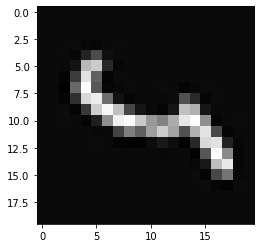

----------------------------------
Label: 	 [2]
Predição: [5]


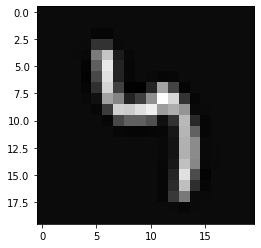

----------------------------------
Label: 	 [2]
Predição: [1]


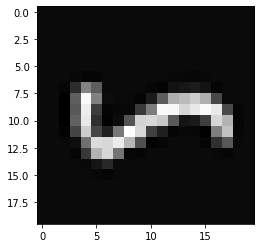

----------------------------------
Label: 	 [2]
Predição: [1]


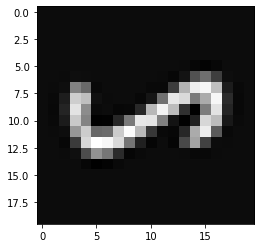

----------------------------------
Label: 	 [2]
Predição: [7]


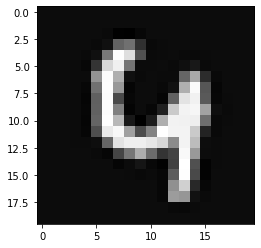

----------------------------------
Label: 	 [2]
Predição: [4]


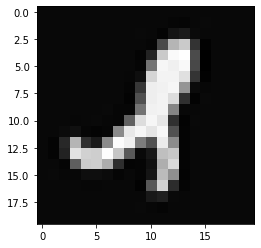

----------------------------------
Label: 	 [2]
Predição: [9]


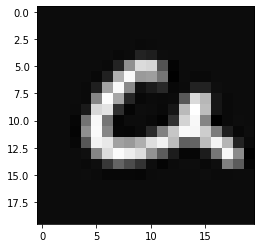

----------------------------------
Label: 	 [2]
Predição: [3]


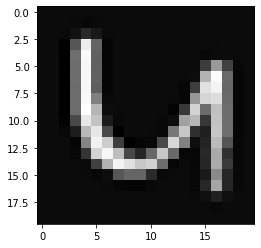

----------------------------------
Label: 	 [2]
Predição: [8]


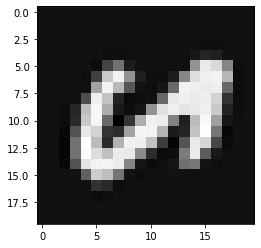

----------------------------------
Label: 	 [2]
Predição: [7]


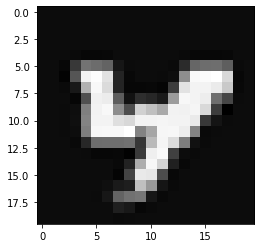

----------------------------------
Label: 	 [2]
Predição: [8]


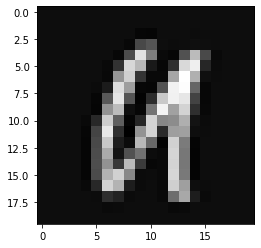

----------------------------------
Label: 	 [2]
Predição: [1]


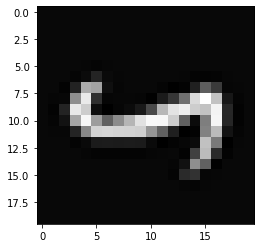

----------------------------------
Label: 	 [2]
Predição: [9]


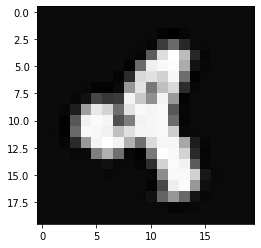

----------------------------------
Label: 	 [2]
Predição: [4]


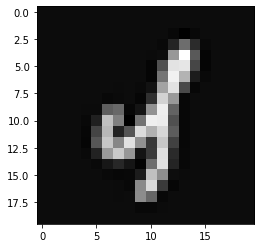

----------------------------------
Label: 	 [2]
Predição: [9]


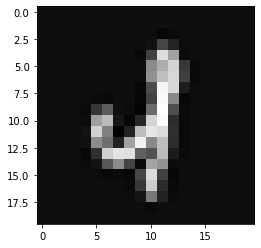

----------------------------------
Label: 	 [2]
Predição: [9]


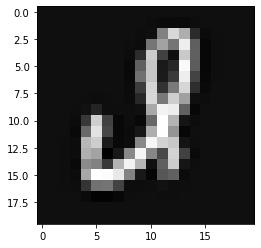

----------------------------------
Label: 	 [2]
Predição: [8]


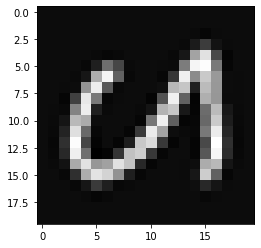

----------------------------------
Label: 	 [2]
Predição: [4]


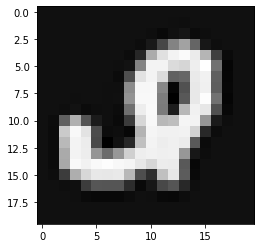

----------------------------------
Label: 	 [2]
Predição: [7]


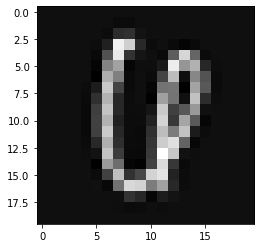

----------------------------------
Label: 	 [2]
Predição: [4]


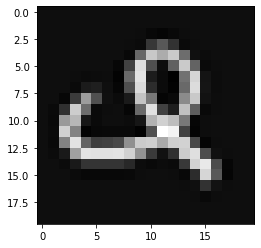

----------------------------------
Label: 	 [2]
Predição: [1]


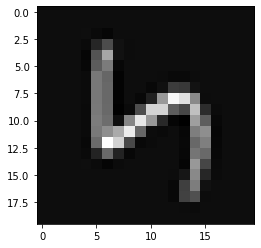

----------------------------------
Label: 	 [2]
Predição: [8]


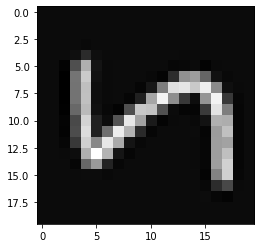

----------------------------------
Label: 	 [2]
Predição: [0]


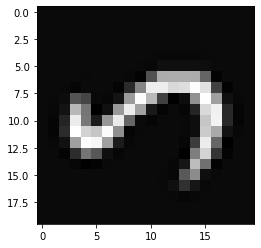

----------------------------------
Label: 	 [2]
Predição: [8]


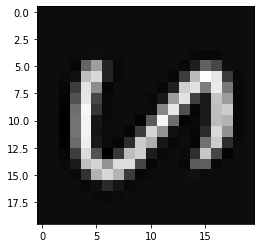

----------------------------------
Label: 	 [2]
Predição: [7]


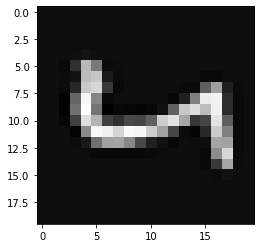

----------------------------------
Label: 	 [2]
Predição: [3]


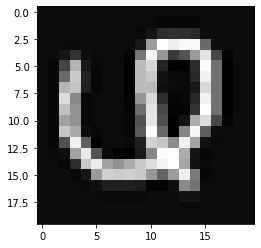

----------------------------------
Label: 	 [2]
Predição: [4]


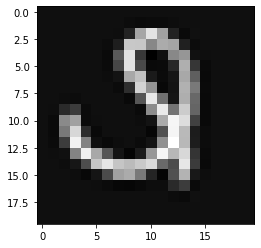

----------------------------------
Label: 	 [2]
Predição: [8]


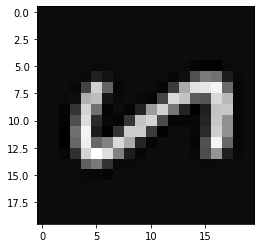

----------------------------------
Label: 	 [2]
Predição: [8]


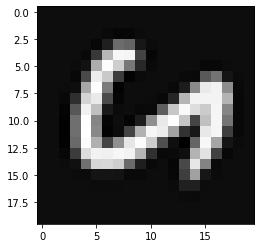

----------------------------------
Label: 	 [2]
Predição: [4]


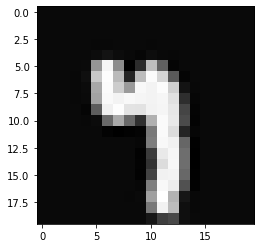

----------------------------------
Label: 	 [2]
Predição: [0]


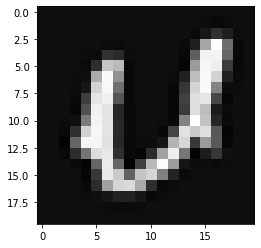

----------------------------------
Label: 	 [2]
Predição: [8]


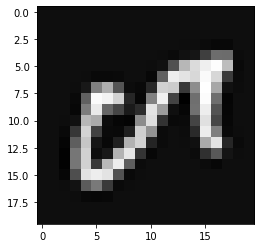

----------------------------------
Label: 	 [2]
Predição: [6]


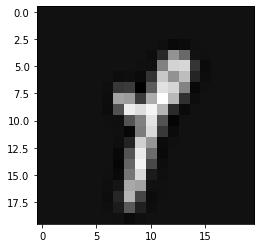

----------------------------------
Label: 	 [2]
Predição: [8]


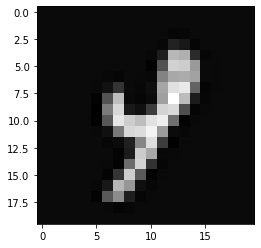

----------------------------------
Label: 	 [2]
Predição: [1]


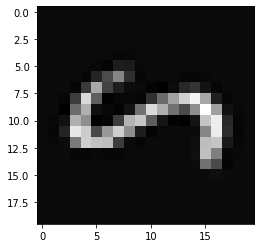

----------------------------------
Label: 	 [2]
Predição: [4]


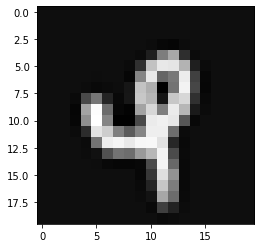

----------------------------------
Label: 	 [2]
Predição: [4]


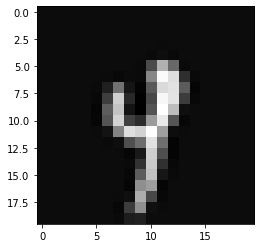

----------------------------------
Label: 	 [2]
Predição: [8]


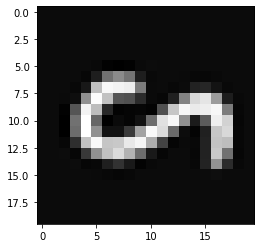

----------------------------------
Label: 	 [2]
Predição: [1]


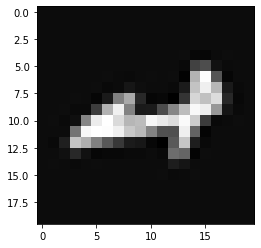

----------------------------------
Label: 	 [2]
Predição: [6]


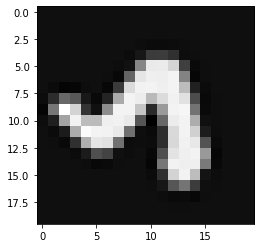

----------------------------------
Label: 	 [2]
Predição: [7]


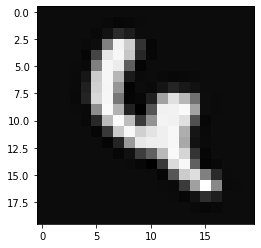

----------------------------------
Label: 	 [2]
Predição: [4]


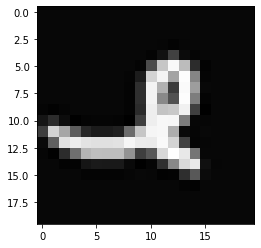

----------------------------------
Label: 	 [2]
Predição: [0]


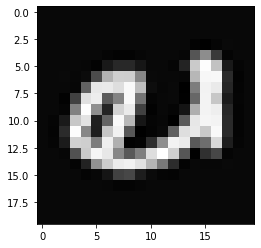

----------------------------------
Label: 	 [2]
Predição: [7]


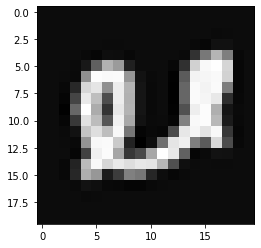

----------------------------------
Label: 	 [2]
Predição: [0]


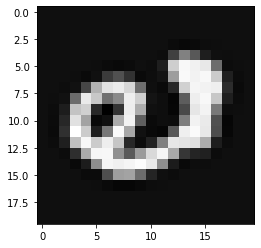

----------------------------------
Label: 	 [2]
Predição: [3]


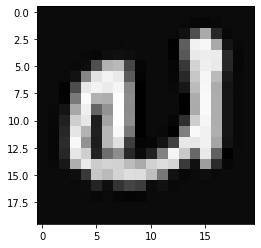

----------------------------------
Label: 	 [3]
Predição: [5]


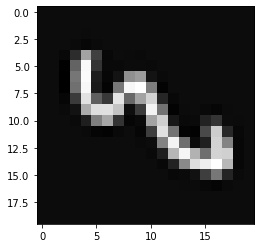

----------------------------------
Label: 	 [3]
Predição: [7]


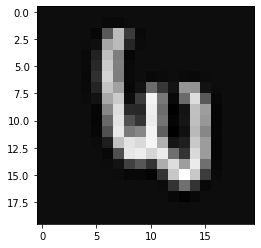

----------------------------------
Label: 	 [3]
Predição: [5]


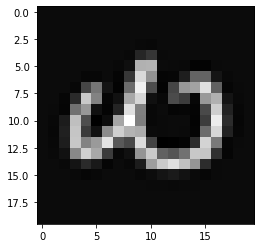

----------------------------------
Label: 	 [3]
Predição: [7]


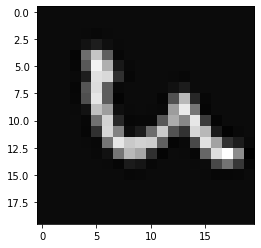

----------------------------------
Label: 	 [3]
Predição: [5]


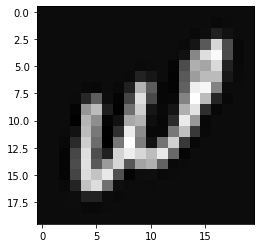

----------------------------------
Label: 	 [3]
Predição: [2]


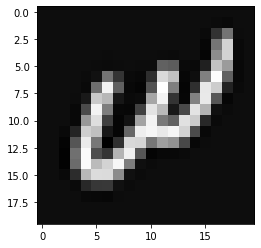

----------------------------------
Label: 	 [3]
Predição: [2]


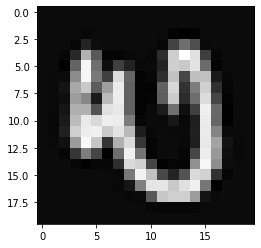

----------------------------------
Label: 	 [3]
Predição: [5]


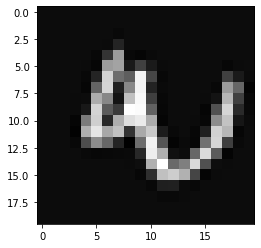

----------------------------------
Label: 	 [3]
Predição: [6]


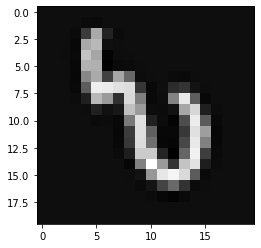

----------------------------------
Label: 	 [3]
Predição: [9]


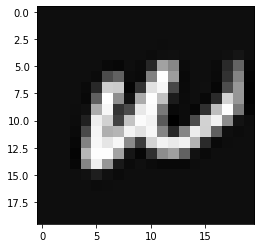

----------------------------------
Label: 	 [3]
Predição: [2]


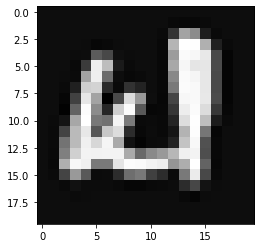

----------------------------------
Label: 	 [3]
Predição: [5]


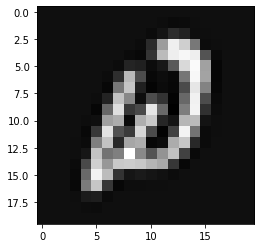

----------------------------------
Label: 	 [3]
Predição: [5]


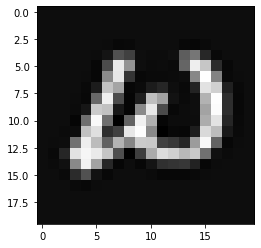

----------------------------------
Label: 	 [3]
Predição: [8]


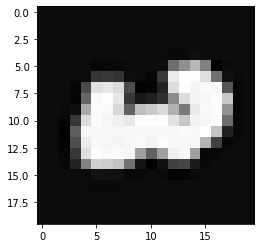

----------------------------------
Label: 	 [3]
Predição: [9]


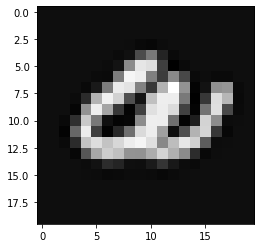

----------------------------------
Label: 	 [3]
Predição: [5]


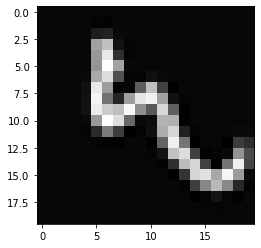

----------------------------------
Label: 	 [3]
Predição: [2]


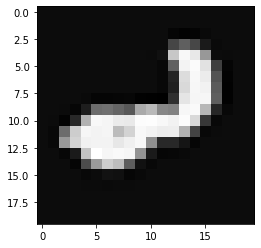

----------------------------------
Label: 	 [3]
Predição: [2]


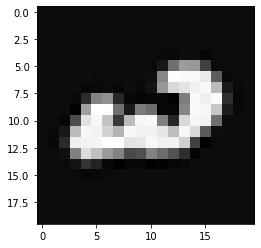

----------------------------------
Label: 	 [3]
Predição: [5]


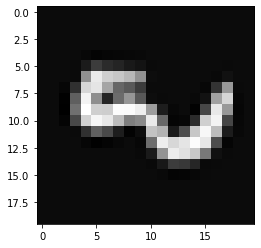

----------------------------------
Label: 	 [3]
Predição: [5]


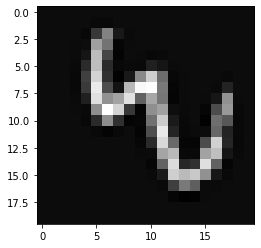

----------------------------------
Label: 	 [3]
Predição: [7]


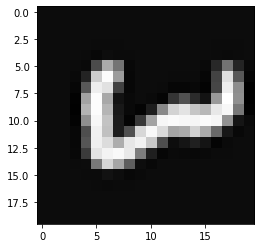

----------------------------------
Label: 	 [3]
Predição: [1]


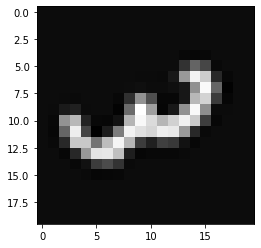

----------------------------------
Label: 	 [3]
Predição: [1]


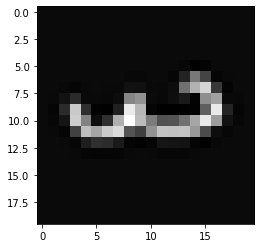

----------------------------------
Label: 	 [3]
Predição: [2]


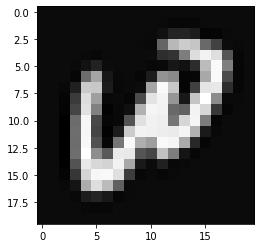

----------------------------------
Label: 	 [3]
Predição: [2]


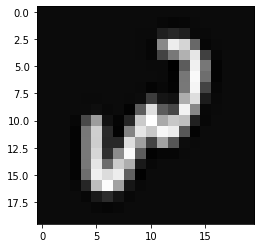

----------------------------------
Label: 	 [3]
Predição: [5]


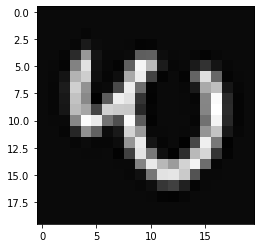

----------------------------------
Label: 	 [3]
Predição: [5]


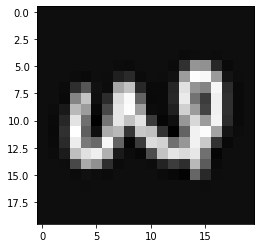

----------------------------------
Label: 	 [3]
Predição: [2]


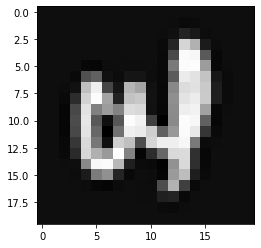

----------------------------------
Label: 	 [3]
Predição: [7]


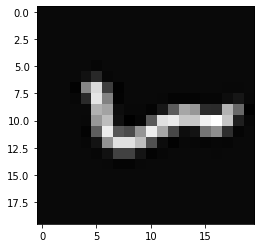

----------------------------------
Label: 	 [3]
Predição: [5]


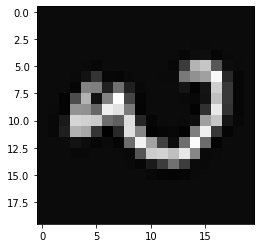

----------------------------------
Label: 	 [3]
Predição: [5]


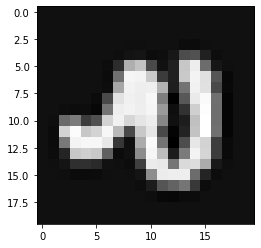

----------------------------------
Label: 	 [3]
Predição: [2]


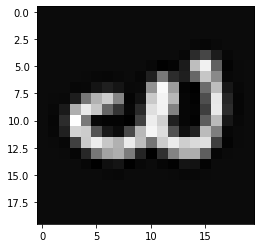

----------------------------------
Label: 	 [3]
Predição: [5]


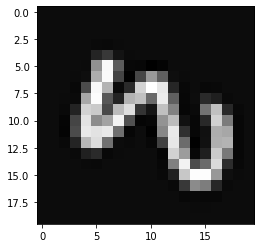

----------------------------------
Label: 	 [3]
Predição: [9]


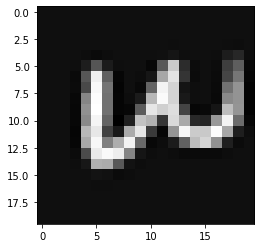

----------------------------------
Label: 	 [3]
Predição: [7]


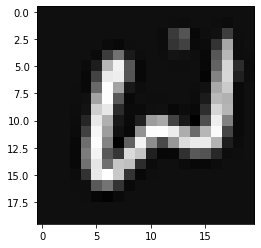

----------------------------------
Label: 	 [3]
Predição: [2]


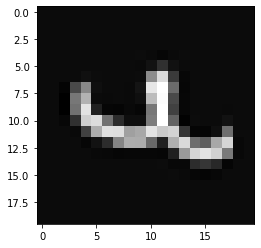

----------------------------------
Label: 	 [3]
Predição: [2]


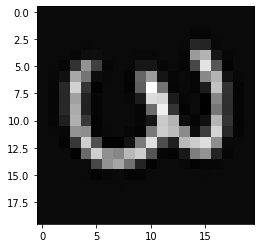

----------------------------------
Label: 	 [3]
Predição: [2]


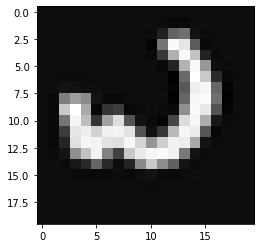

----------------------------------
Label: 	 [3]
Predição: [5]


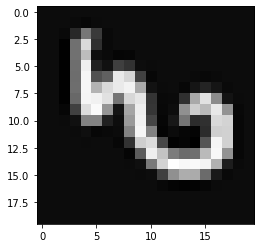

----------------------------------
Label: 	 [3]
Predição: [5]


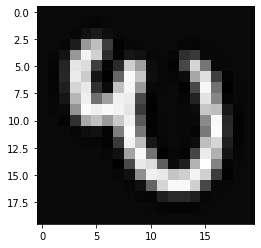

----------------------------------
Label: 	 [3]
Predição: [9]


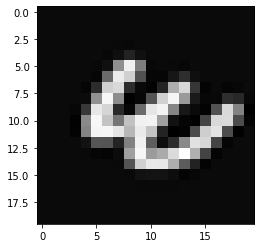

----------------------------------
Label: 	 [3]
Predição: [5]


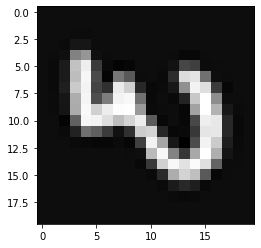

----------------------------------
Label: 	 [3]
Predição: [8]


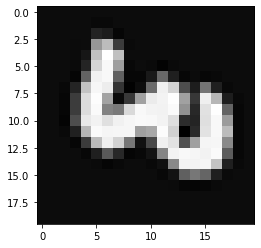

----------------------------------
Label: 	 [3]
Predição: [1]


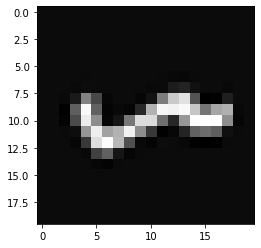

----------------------------------
Label: 	 [3]
Predição: [5]


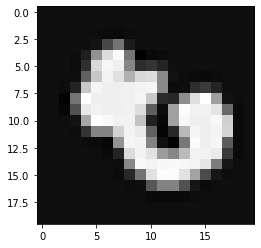

----------------------------------
Label: 	 [3]
Predição: [7]


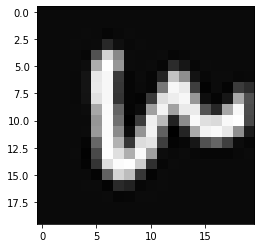

----------------------------------
Label: 	 [3]
Predição: [5]


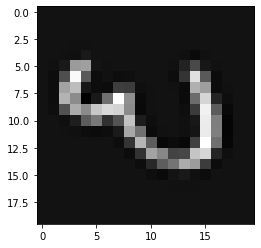

----------------------------------
Label: 	 [3]
Predição: [7]


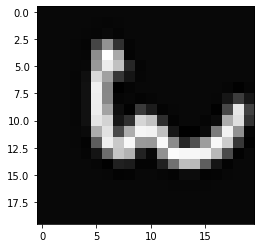

----------------------------------
Label: 	 [3]
Predição: [2]


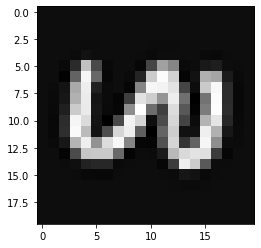

----------------------------------
Label: 	 [4]
Predição: [9]


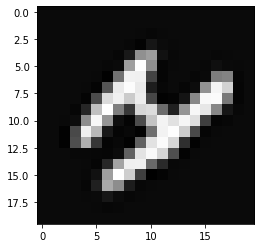

----------------------------------
Label: 	 [4]
Predição: [6]


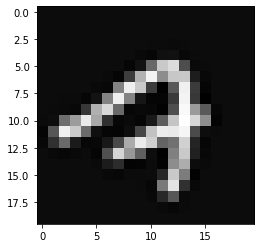

----------------------------------
Label: 	 [4]
Predição: [8]


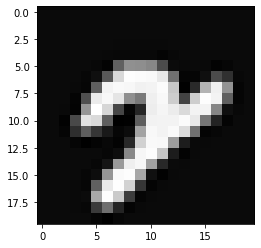

----------------------------------
Label: 	 [4]
Predição: [9]


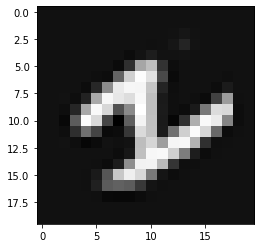

----------------------------------
Label: 	 [4]
Predição: [9]


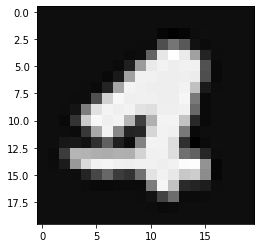

----------------------------------
Label: 	 [4]
Predição: [1]


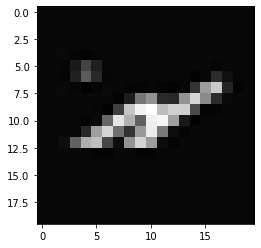

----------------------------------
Label: 	 [4]
Predição: [9]


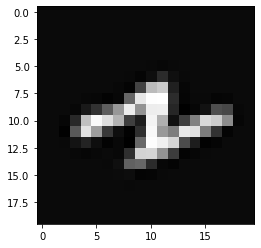

----------------------------------
Label: 	 [4]
Predição: [1]


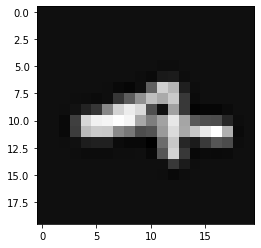

----------------------------------
Label: 	 [4]
Predição: [9]


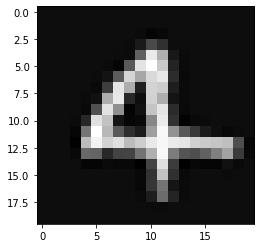

----------------------------------
Label: 	 [4]
Predição: [9]


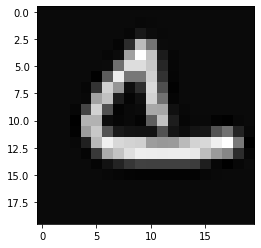

----------------------------------
Label: 	 [4]
Predição: [9]


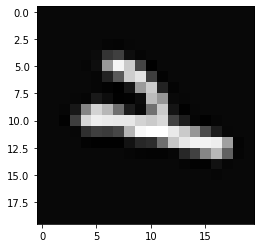

----------------------------------
Label: 	 [4]
Predição: [9]


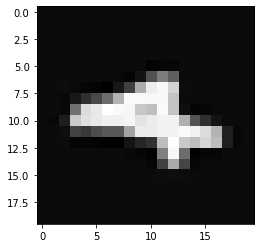

----------------------------------
Label: 	 [4]
Predição: [2]


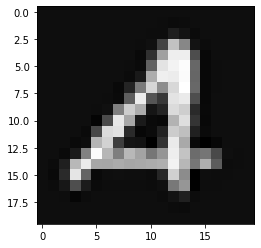

----------------------------------
Label: 	 [4]
Predição: [9]


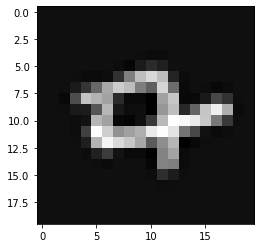

----------------------------------
Label: 	 [4]
Predição: [2]


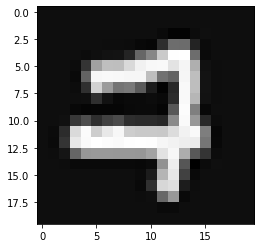

----------------------------------
Label: 	 [4]
Predição: [9]


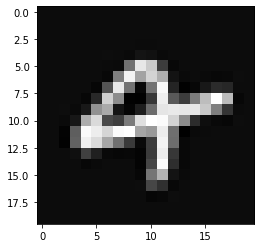

----------------------------------
Label: 	 [4]
Predição: [2]


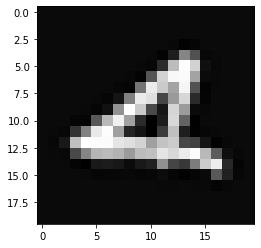

----------------------------------
Label: 	 [4]
Predição: [9]


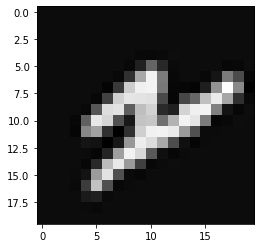

----------------------------------
Label: 	 [4]
Predição: [9]


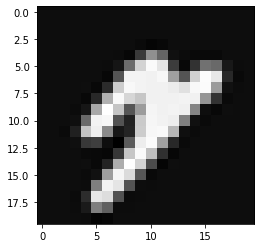

----------------------------------
Label: 	 [4]
Predição: [9]


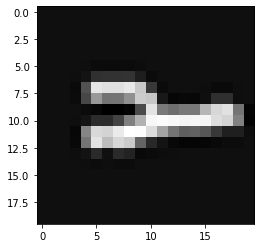

----------------------------------
Label: 	 [4]
Predição: [9]


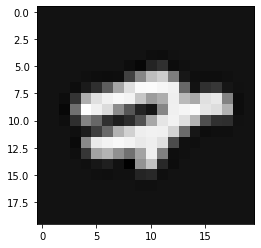

----------------------------------
Label: 	 [4]
Predição: [6]


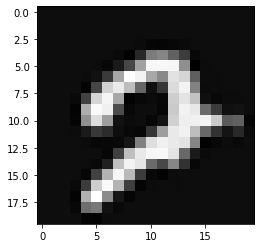

----------------------------------
Label: 	 [4]
Predição: [9]


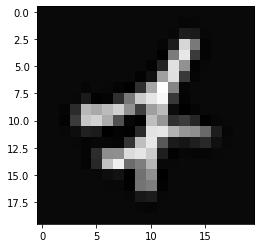

----------------------------------
Label: 	 [4]
Predição: [6]


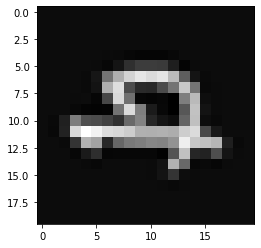

----------------------------------
Label: 	 [4]
Predição: [9]


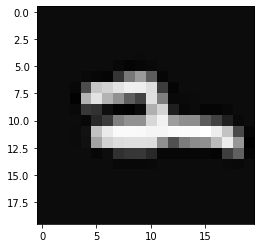

----------------------------------
Label: 	 [4]
Predição: [9]


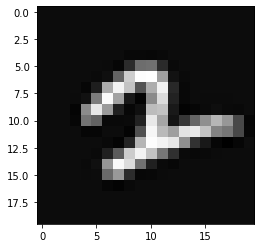

----------------------------------
Label: 	 [4]
Predição: [9]


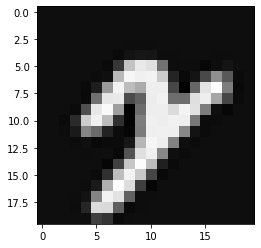

----------------------------------
Label: 	 [4]
Predição: [9]


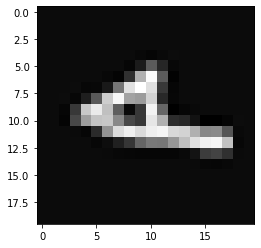

----------------------------------
Label: 	 [4]
Predição: [9]


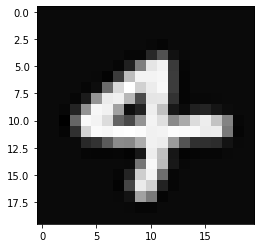

----------------------------------
Label: 	 [4]
Predição: [8]


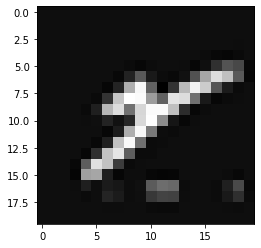

----------------------------------
Label: 	 [4]
Predição: [6]


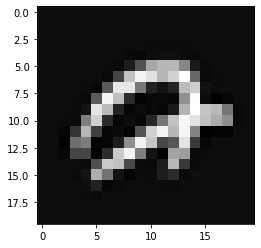

----------------------------------
Label: 	 [4]
Predição: [9]


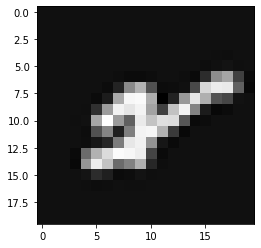

----------------------------------
Label: 	 [5]
Predição: [3]


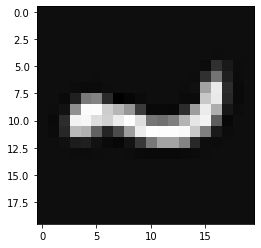

----------------------------------
Label: 	 [5]
Predição: [9]


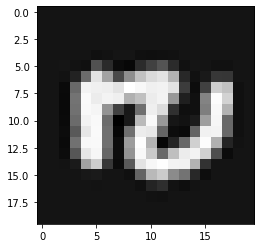

----------------------------------
Label: 	 [5]
Predição: [6]


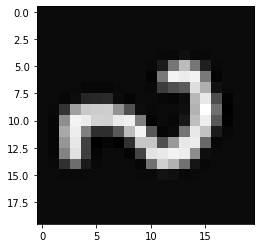

----------------------------------
Label: 	 [5]
Predição: [9]


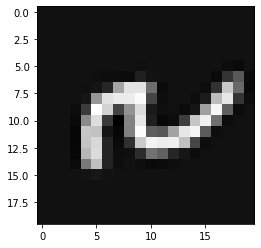

----------------------------------
Label: 	 [5]
Predição: [4]


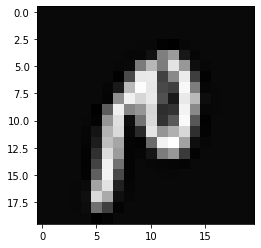

----------------------------------
Label: 	 [5]
Predição: [2]


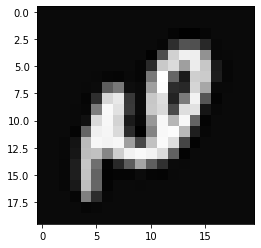

----------------------------------
Label: 	 [5]
Predição: [4]


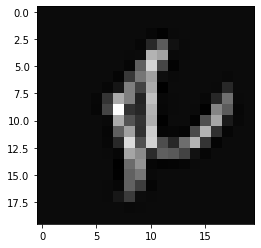

----------------------------------
Label: 	 [5]
Predição: [3]


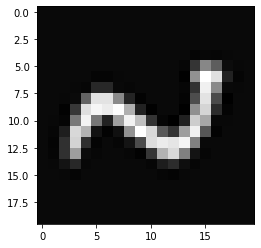

----------------------------------
Label: 	 [5]
Predição: [4]


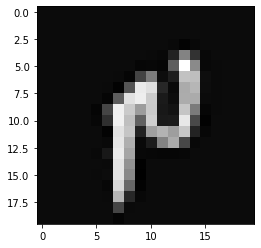

----------------------------------
Label: 	 [5]
Predição: [4]


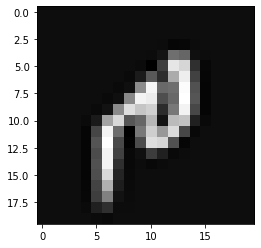

----------------------------------
Label: 	 [5]
Predição: [6]


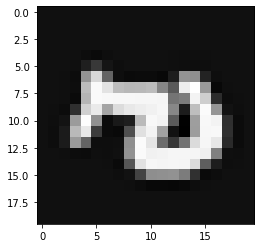

----------------------------------
Label: 	 [5]
Predição: [3]


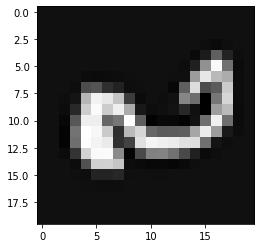

----------------------------------
Label: 	 [5]
Predição: [4]


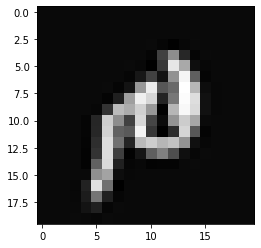

----------------------------------
Label: 	 [5]
Predição: [2]


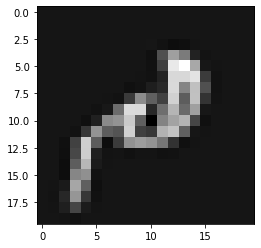

----------------------------------
Label: 	 [5]
Predição: [3]


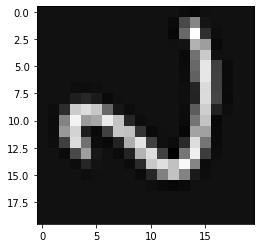

----------------------------------
Label: 	 [5]
Predição: [8]


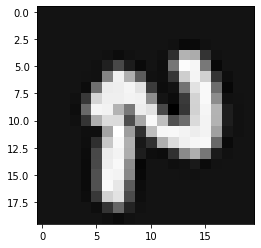

----------------------------------
Label: 	 [5]
Predição: [6]


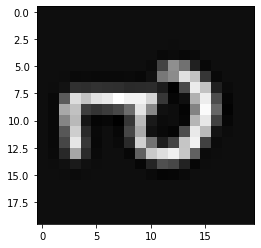

----------------------------------
Label: 	 [5]
Predição: [8]


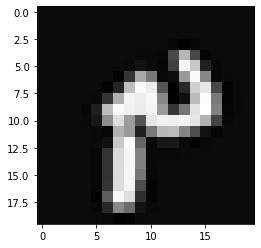

----------------------------------
Label: 	 [5]
Predição: [3]


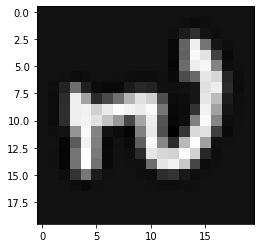

----------------------------------
Label: 	 [5]
Predição: [9]


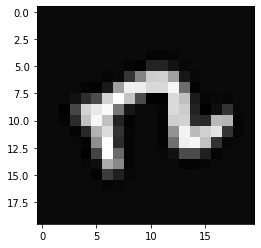

----------------------------------
Label: 	 [5]
Predição: [9]


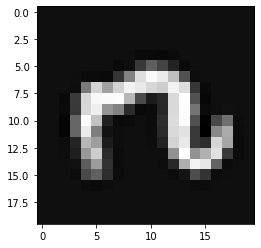

----------------------------------
Label: 	 [5]
Predição: [4]


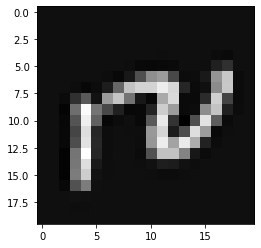

----------------------------------
Label: 	 [5]
Predição: [6]


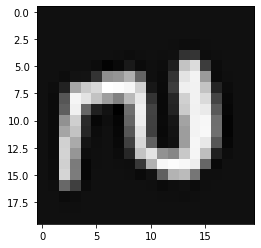

----------------------------------
Label: 	 [5]
Predição: [6]


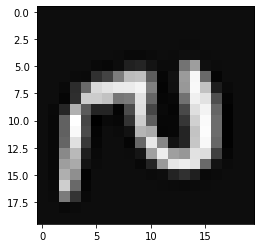

----------------------------------
Label: 	 [5]
Predição: [3]


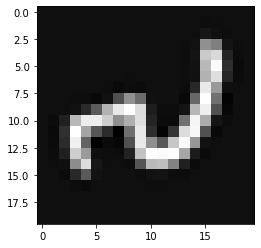

----------------------------------
Label: 	 [5]
Predição: [3]


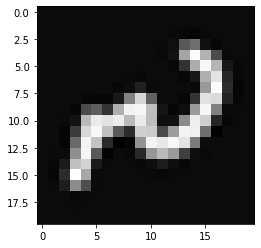

----------------------------------
Label: 	 [5]
Predição: [3]


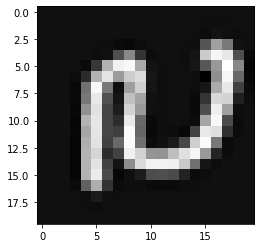

----------------------------------
Label: 	 [5]
Predição: [2]


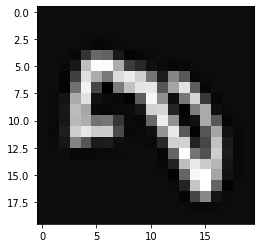

----------------------------------
Label: 	 [5]
Predição: [3]


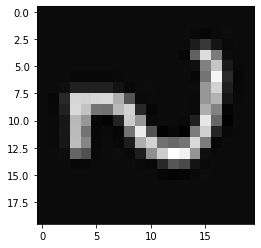

----------------------------------
Label: 	 [5]
Predição: [0]


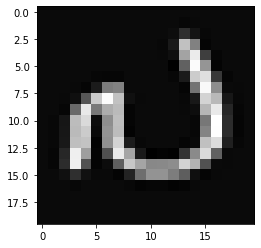

----------------------------------
Label: 	 [5]
Predição: [0]


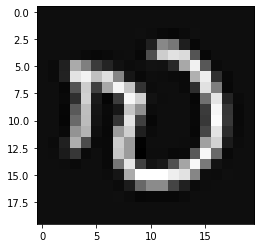

----------------------------------
Label: 	 [5]
Predição: [1]


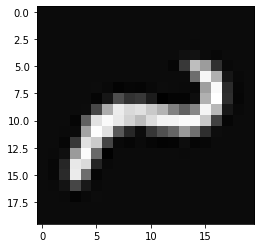

----------------------------------
Label: 	 [5]
Predição: [8]


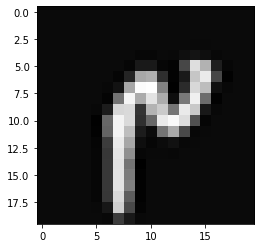

----------------------------------
Label: 	 [5]
Predição: [3]


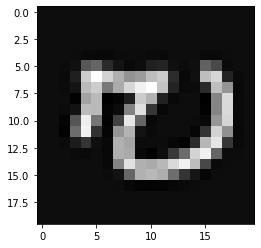

----------------------------------
Label: 	 [5]
Predição: [9]


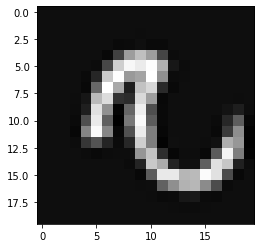

----------------------------------
Label: 	 [5]
Predição: [3]


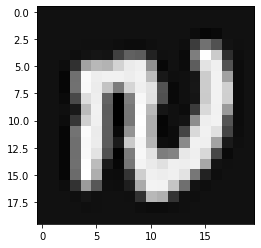

----------------------------------
Label: 	 [5]
Predição: [0]


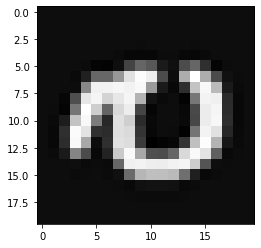

----------------------------------
Label: 	 [5]
Predição: [6]


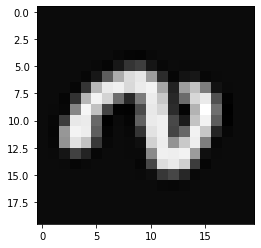

----------------------------------
Label: 	 [5]
Predição: [0]


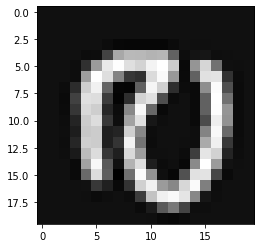

----------------------------------
Label: 	 [5]
Predição: [1]


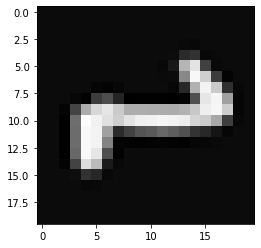

----------------------------------
Label: 	 [5]
Predição: [4]


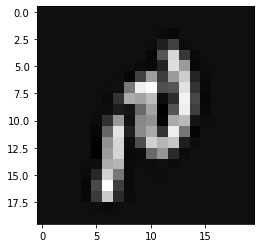

----------------------------------
Label: 	 [5]
Predição: [4]


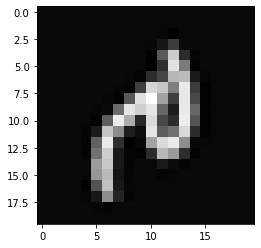

----------------------------------
Label: 	 [5]
Predição: [4]


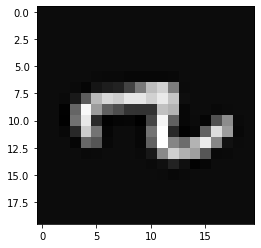

----------------------------------
Label: 	 [5]
Predição: [4]


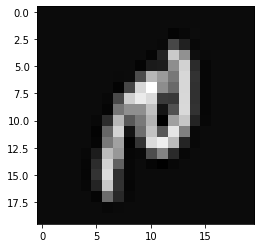

----------------------------------
Label: 	 [5]
Predição: [9]


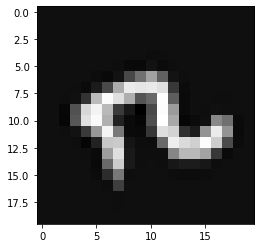

----------------------------------
Label: 	 [5]
Predição: [3]


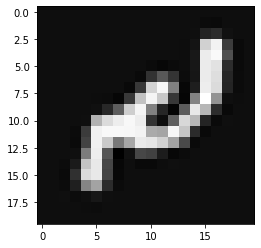

----------------------------------
Label: 	 [6]
Predição: [0]


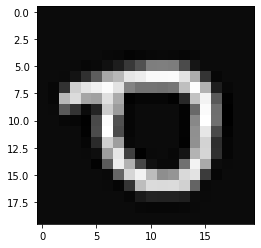

----------------------------------
Label: 	 [6]
Predição: [9]


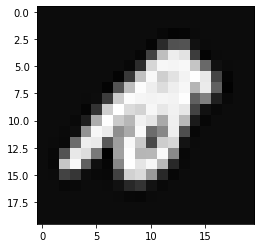

----------------------------------
Label: 	 [6]
Predição: [5]


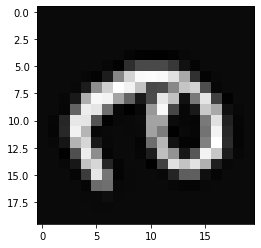

----------------------------------
Label: 	 [6]
Predição: [1]


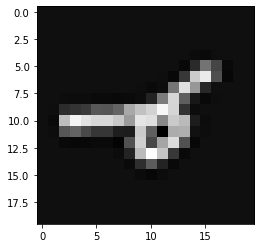

----------------------------------
Label: 	 [6]
Predição: [5]


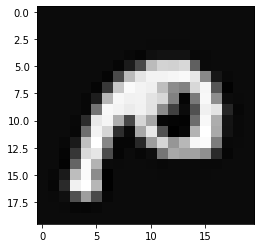

----------------------------------
Label: 	 [6]
Predição: [1]


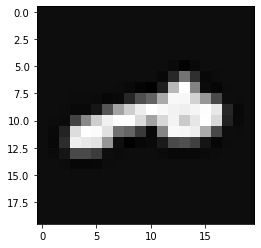

----------------------------------
Label: 	 [6]
Predição: [5]


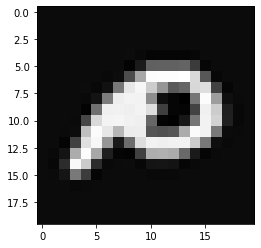

----------------------------------
Label: 	 [6]
Predição: [8]


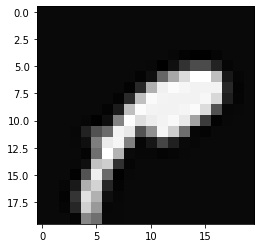

----------------------------------
Label: 	 [6]
Predição: [5]


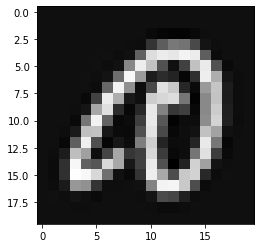

----------------------------------
Label: 	 [6]
Predição: [5]


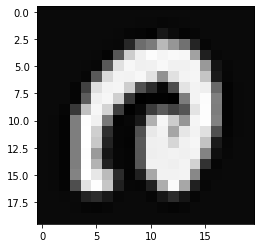

----------------------------------
Label: 	 [6]
Predição: [0]


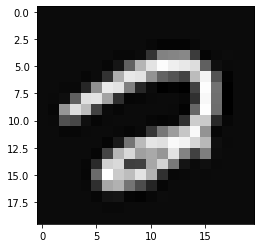

----------------------------------
Label: 	 [6]
Predição: [5]


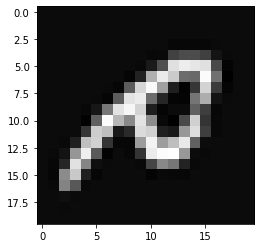

----------------------------------
Label: 	 [6]
Predição: [2]


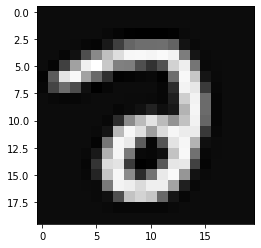

----------------------------------
Label: 	 [6]
Predição: [5]


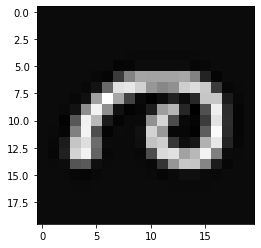

----------------------------------
Label: 	 [6]
Predição: [5]


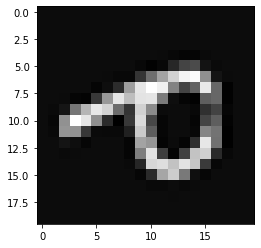

----------------------------------
Label: 	 [7]
Predição: [4]


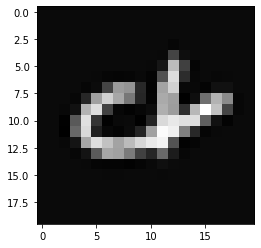

----------------------------------
Label: 	 [7]
Predição: [9]


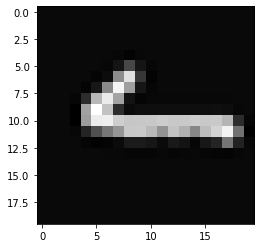

----------------------------------
Label: 	 [7]
Predição: [1]


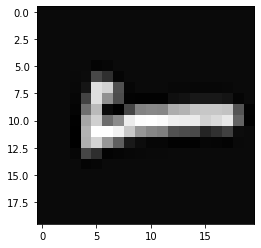

----------------------------------
Label: 	 [7]
Predição: [9]


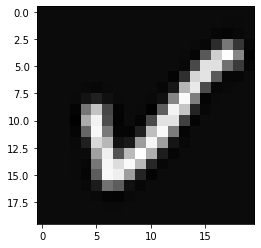

----------------------------------
Label: 	 [7]
Predição: [9]


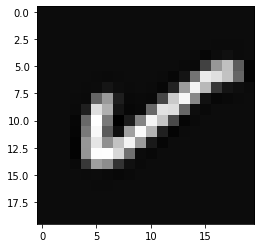

----------------------------------
Label: 	 [7]
Predição: [1]


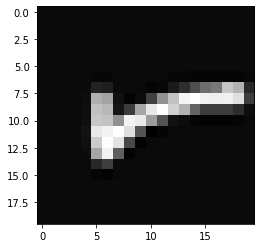

----------------------------------
Label: 	 [7]
Predição: [2]


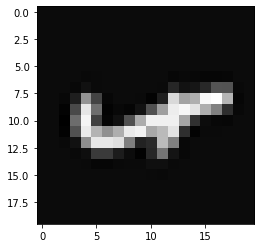

----------------------------------
Label: 	 [7]
Predição: [4]


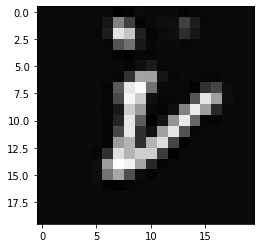

----------------------------------
Label: 	 [7]
Predição: [4]


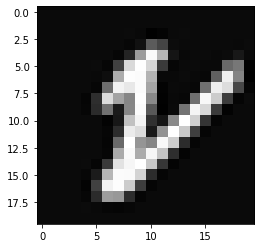

----------------------------------
Label: 	 [7]
Predição: [4]


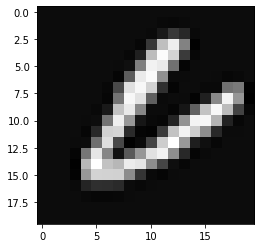

----------------------------------
Label: 	 [7]
Predição: [4]


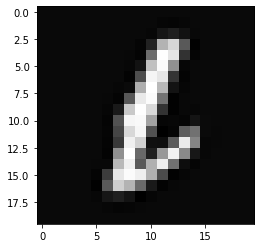

----------------------------------
Label: 	 [7]
Predição: [9]


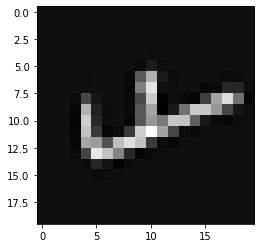

----------------------------------
Label: 	 [7]
Predição: [9]


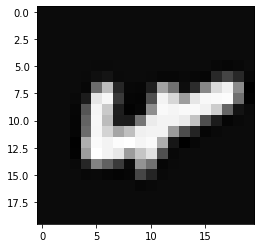

----------------------------------
Label: 	 [7]
Predição: [0]


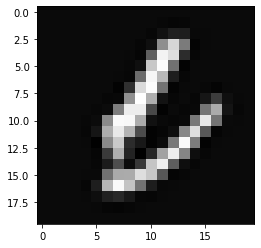

----------------------------------
Label: 	 [7]
Predição: [9]


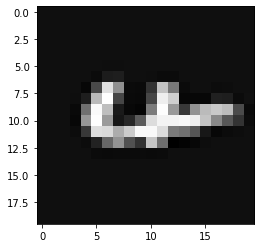

----------------------------------
Label: 	 [7]
Predição: [5]


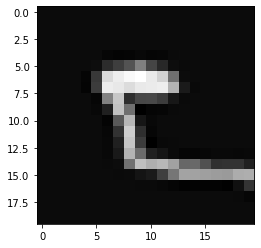

----------------------------------
Label: 	 [7]
Predição: [9]


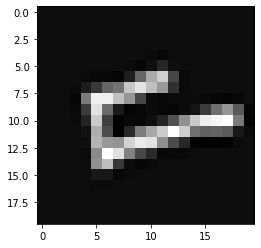

----------------------------------
Label: 	 [7]
Predição: [9]


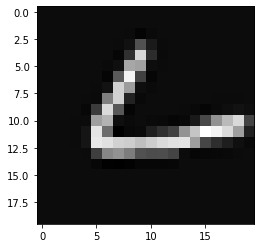

----------------------------------
Label: 	 [7]
Predição: [0]


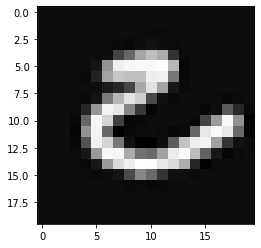

----------------------------------
Label: 	 [7]
Predição: [2]


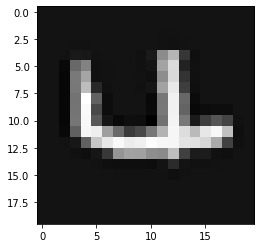

----------------------------------
Label: 	 [7]
Predição: [9]


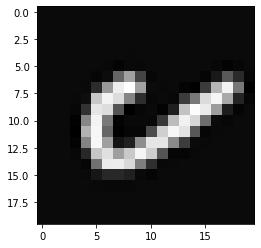

----------------------------------
Label: 	 [7]
Predição: [2]


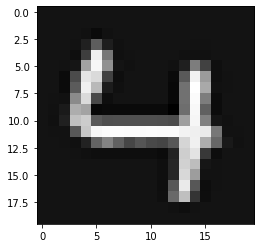

----------------------------------
Label: 	 [7]
Predição: [9]


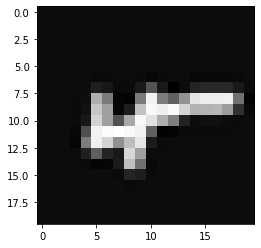

----------------------------------
Label: 	 [7]
Predição: [1]


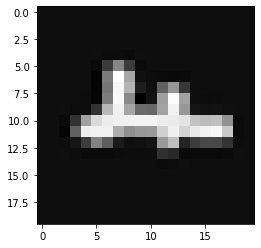

----------------------------------
Label: 	 [7]
Predição: [9]


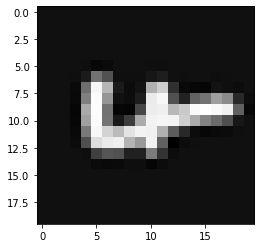

----------------------------------
Label: 	 [7]
Predição: [9]


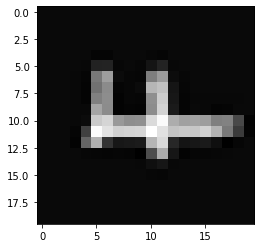

----------------------------------
Label: 	 [7]
Predição: [1]


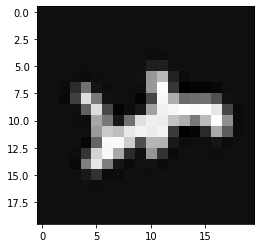

----------------------------------
Label: 	 [7]
Predição: [4]


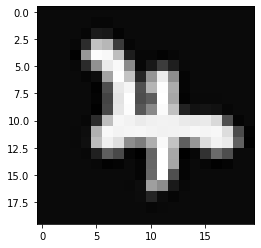

----------------------------------
Label: 	 [7]
Predição: [1]


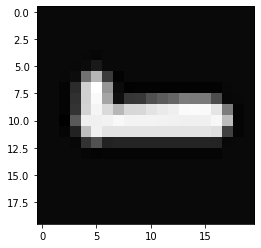

----------------------------------
Label: 	 [7]
Predição: [4]


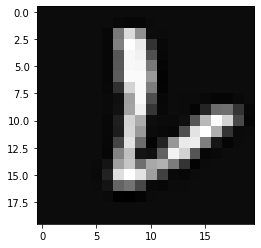

----------------------------------
Label: 	 [7]
Predição: [9]


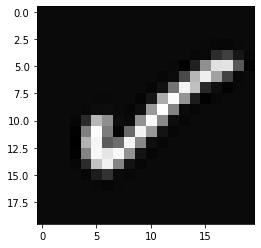

----------------------------------
Label: 	 [7]
Predição: [9]


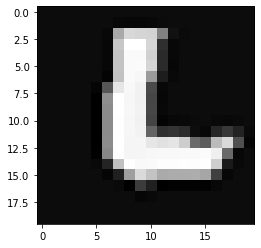

----------------------------------
Label: 	 [7]
Predição: [9]


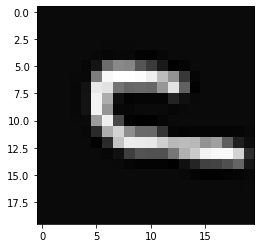

----------------------------------
Label: 	 [8]
Predição: [1]


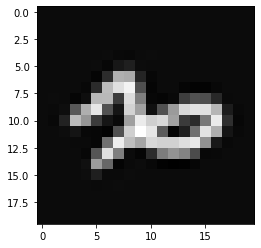

----------------------------------
Label: 	 [8]
Predição: [5]


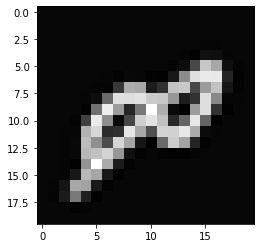

----------------------------------
Label: 	 [8]
Predição: [1]


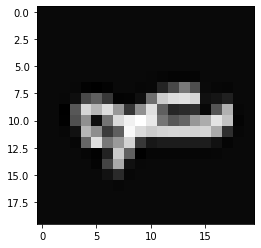

----------------------------------
Label: 	 [8]
Predição: [1]


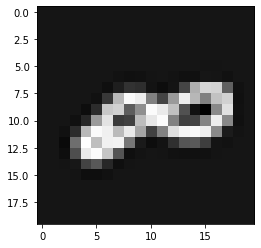

----------------------------------
Label: 	 [8]
Predição: [3]


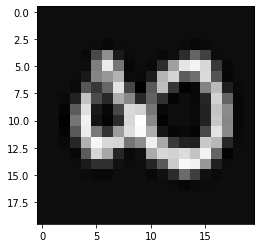

----------------------------------
Label: 	 [8]
Predição: [4]


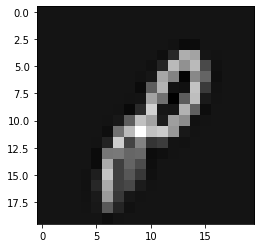

----------------------------------
Label: 	 [8]
Predição: [1]


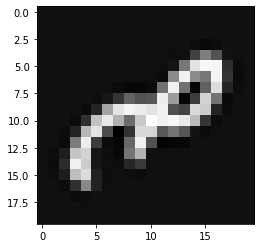

----------------------------------
Label: 	 [8]
Predição: [5]


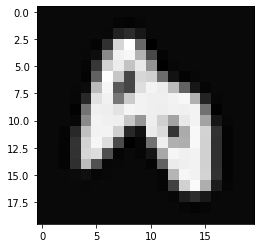

----------------------------------
Label: 	 [8]
Predição: [5]


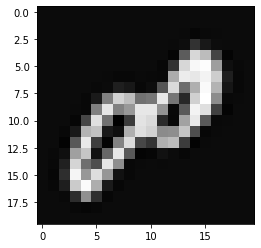

----------------------------------
Label: 	 [8]
Predição: [6]


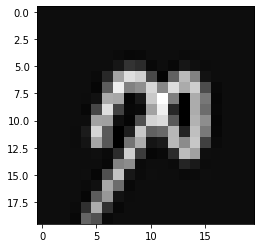

----------------------------------
Label: 	 [8]
Predição: [1]


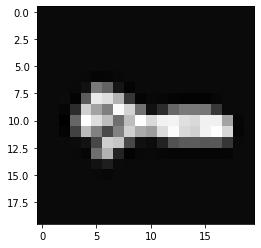

----------------------------------
Label: 	 [8]
Predição: [2]


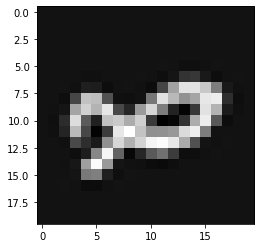

----------------------------------
Label: 	 [8]
Predição: [2]


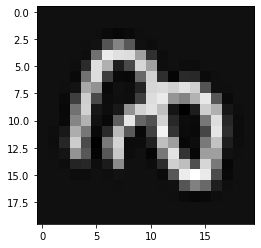

----------------------------------
Label: 	 [8]
Predição: [4]


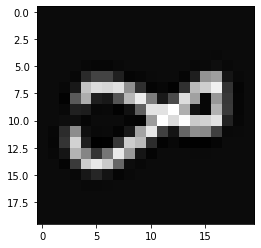

----------------------------------
Label: 	 [8]
Predição: [3]


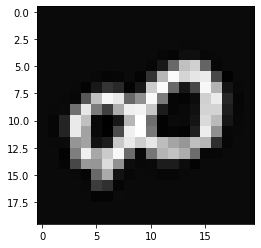

----------------------------------
Label: 	 [8]
Predição: [1]


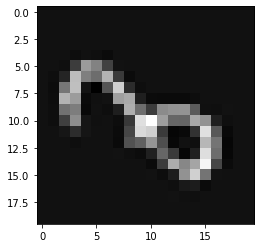

----------------------------------
Label: 	 [8]
Predição: [0]


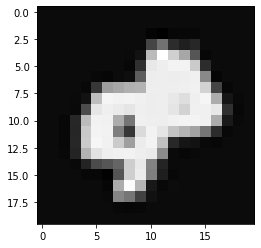

----------------------------------
Label: 	 [8]
Predição: [7]


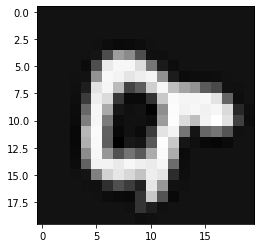

----------------------------------
Label: 	 [8]
Predição: [6]


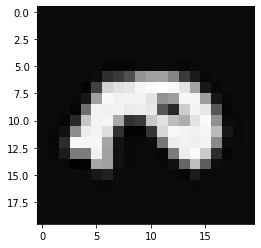

----------------------------------
Label: 	 [8]
Predição: [1]


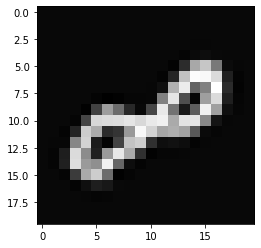

----------------------------------
Label: 	 [8]
Predição: [3]


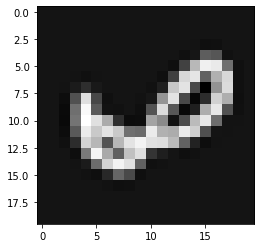

----------------------------------
Label: 	 [8]
Predição: [1]


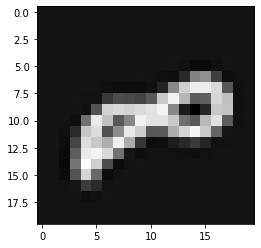

----------------------------------
Label: 	 [8]
Predição: [9]


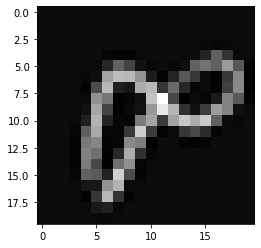

----------------------------------
Label: 	 [8]
Predição: [9]


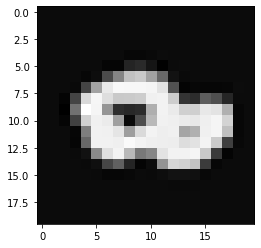

----------------------------------
Label: 	 [8]
Predição: [1]


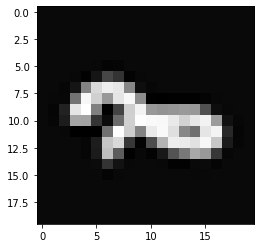

----------------------------------
Label: 	 [8]
Predição: [1]


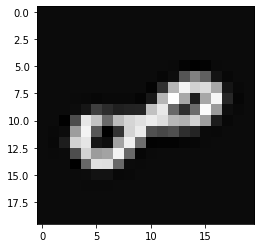

----------------------------------
Label: 	 [8]
Predição: [9]


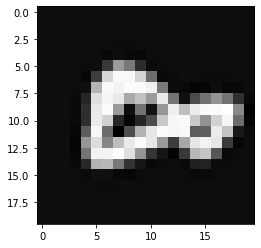

----------------------------------
Label: 	 [8]
Predição: [9]


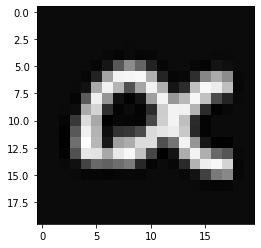

----------------------------------
Label: 	 [8]
Predição: [6]


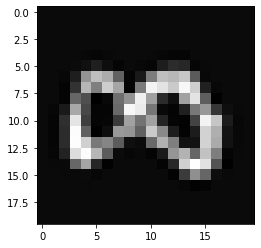

----------------------------------
Label: 	 [8]
Predição: [3]


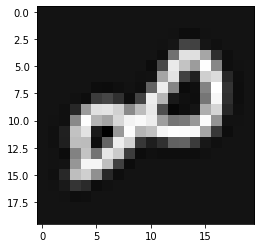

----------------------------------
Label: 	 [8]
Predição: [0]


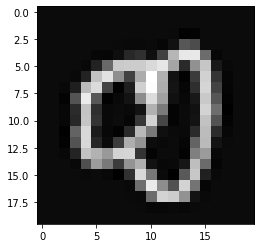

----------------------------------
Label: 	 [8]
Predição: [5]


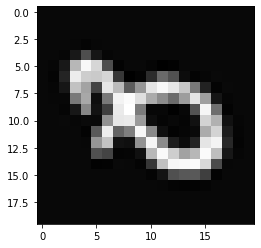

----------------------------------
Label: 	 [8]
Predição: [3]


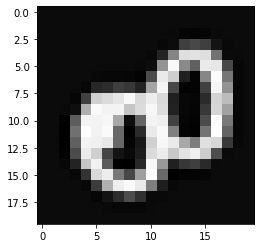

----------------------------------
Label: 	 [8]
Predição: [9]


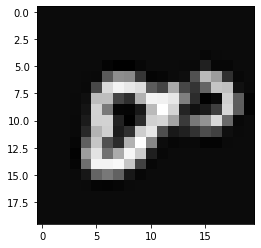

----------------------------------
Label: 	 [8]
Predição: [3]


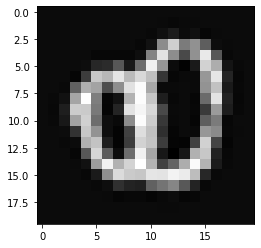

----------------------------------
Label: 	 [8]
Predição: [4]


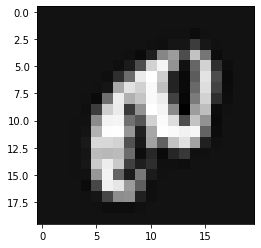

----------------------------------
Label: 	 [8]
Predição: [9]


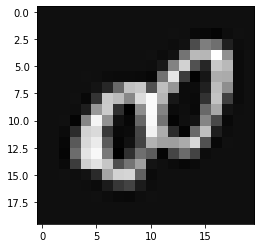

----------------------------------
Label: 	 [8]
Predição: [5]


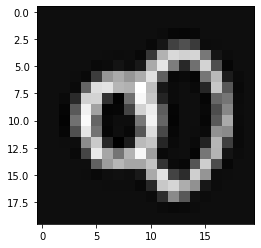

----------------------------------
Label: 	 [8]
Predição: [5]


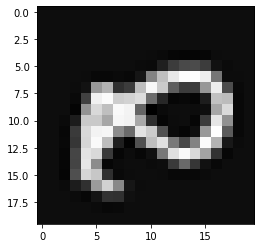

----------------------------------
Label: 	 [8]
Predição: [9]


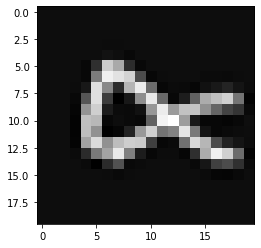

----------------------------------
Label: 	 [8]
Predição: [4]


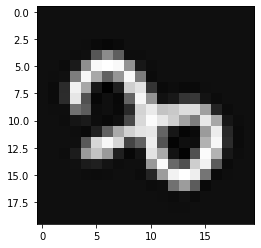

----------------------------------
Label: 	 [8]
Predição: [4]


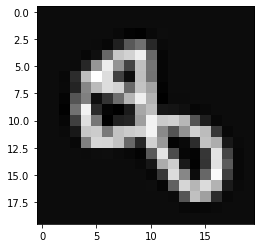

----------------------------------
Label: 	 [8]
Predição: [3]


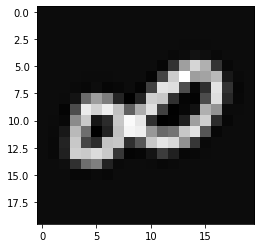

----------------------------------
Label: 	 [8]
Predição: [3]


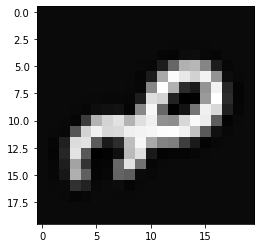

----------------------------------
Label: 	 [8]
Predição: [3]


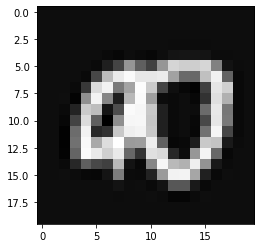

----------------------------------
Label: 	 [8]
Predição: [2]


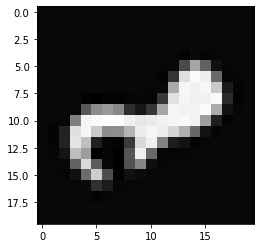

----------------------------------
Label: 	 [8]
Predição: [1]


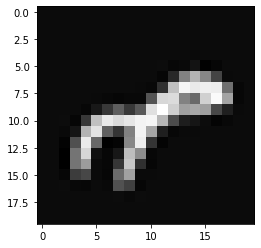

----------------------------------
Label: 	 [8]
Predição: [1]


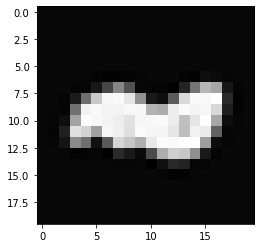

----------------------------------
Label: 	 [8]
Predição: [1]


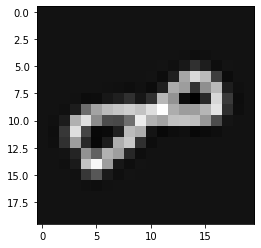

----------------------------------
Label: 	 [8]
Predição: [3]


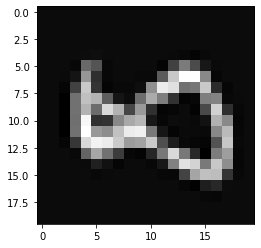

----------------------------------
Label: 	 [8]
Predição: [4]


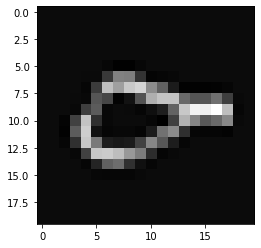

----------------------------------
Label: 	 [8]
Predição: [3]


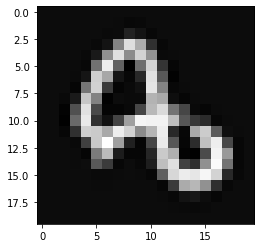

----------------------------------
Label: 	 [8]
Predição: [2]


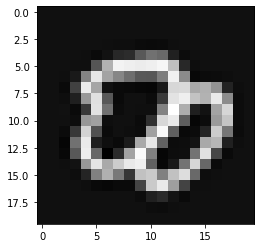

----------------------------------
Label: 	 [8]
Predição: [6]


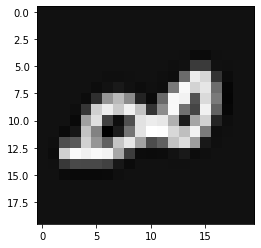

----------------------------------
Label: 	 [8]
Predição: [5]


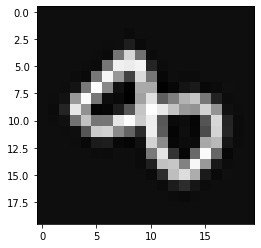

----------------------------------
Label: 	 [8]
Predição: [5]


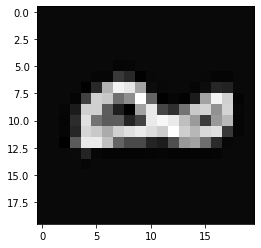

----------------------------------
Label: 	 [8]
Predição: [6]


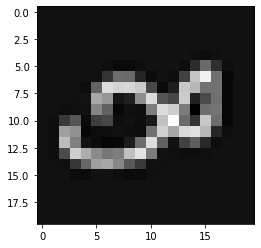

----------------------------------
Label: 	 [8]
Predição: [5]


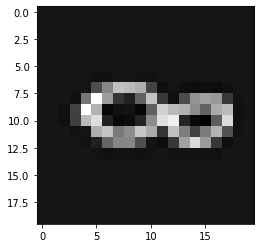

----------------------------------
Label: 	 [8]
Predição: [4]


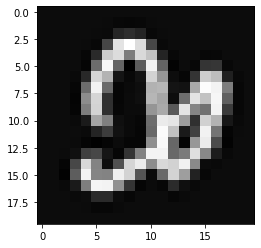

----------------------------------
Label: 	 [8]
Predição: [2]


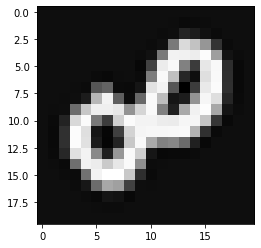

----------------------------------
Label: 	 [8]
Predição: [2]


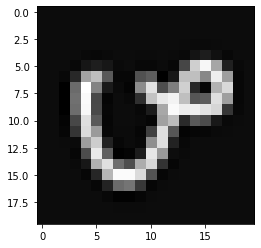

----------------------------------
Label: 	 [8]
Predição: [9]


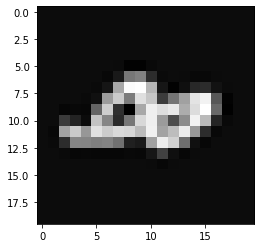

----------------------------------
Label: 	 [8]
Predição: [6]


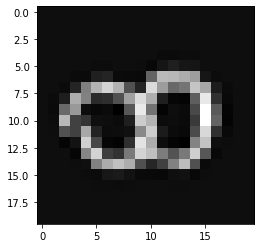

----------------------------------
Label: 	 [8]
Predição: [5]


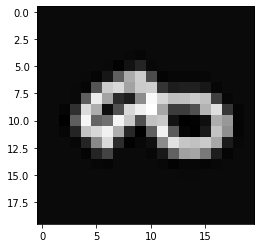

----------------------------------
Label: 	 [8]
Predição: [6]


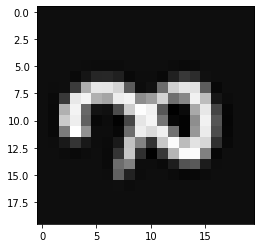

----------------------------------
Label: 	 [8]
Predição: [3]


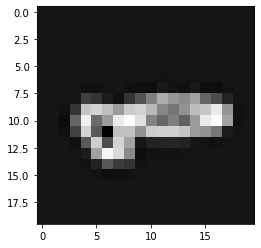

----------------------------------
Label: 	 [8]
Predição: [1]


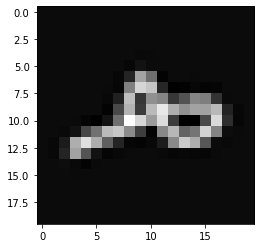

----------------------------------
Label: 	 [8]
Predição: [5]


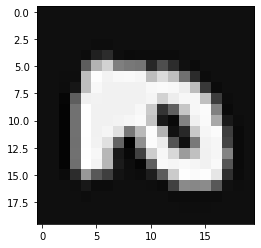

----------------------------------
Label: 	 [8]
Predição: [9]


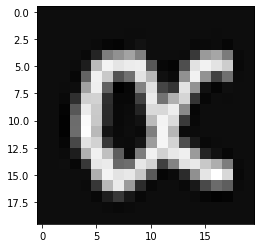

----------------------------------
Label: 	 [8]
Predição: [9]


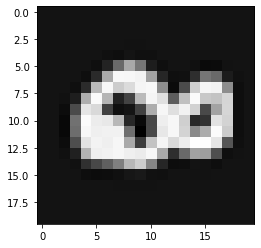

----------------------------------
Label: 	 [8]
Predição: [9]


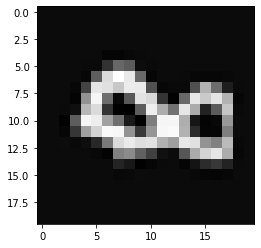

----------------------------------
Label: 	 [8]
Predição: [2]


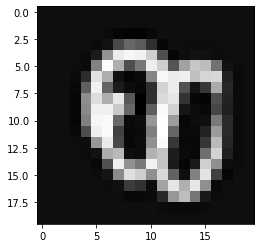

----------------------------------
Label: 	 [8]
Predição: [2]


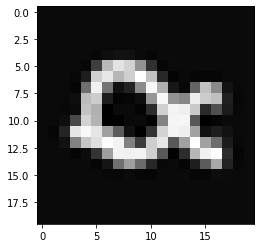

----------------------------------
Label: 	 [8]
Predição: [3]


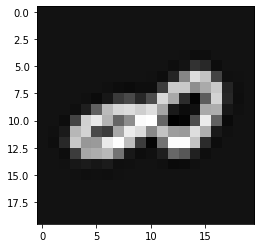

----------------------------------
Label: 	 [8]
Predição: [9]


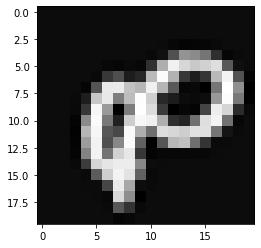

----------------------------------
Label: 	 [8]
Predição: [5]


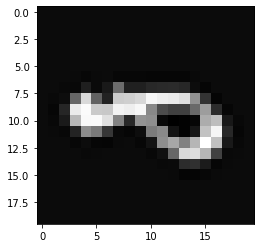

----------------------------------
Label: 	 [8]
Predição: [5]


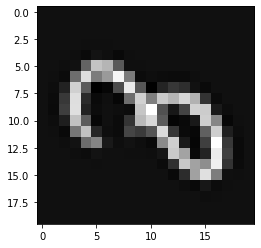

----------------------------------
Label: 	 [8]
Predição: [3]


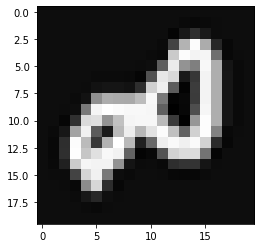

----------------------------------
Label: 	 [8]
Predição: [9]


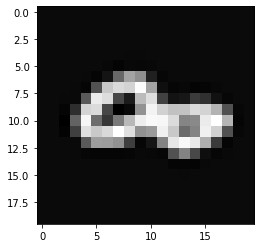

----------------------------------
Label: 	 [8]
Predição: [9]


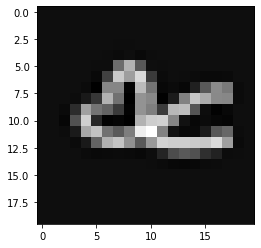

----------------------------------
Label: 	 [9]
Predição: [7]


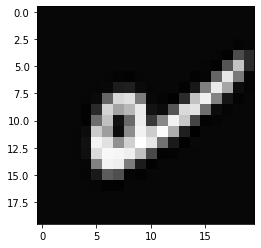

----------------------------------
Label: 	 [9]
Predição: [5]


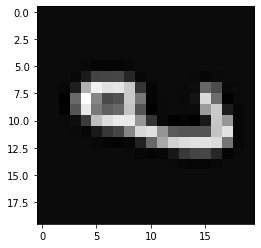

----------------------------------
Label: 	 [9]
Predição: [0]


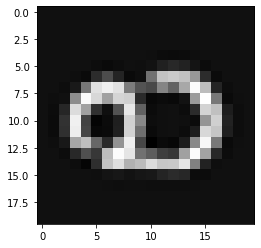

----------------------------------
Label: 	 [9]
Predição: [7]


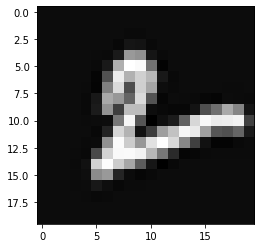

----------------------------------
Label: 	 [9]
Predição: [7]


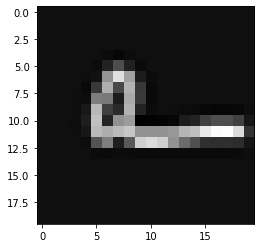

----------------------------------
Label: 	 [9]
Predição: [4]


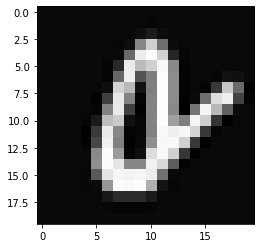

----------------------------------
Label: 	 [9]
Predição: [2]


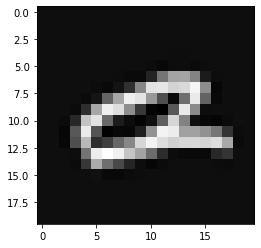

----------------------------------
Label: 	 [9]
Predição: [7]


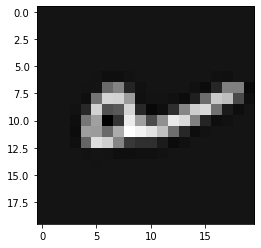

----------------------------------
Label: 	 [9]
Predição: [0]


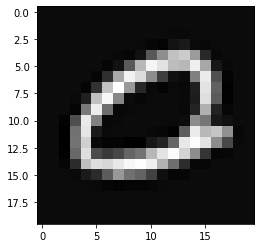

----------------------------------
Label: 	 [9]
Predição: [3]


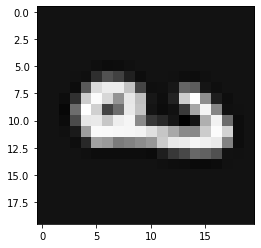

----------------------------------
Label: 	 [9]
Predição: [3]


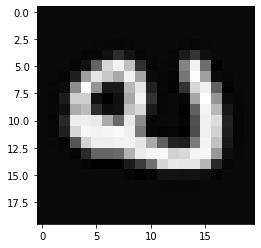

----------------------------------
Label: 	 [9]
Predição: [3]


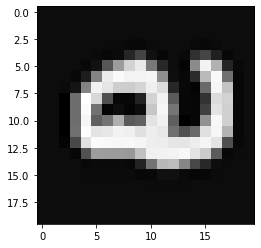

----------------------------------
Label: 	 [9]
Predição: [4]


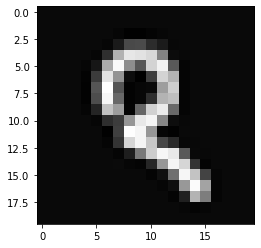

----------------------------------
Label: 	 [9]
Predição: [7]


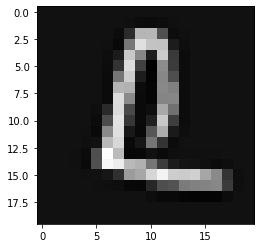

----------------------------------
Label: 	 [9]
Predição: [0]


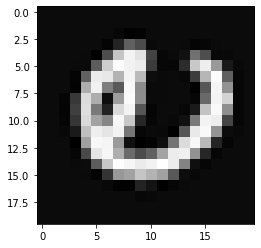

----------------------------------
Label: 	 [9]
Predição: [7]


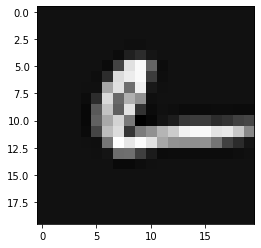

----------------------------------
Label: 	 [9]
Predição: [5]


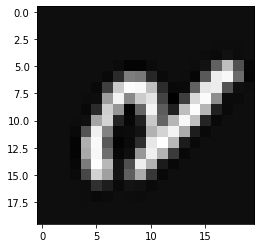

----------------------------------
Label: 	 [9]
Predição: [2]


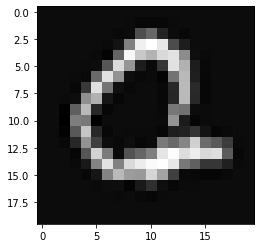

----------------------------------
Label: 	 [9]
Predição: [2]


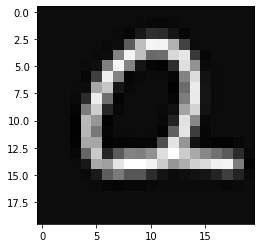

----------------------------------
Label: 	 [9]
Predição: [7]


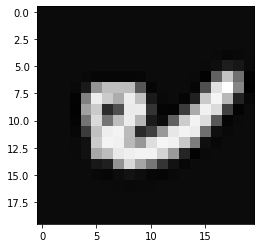

----------------------------------
Label: 	 [9]
Predição: [7]


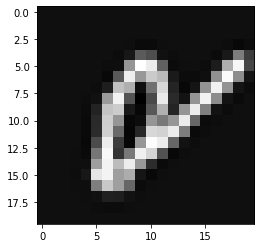

----------------------------------
Label: 	 [9]
Predição: [5]


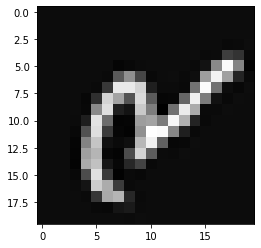

----------------------------------
Label: 	 [9]
Predição: [3]


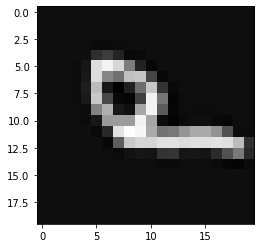

----------------------------------
Label: 	 [9]
Predição: [3]


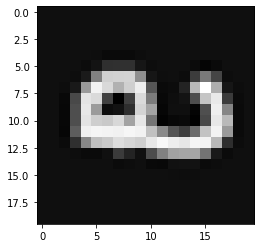

----------------------------------
Label: 	 [9]
Predição: [1]


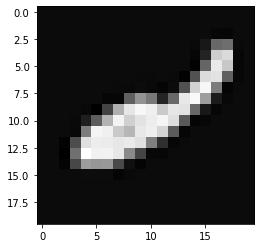

----------------------------------
Label: 	 [9]
Predição: [7]


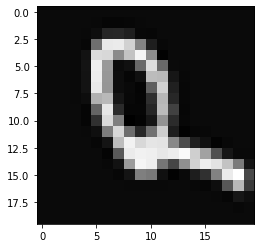

----------------------------------
Label: 	 [9]
Predição: [1]


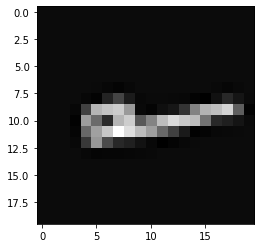

----------------------------------
Label: 	 [9]
Predição: [7]


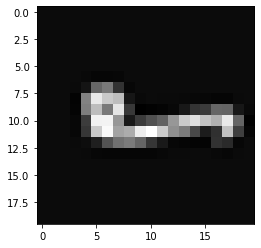

----------------------------------
Label: 	 [9]
Predição: [8]


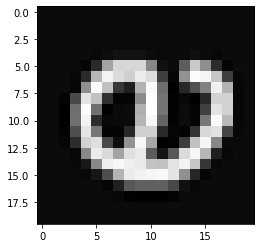

----------------------------------
Label: 	 [9]
Predição: [7]


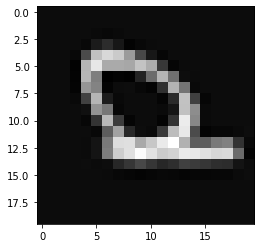

----------------------------------
Label: 	 [9]
Predição: [4]


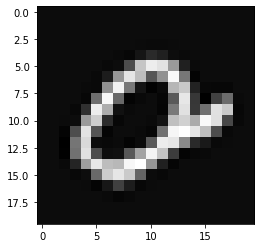

----------------------------------
Label: 	 [9]
Predição: [0]


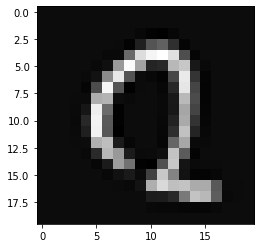

----------------------------------
Label: 	 [9]
Predição: [0]


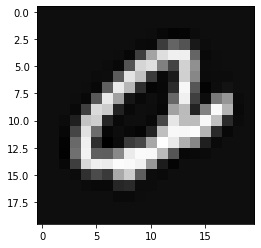

----------------------------------
Label: 	 [9]
Predição: [3]


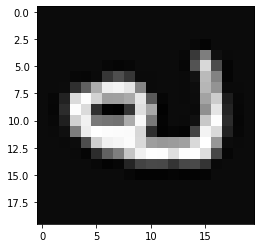

----------------------------------
Label: 	 [9]
Predição: [7]


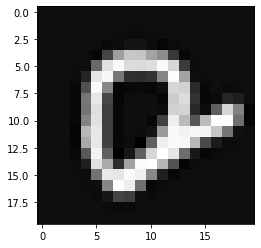

----------------------------------


In [52]:
missFeedback(X, Y, pred)

## Comparação com o caso de divisão dos dados em conjuntos de treino e teste

Nas questões da parte II, realizamos o treinamento de nosso modelo e o teste para avaliação com o mesmo conjunto de dados. Sabemos, porém, que é importante separar os conjuntos e, assim, agora realizamos as mesmas operações, mas dividindo os dados.

Realizaremos as seguintes etapas:

1. Divisão do conjunto de dados;
2. Estruturar dados para a aplicação do modelo;
3. Aplicar modelos no conjunto de treino;
4. Avaliação de desempenho;
5. Exibição dos erros.


### 1. Divisão do conjunto de dados

Primeiramente podemos embaralhar o DataFrame de forma a selecionar uma fatia de nossos dados de forma aleatória, na proporção de 80% para treinamento e 20% para teste:

In [53]:
data_joined = data_2.join(data_3)
data_random = data_joined.sample(frac=1)

m_train = int(m*0.8)
m_test = m - m_train

df_train = data_random.iloc[:m_train,:]
X_train, y_train = df_train.iloc[:,:-1].values, df_train.iloc[:,-1].values
X_train = np.append(np.ones([m_train,1]),X_train,axis=1)

df_test = data_random.iloc[:m_test,:]
X_test, y_test = df_test.iloc[:,:-1].values, df_test.iloc[:,-1].values
X_test = np.append(np.ones([m_test,1]),X_test,axis=1)

### 2. Estruturar dados para a aplicação do modelo

Agora precisamos novamente criar uma matriz Y compatível com os métodos:

In [54]:
aux = []

for i in range(m_train):
    aux.append(np.array([1 if y_train[i] == j else 0 for j in range(nbr_classes)]))

Y_train = np.array(aux).reshape(-1, nbr_classes)

In [55]:
aux = []

for i in range(m_test):
    aux.append(np.array([1 if y_test[i] == j else 0 for j in range(nbr_classes)]))

Y_test = np.array(aux).reshape(-1, nbr_classes)

### 3. Aplicar modelos no conjunto de treino

Agora treinamos ambos os modelos - sem e com regularização - com os dados de treino:

In [56]:
Theta = np.zeros([n+1,nbr_classes])
beta = 3

cost = costFunctionLogReg(X_train,Y_train,Theta)
cost_reg = costFunctionLogRegReg(X_train, Y_train, Theta, beta)
print(cost, cost_reg, sep='\n\n')

[0.69314718 0.69314718 0.69314718 0.69314718 0.69314718 0.69314718
 0.69314718 0.69314718 0.69314718 0.69314718]

[0.69314718 0.69314718 0.69314718 0.69314718 0.69314718 0.69314718
 0.69314718 0.69314718 0.69314718 0.69314718]


In [57]:
nbr_iter = 3000
alpha = 3
alpha_reg = 3
beta = 3

new_Theta, J_history = gradientDescentLogReg(X_train, Y_train, Theta, alpha, nbr_iter)
new_Theta_reg, J_history = gradientDescentLogRegReg(X_train, Y_train, Theta, alpha_reg, beta, nbr_iter)

In [58]:
cost = costFunctionLogReg(X_train,Y_train,new_Theta)
cost_reg = costFunctionLogRegReg(X_train, Y_train, new_Theta_reg, beta)
print(cost, cost_reg, sep='\n')

[9.00400848e-08 1.23881449e-02 4.72190178e-02 4.92818851e-02
 2.53911134e-02 4.99352270e-02 1.82488066e-02 3.13365349e-02
 7.38387290e-02 6.79055275e-02]
[0.00066387 0.03507617 0.07871136 0.07673467 0.06036739 0.09102734
 0.04500158 0.05857727 0.11604056 0.10554085]


### 4. Avaliação de desempenho

Por efeito de comparação, os modelos serão testados e avaliados quando aplicados nos diferentes conjuntos: treino e teste.

In [59]:
pred_train = predict(X_train, new_Theta)
pred_train_reg = predict(X_train, new_Theta_reg)
percentage = evaluatePrediction(Y_train, pred_train)
percentage_reg = evaluatePrediction(Y_train, pred_train_reg)

print(f'Taxa de acerto do modelo sem regularização nos dados de treino = {100*percentage:.2f}%')
print(f'Taxa de acerto do modelo com regularização nos dados de treino = {100*percentage_reg:.2f}%')

Taxa de acerto do modelo sem regularização nos dados de treino = 86.05%
Taxa de acerto do modelo com regularização nos dados de treino = 83.62%


In [60]:
pred_test = predict(X_test, new_Theta)
pred_test_reg = predict(X_test, new_Theta_reg)
percentage = evaluatePrediction(Y_test, pred_test)
percentage_reg = evaluatePrediction(Y_test, pred_test_reg)

print(f'Taxa de acerto do modelo sem regularização nos dados de teste = {100*percentage:.2f}%')
print(f'Taxa de acerto do modelo com regularização nos dados de teste = {100*percentage_reg:.2f}%')

Taxa de acerto do modelo sem regularização nos dados de teste = 86.30%
Taxa de acerto do modelo com regularização nos dados de teste = 83.40%


Como esperado, os desempenhos quando considerando a divisão de conjuntos é menor. Isso ocorre possivelmente, porém, devido a um menor overfit aos dados de treino e maior generalização, o que é algo que buscamos.

### 5. Exibição dos erros

E mais uma vez, podemos exibir os erros cometidos em cada caso de teste:

Label: 	 [0]
Predição: [2]


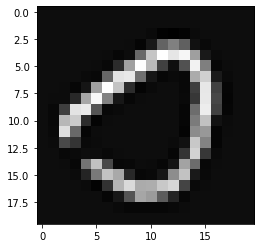

----------------------------------
Label: 	 [0]
Predição: [5]


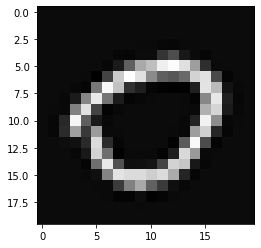

----------------------------------
Label: 	 [3]
Predição: [6]


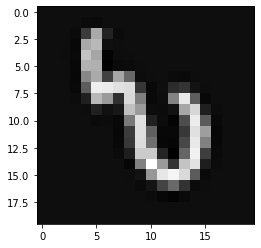

----------------------------------
Label: 	 [0]
Predição: [7]


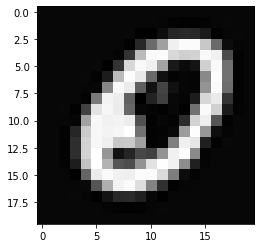

----------------------------------
Label: 	 [0]
Predição: [5]


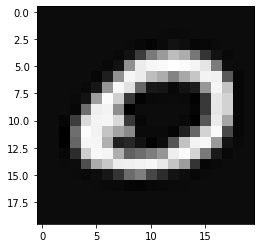

----------------------------------
Label: 	 [0]
Predição: [5]


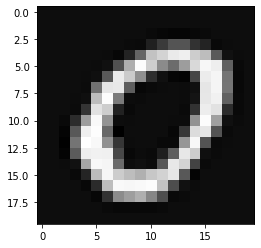

----------------------------------
Label: 	 [4]
Predição: [9]


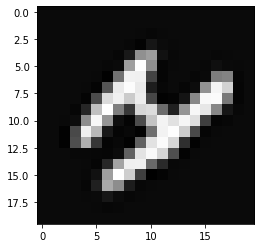

----------------------------------
Label: 	 [3]
Predição: [9]


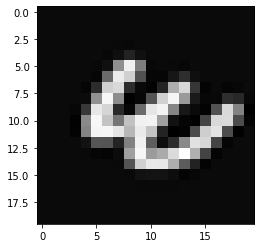

----------------------------------
Label: 	 [0]
Predição: [5]


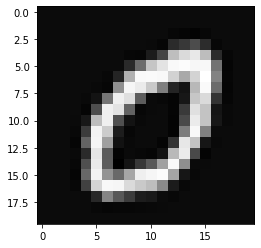

----------------------------------
Label: 	 [0]
Predição: [5]


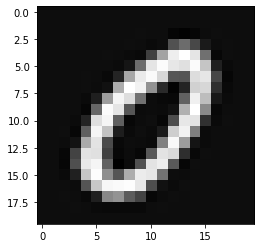

----------------------------------
Label: 	 [4]
Predição: [8]


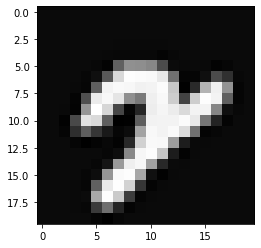

----------------------------------
Label: 	 [0]
Predição: [8]


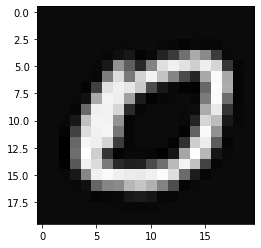

----------------------------------
Label: 	 [0]
Predição: [9]


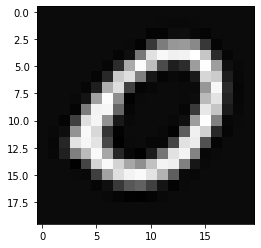

----------------------------------
Label: 	 [9]
Predição: [7]


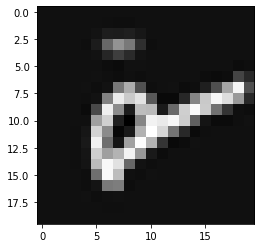

----------------------------------
Label: 	 [0]
Predição: [6]


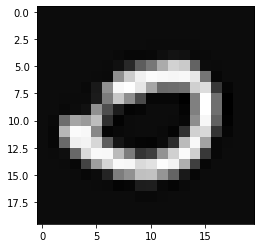

----------------------------------
Label: 	 [0]
Predição: [8]


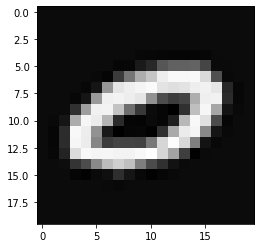

----------------------------------
Label: 	 [8]
Predição: [2]


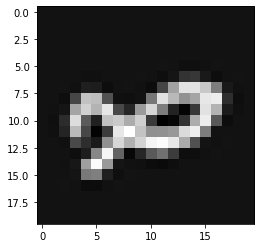

----------------------------------
Label: 	 [0]
Predição: [2]


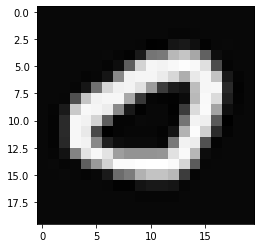

----------------------------------
Label: 	 [0]
Predição: [2]


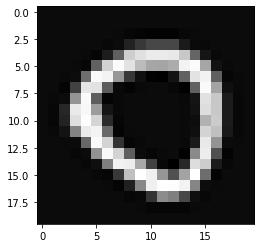

----------------------------------
Label: 	 [8]
Predição: [9]


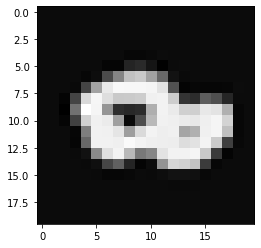

----------------------------------
Label: 	 [0]
Predição: [5]


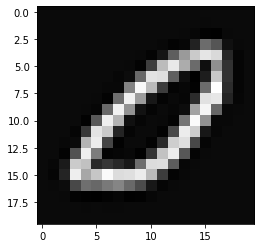

----------------------------------
Label: 	 [0]
Predição: [5]


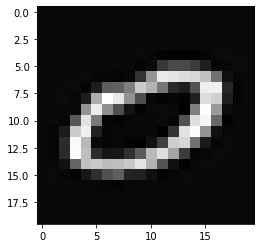

----------------------------------
Label: 	 [0]
Predição: [2]


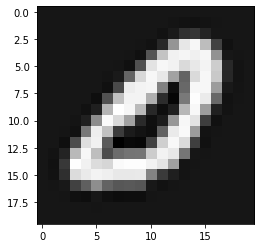

----------------------------------
Label: 	 [0]
Predição: [2]


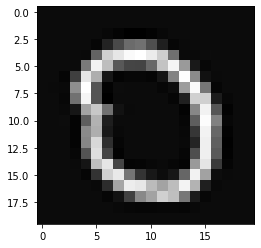

----------------------------------
Label: 	 [0]
Predição: [5]


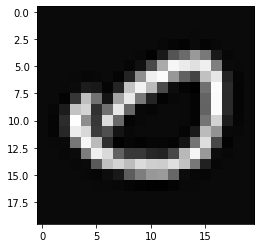

----------------------------------
Label: 	 [0]
Predição: [5]


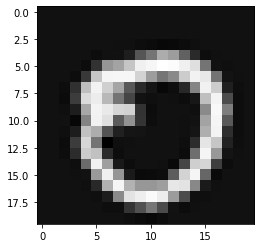

----------------------------------
Label: 	 [0]
Predição: [2]


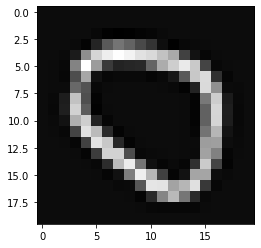

----------------------------------
Label: 	 [0]
Predição: [2]


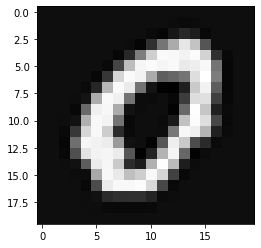

----------------------------------
Label: 	 [0]
Predição: [9]


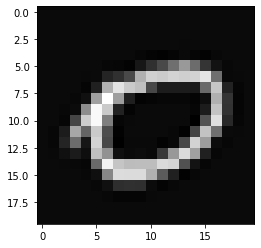

----------------------------------
Label: 	 [8]
Predição: [2]


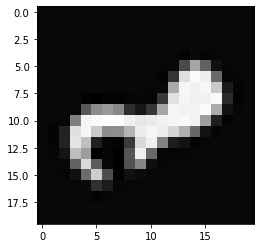

----------------------------------
Label: 	 [0]
Predição: [2]


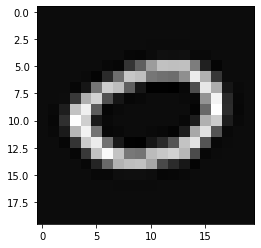

----------------------------------
Label: 	 [0]
Predição: [8]


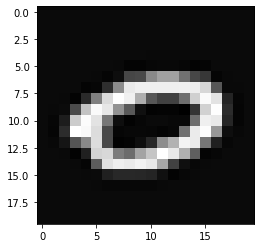

----------------------------------
Label: 	 [0]
Predição: [2]


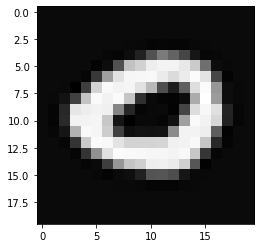

----------------------------------
Label: 	 [5]
Predição: [6]


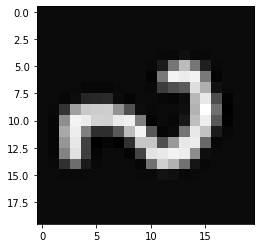

----------------------------------
Label: 	 [0]
Predição: [3]


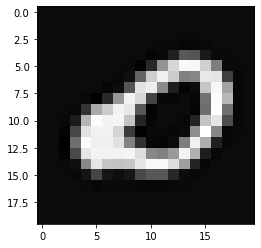

----------------------------------
Label: 	 [9]
Predição: [3]


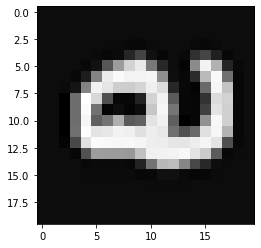

----------------------------------
Label: 	 [0]
Predição: [2]


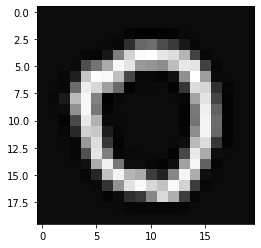

----------------------------------
Label: 	 [0]
Predição: [2]


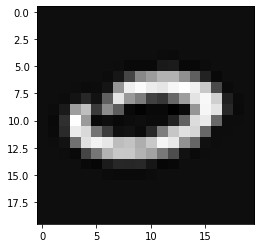

----------------------------------
Label: 	 [0]
Predição: [8]


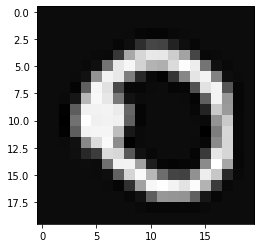

----------------------------------
Label: 	 [0]
Predição: [5]


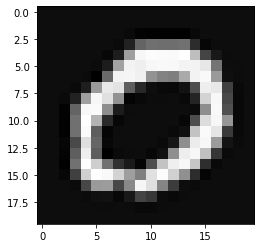

----------------------------------
Label: 	 [0]
Predição: [4]


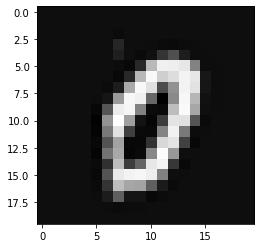

----------------------------------
Label: 	 [0]
Predição: [6]


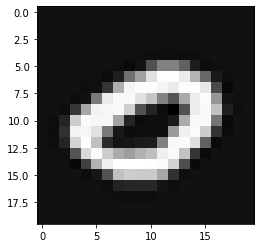

----------------------------------
Label: 	 [0]
Predição: [2]


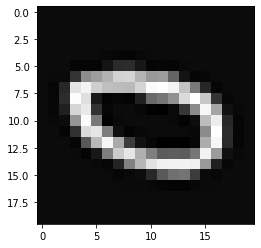

----------------------------------
Label: 	 [0]
Predição: [8]


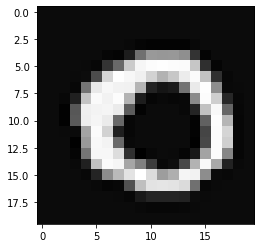

----------------------------------
Label: 	 [5]
Predição: [3]


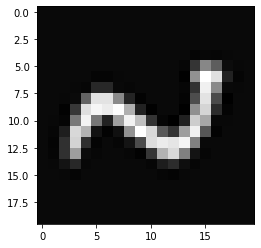

----------------------------------
Label: 	 [9]
Predição: [2]


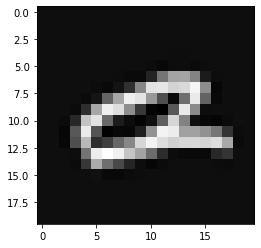

----------------------------------
Label: 	 [2]
Predição: [4]


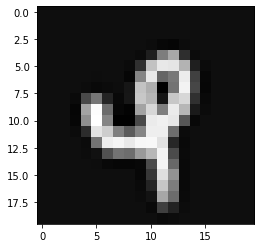

----------------------------------
Label: 	 [5]
Predição: [3]


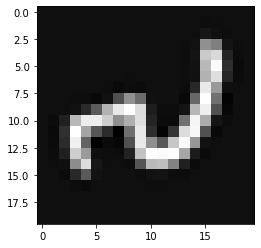

----------------------------------
Label: 	 [0]
Predição: [7]


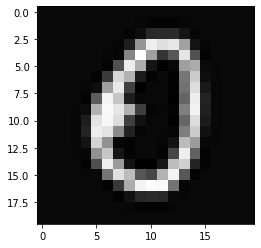

----------------------------------
Label: 	 [0]
Predição: [2]


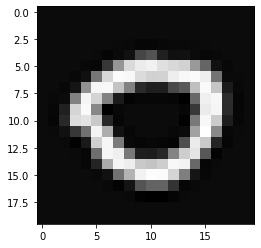

----------------------------------
Label: 	 [0]
Predição: [8]


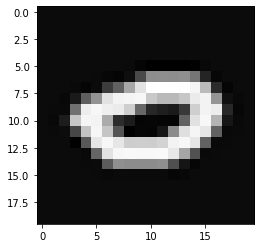

----------------------------------
Label: 	 [2]
Predição: [8]


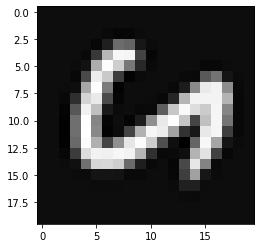

----------------------------------
Label: 	 [0]
Predição: [2]


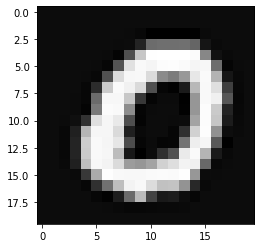

----------------------------------
Label: 	 [9]
Predição: [4]


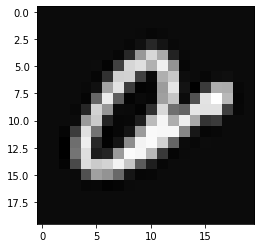

----------------------------------
Label: 	 [8]
Predição: [5]


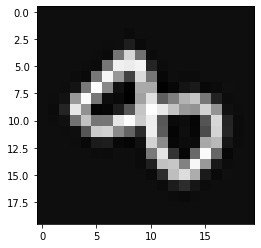

----------------------------------
Label: 	 [0]
Predição: [9]


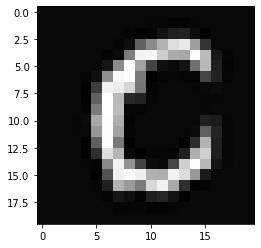

----------------------------------
Label: 	 [5]
Predição: [3]


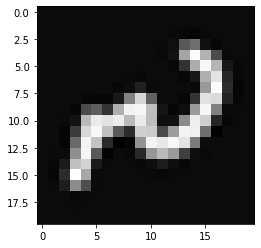

----------------------------------
Label: 	 [0]
Predição: [5]


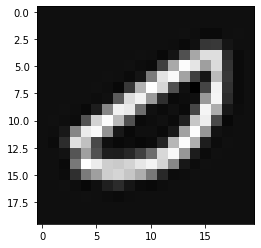

----------------------------------
Label: 	 [0]
Predição: [3]


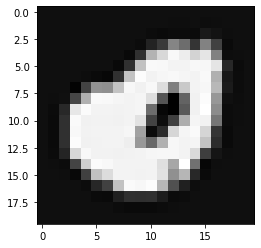

----------------------------------
Label: 	 [0]
Predição: [8]


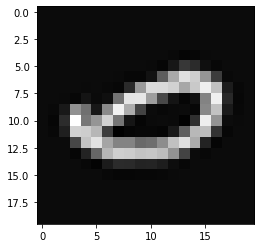

----------------------------------
Label: 	 [3]
Predição: [7]


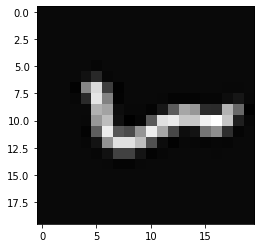

----------------------------------
Label: 	 [0]
Predição: [5]


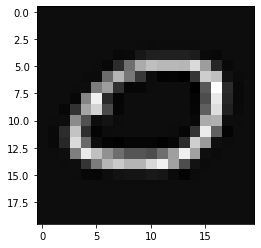

----------------------------------
Label: 	 [9]
Predição: [3]


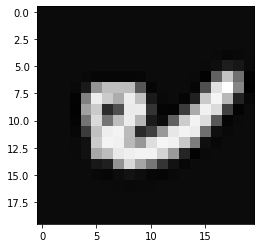

----------------------------------
Label: 	 [0]
Predição: [2]


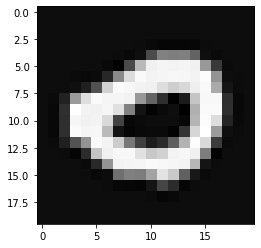

----------------------------------
Label: 	 [1]
Predição: [8]


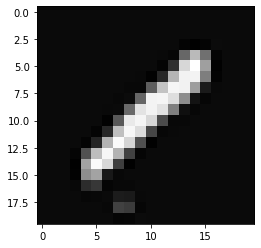

----------------------------------
Label: 	 [0]
Predição: [3]


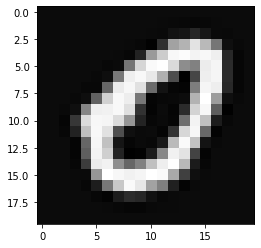

----------------------------------
Label: 	 [0]
Predição: [5]


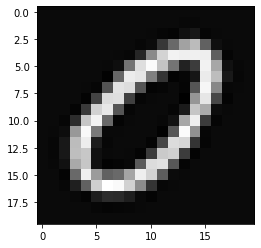

----------------------------------
Label: 	 [0]
Predição: [2]


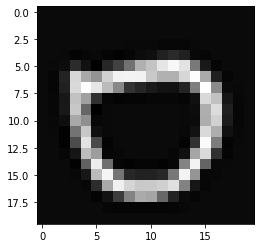

----------------------------------
Label: 	 [0]
Predição: [2]


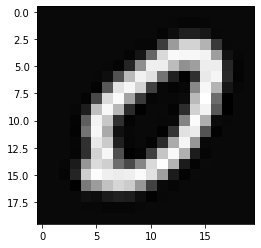

----------------------------------
Label: 	 [0]
Predição: [8]


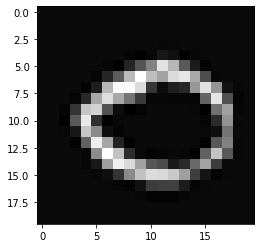

----------------------------------
Label: 	 [0]
Predição: [5]


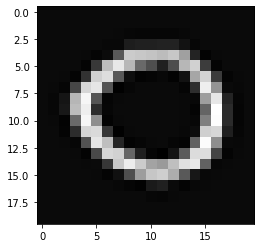

----------------------------------
Label: 	 [0]
Predição: [8]


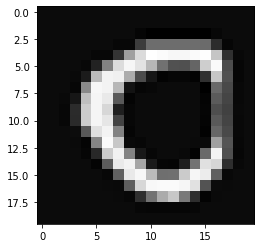

----------------------------------
Label: 	 [0]
Predição: [3]


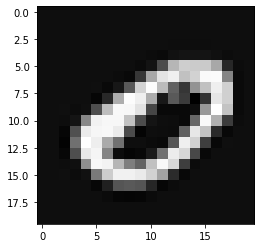

----------------------------------
Label: 	 [0]
Predição: [2]


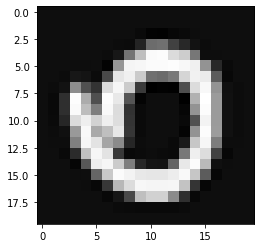

----------------------------------
Label: 	 [0]
Predição: [5]


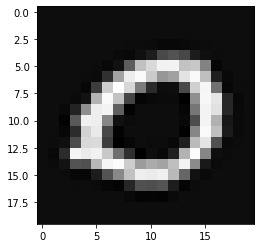

----------------------------------
Label: 	 [7]
Predição: [9]


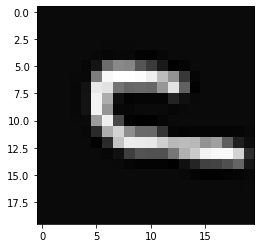

----------------------------------
Label: 	 [0]
Predição: [8]


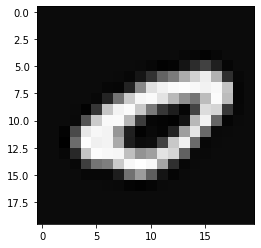

----------------------------------
Label: 	 [9]
Predição: [6]


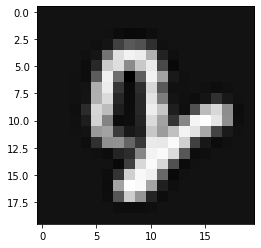

----------------------------------
Label: 	 [0]
Predição: [5]


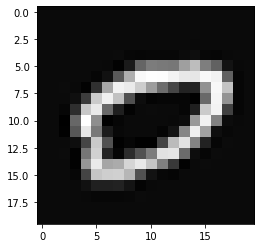

----------------------------------
Label: 	 [0]
Predição: [9]


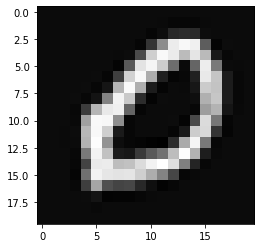

----------------------------------
Label: 	 [9]
Predição: [7]


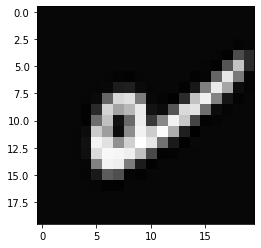

----------------------------------
Label: 	 [0]
Predição: [2]


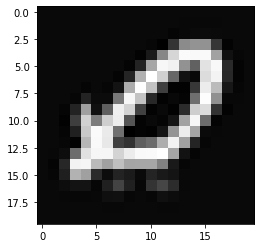

----------------------------------
Label: 	 [0]
Predição: [5]


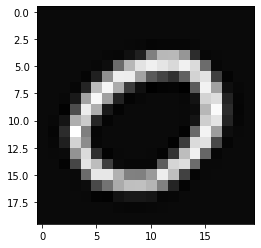

----------------------------------
Label: 	 [0]
Predição: [5]


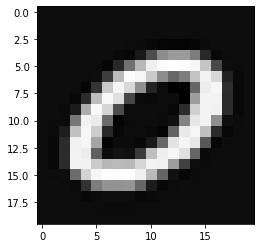

----------------------------------
Label: 	 [7]
Predição: [9]


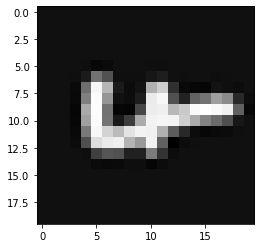

----------------------------------
Label: 	 [0]
Predição: [2]


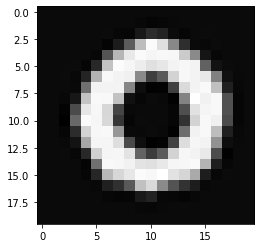

----------------------------------
Label: 	 [0]
Predição: [5]


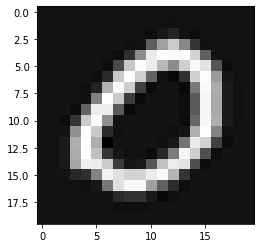

----------------------------------
Label: 	 [0]
Predição: [7]


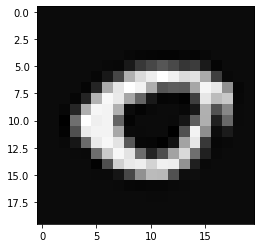

----------------------------------
Label: 	 [0]
Predição: [8]


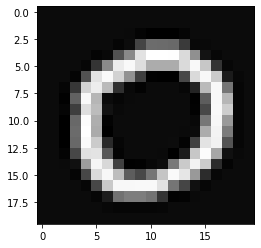

----------------------------------
Label: 	 [6]
Predição: [5]


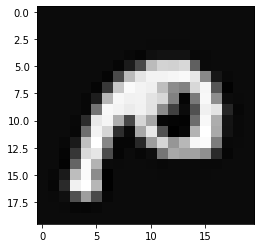

----------------------------------
Label: 	 [3]
Predição: [5]


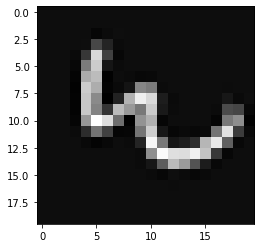

----------------------------------
Label: 	 [0]
Predição: [8]


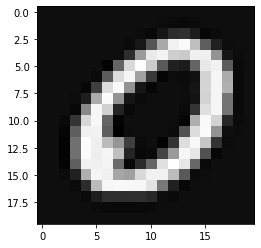

----------------------------------
Label: 	 [0]
Predição: [5]


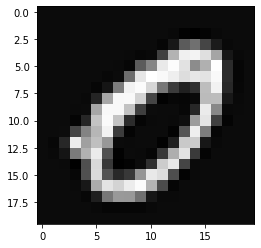

----------------------------------
Label: 	 [0]
Predição: [2]


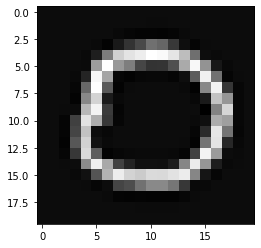

----------------------------------
Label: 	 [8]
Predição: [6]


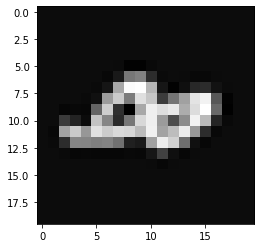

----------------------------------
Label: 	 [0]
Predição: [5]


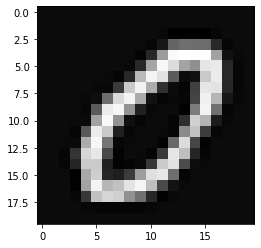

----------------------------------
Label: 	 [0]
Predição: [8]


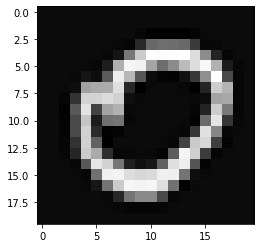

----------------------------------
Label: 	 [2]
Predição: [4]


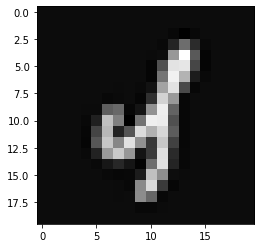

----------------------------------
Label: 	 [0]
Predição: [6]


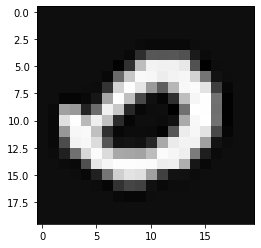

----------------------------------
Label: 	 [0]
Predição: [6]


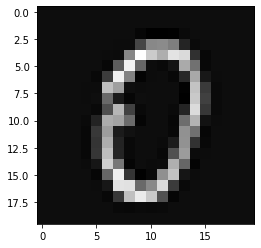

----------------------------------
Label: 	 [0]
Predição: [6]


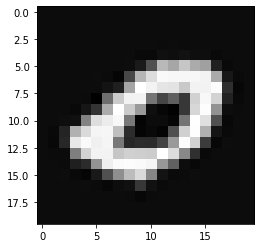

----------------------------------
Label: 	 [9]
Predição: [3]


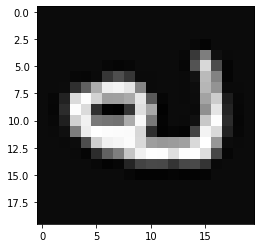

----------------------------------
Label: 	 [0]
Predição: [2]


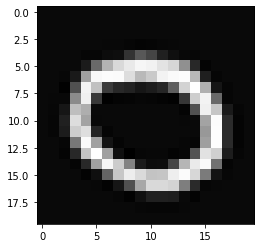

----------------------------------
Label: 	 [0]
Predição: [5]


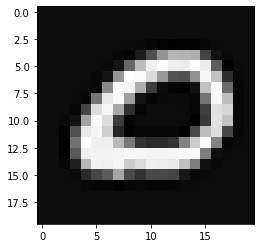

----------------------------------
Label: 	 [0]
Predição: [5]


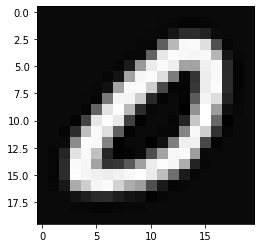

----------------------------------
Label: 	 [9]
Predição: [8]


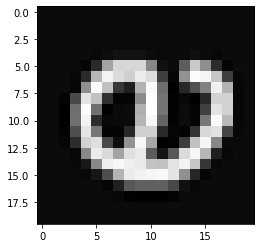

----------------------------------
Label: 	 [9]
Predição: [1]


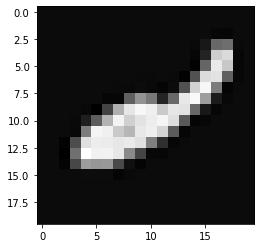

----------------------------------
Label: 	 [0]
Predição: [5]


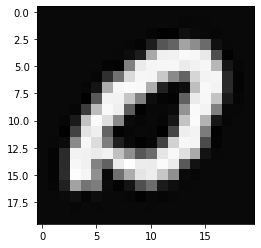

----------------------------------
Label: 	 [8]
Predição: [1]


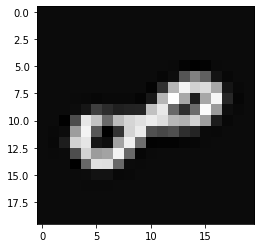

----------------------------------
Label: 	 [0]
Predição: [5]


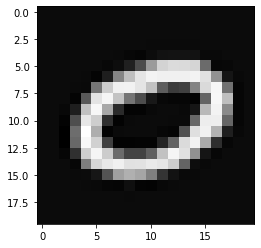

----------------------------------
Label: 	 [0]
Predição: [8]


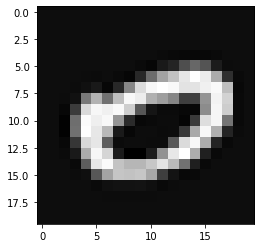

----------------------------------
Label: 	 [2]
Predição: [8]


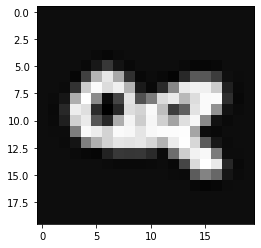

----------------------------------
Label: 	 [0]
Predição: [5]


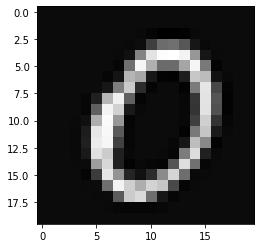

----------------------------------
Label: 	 [0]
Predição: [6]


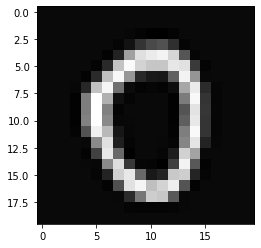

----------------------------------
Label: 	 [3]
Predição: [5]


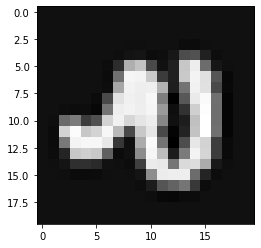

----------------------------------
Label: 	 [0]
Predição: [2]


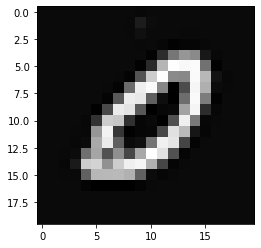

----------------------------------
Label: 	 [5]
Predição: [4]


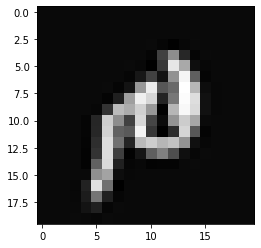

----------------------------------
Label: 	 [0]
Predição: [9]


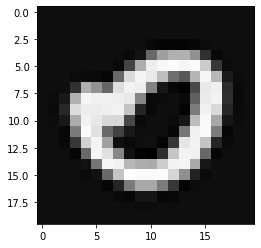

----------------------------------
Label: 	 [0]
Predição: [6]


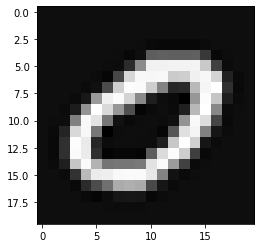

----------------------------------
Label: 	 [0]
Predição: [5]


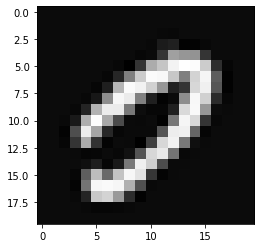

----------------------------------
Label: 	 [0]
Predição: [5]


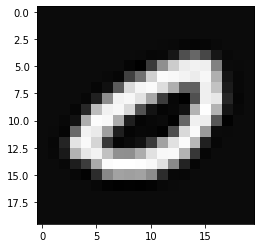

----------------------------------
Label: 	 [0]
Predição: [5]


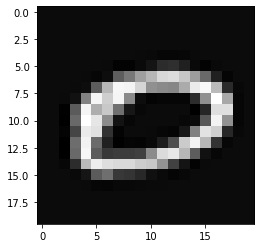

----------------------------------
Label: 	 [0]
Predição: [5]


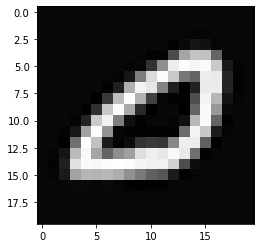

----------------------------------
Label: 	 [0]
Predição: [2]


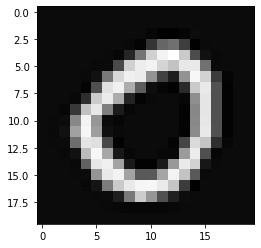

----------------------------------
Label: 	 [0]
Predição: [2]


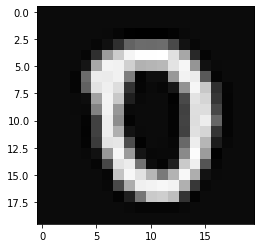

----------------------------------
Label: 	 [0]
Predição: [7]


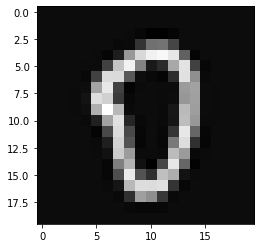

----------------------------------
Label: 	 [0]
Predição: [2]


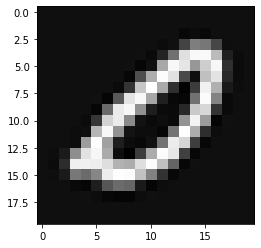

----------------------------------
Label: 	 [0]
Predição: [6]


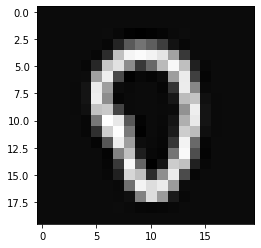

----------------------------------
Label: 	 [0]
Predição: [5]


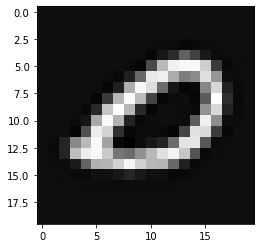

----------------------------------
Label: 	 [0]
Predição: [3]


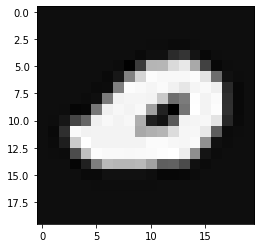

----------------------------------
Label: 	 [5]
Predição: [9]


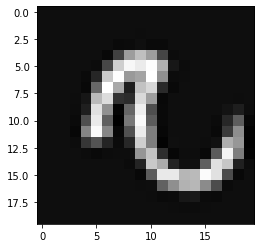

----------------------------------
Label: 	 [0]
Predição: [6]


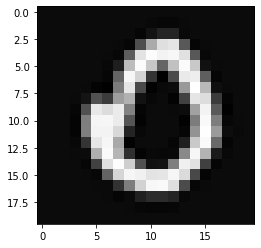

----------------------------------
Label: 	 [5]
Predição: [6]


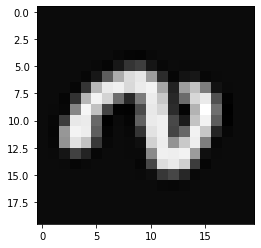

----------------------------------
Label: 	 [0]
Predição: [2]


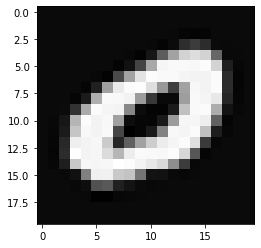

----------------------------------
Label: 	 [0]
Predição: [5]


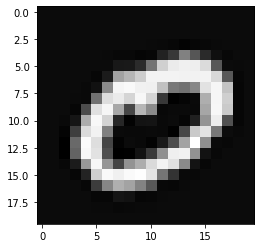

----------------------------------
Label: 	 [9]
Predição: [5]


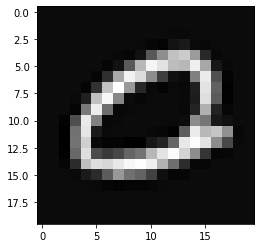

----------------------------------
Label: 	 [0]
Predição: [5]


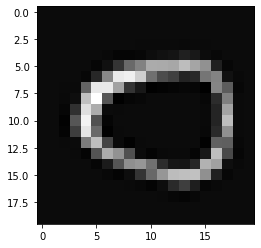

----------------------------------


In [61]:
missFeedback(X_test, Y_test, pred_test)

Label: 	 [0]
Predição: [5]


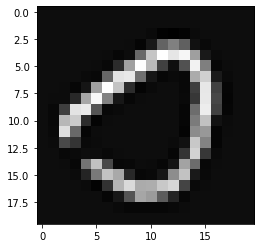

----------------------------------
Label: 	 [0]
Predição: [5]


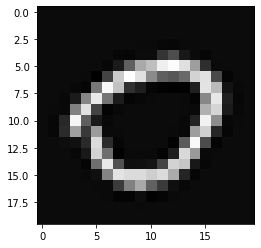

----------------------------------
Label: 	 [3]
Predição: [6]


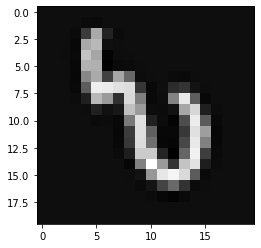

----------------------------------
Label: 	 [8]
Predição: [5]


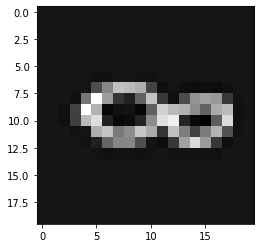

----------------------------------
Label: 	 [0]
Predição: [7]


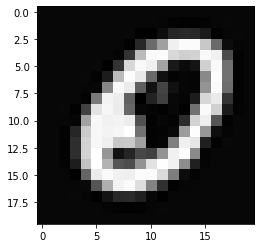

----------------------------------
Label: 	 [0]
Predição: [5]


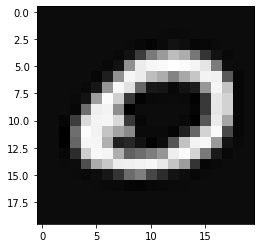

----------------------------------
Label: 	 [0]
Predição: [5]


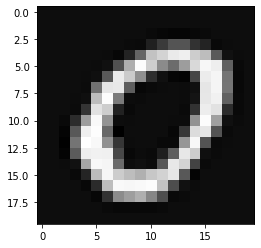

----------------------------------
Label: 	 [4]
Predição: [9]


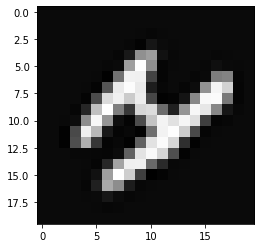

----------------------------------
Label: 	 [3]
Predição: [9]


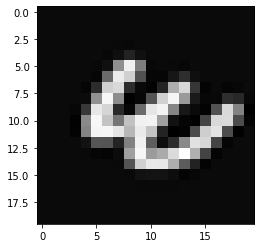

----------------------------------
Label: 	 [0]
Predição: [5]


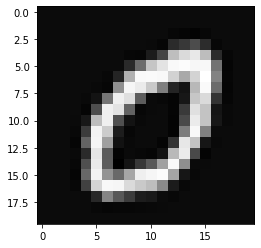

----------------------------------
Label: 	 [0]
Predição: [5]


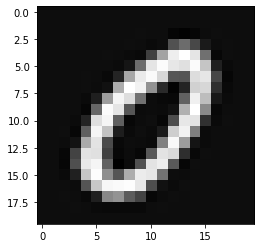

----------------------------------
Label: 	 [0]
Predição: [5]


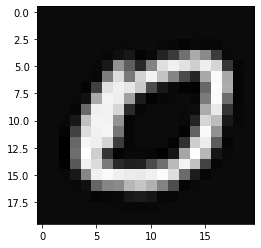

----------------------------------
Label: 	 [8]
Predição: [5]


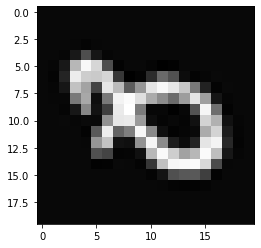

----------------------------------
Label: 	 [0]
Predição: [3]


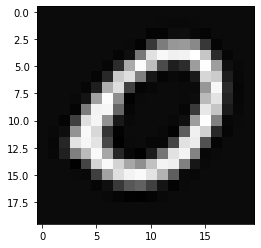

----------------------------------
Label: 	 [9]
Predição: [7]


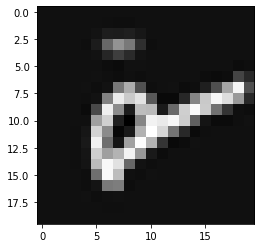

----------------------------------
Label: 	 [0]
Predição: [6]


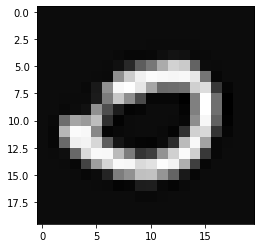

----------------------------------
Label: 	 [9]
Predição: [4]


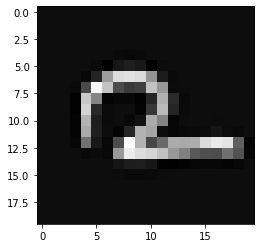

----------------------------------
Label: 	 [0]
Predição: [5]


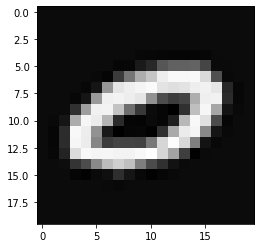

----------------------------------
Label: 	 [8]
Predição: [2]


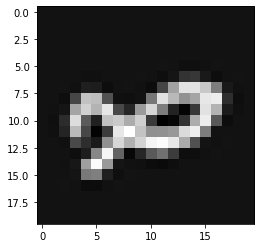

----------------------------------
Label: 	 [0]
Predição: [2]


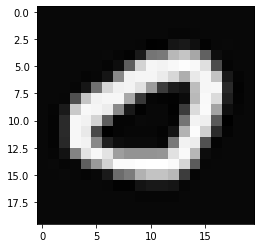

----------------------------------
Label: 	 [0]
Predição: [2]


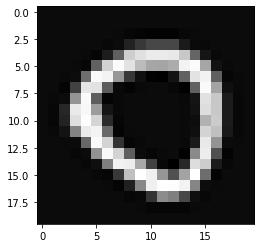

----------------------------------
Label: 	 [9]
Predição: [7]


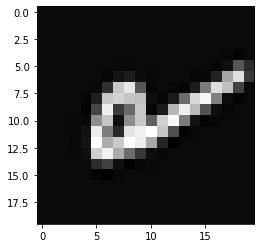

----------------------------------
Label: 	 [2]
Predição: [1]


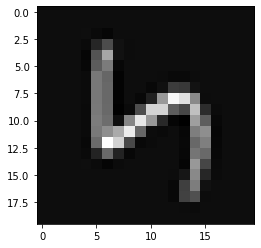

----------------------------------
Label: 	 [8]
Predição: [9]


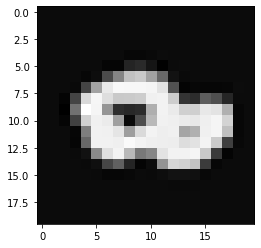

----------------------------------
Label: 	 [0]
Predição: [5]


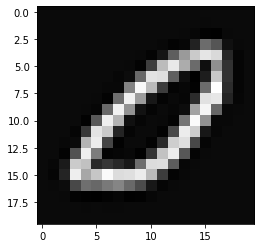

----------------------------------
Label: 	 [8]
Predição: [6]


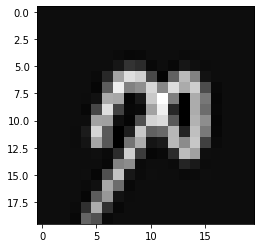

----------------------------------
Label: 	 [0]
Predição: [5]


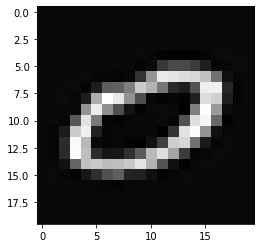

----------------------------------
Label: 	 [0]
Predição: [5]


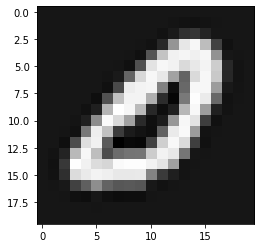

----------------------------------
Label: 	 [7]
Predição: [2]


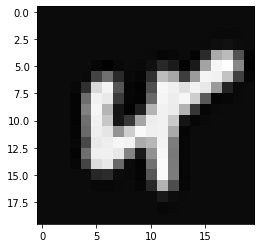

----------------------------------
Label: 	 [0]
Predição: [2]


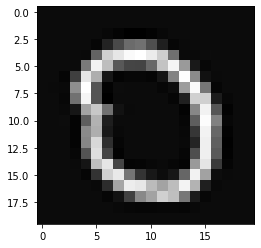

----------------------------------
Label: 	 [0]
Predição: [5]


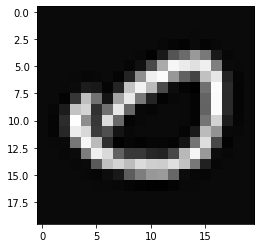

----------------------------------
Label: 	 [0]
Predição: [5]


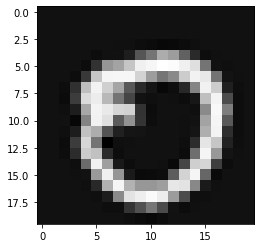

----------------------------------
Label: 	 [0]
Predição: [2]


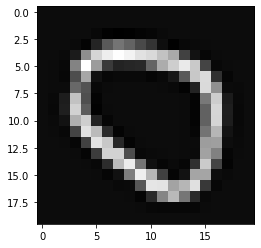

----------------------------------
Label: 	 [0]
Predição: [7]


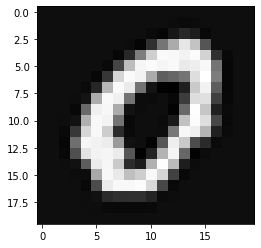

----------------------------------
Label: 	 [0]
Predição: [5]


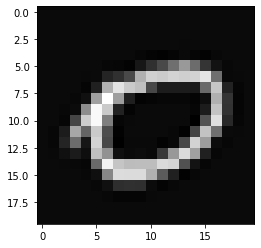

----------------------------------
Label: 	 [8]
Predição: [2]


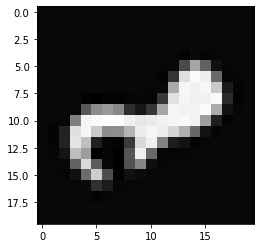

----------------------------------
Label: 	 [0]
Predição: [2]


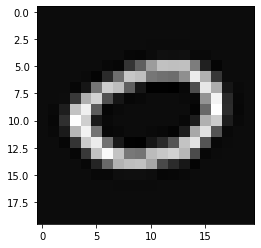

----------------------------------
Label: 	 [4]
Predição: [6]


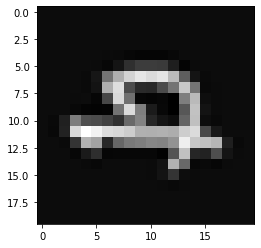

----------------------------------
Label: 	 [0]
Predição: [5]


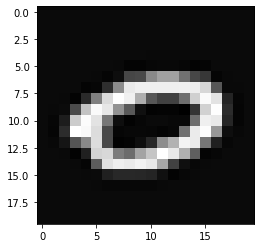

----------------------------------
Label: 	 [0]
Predição: [2]


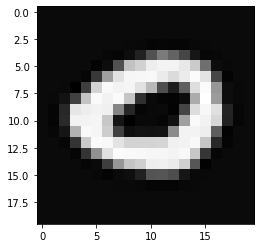

----------------------------------
Label: 	 [5]
Predição: [6]


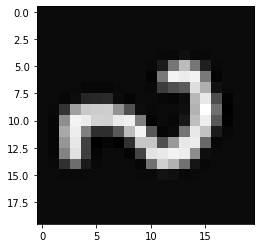

----------------------------------
Label: 	 [0]
Predição: [3]


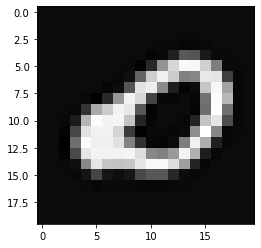

----------------------------------
Label: 	 [9]
Predição: [3]


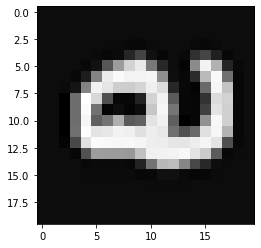

----------------------------------
Label: 	 [0]
Predição: [2]


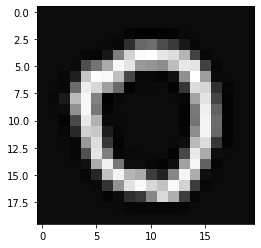

----------------------------------
Label: 	 [0]
Predição: [6]


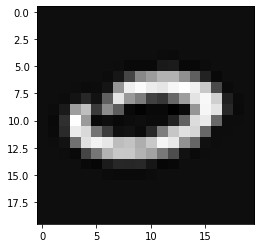

----------------------------------
Label: 	 [0]
Predição: [8]


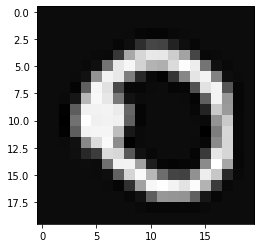

----------------------------------
Label: 	 [0]
Predição: [5]


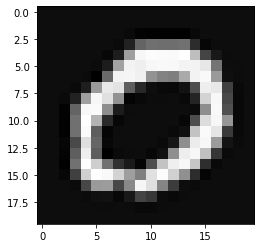

----------------------------------
Label: 	 [0]
Predição: [4]


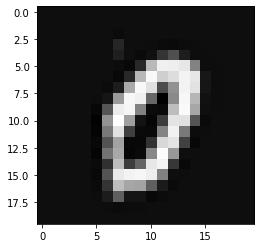

----------------------------------
Label: 	 [0]
Predição: [6]


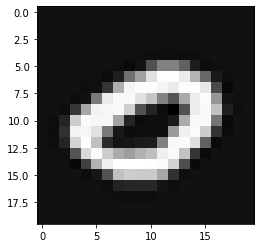

----------------------------------
Label: 	 [0]
Predição: [2]


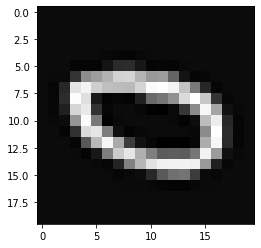

----------------------------------
Label: 	 [0]
Predição: [8]


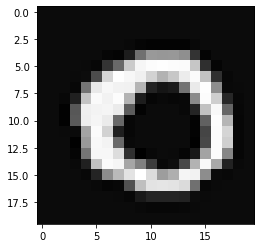

----------------------------------
Label: 	 [5]
Predição: [3]


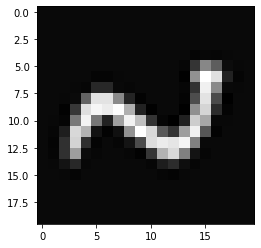

----------------------------------
Label: 	 [9]
Predição: [2]


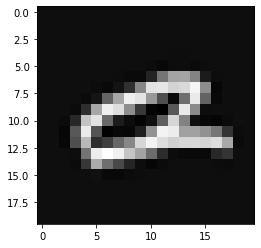

----------------------------------
Label: 	 [2]
Predição: [4]


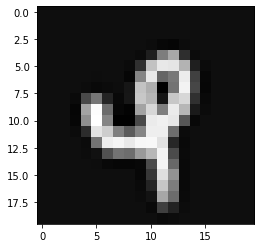

----------------------------------
Label: 	 [5]
Predição: [2]


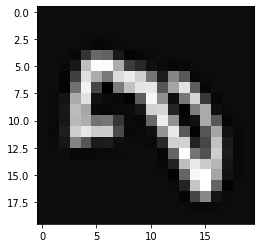

----------------------------------
Label: 	 [5]
Predição: [3]


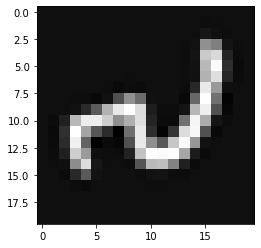

----------------------------------
Label: 	 [0]
Predição: [7]


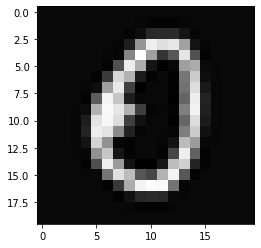

----------------------------------
Label: 	 [0]
Predição: [2]


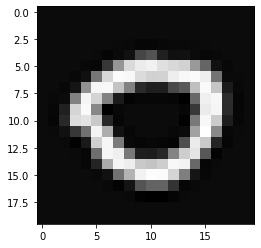

----------------------------------
Label: 	 [0]
Predição: [6]


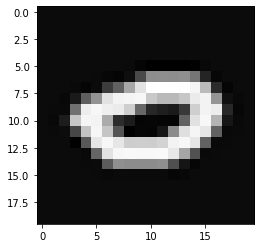

----------------------------------
Label: 	 [2]
Predição: [7]


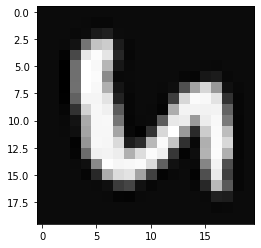

----------------------------------
Label: 	 [5]
Predição: [6]


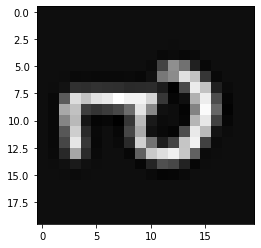

----------------------------------
Label: 	 [8]
Predição: [3]


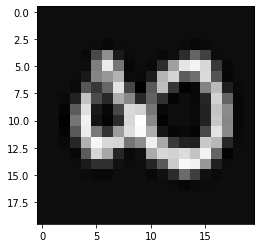

----------------------------------
Label: 	 [8]
Predição: [6]


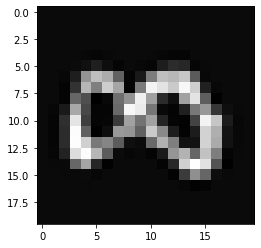

----------------------------------
Label: 	 [8]
Predição: [3]


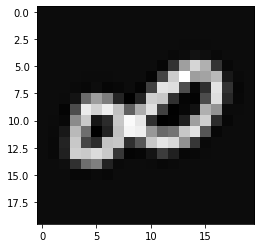

----------------------------------
Label: 	 [0]
Predição: [7]


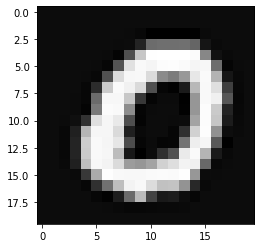

----------------------------------
Label: 	 [9]
Predição: [4]


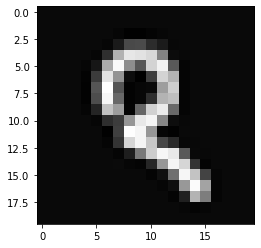

----------------------------------
Label: 	 [9]
Predição: [4]


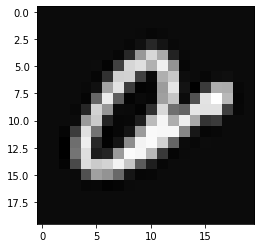

----------------------------------
Label: 	 [8]
Predição: [5]


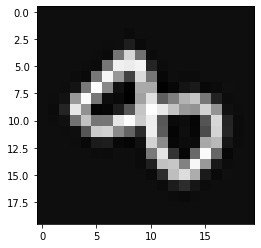

----------------------------------
Label: 	 [0]
Predição: [7]


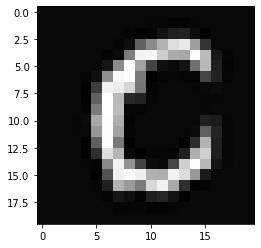

----------------------------------
Label: 	 [5]
Predição: [3]


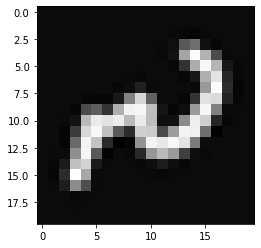

----------------------------------
Label: 	 [0]
Predição: [5]


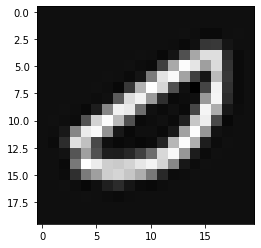

----------------------------------
Label: 	 [0]
Predição: [3]


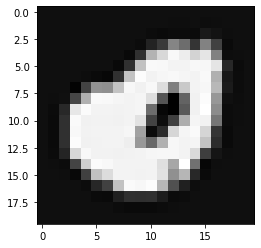

----------------------------------
Label: 	 [0]
Predição: [5]


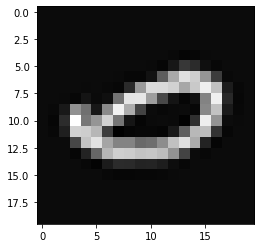

----------------------------------
Label: 	 [3]
Predição: [7]


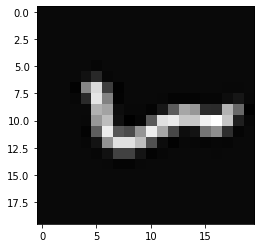

----------------------------------
Label: 	 [0]
Predição: [5]


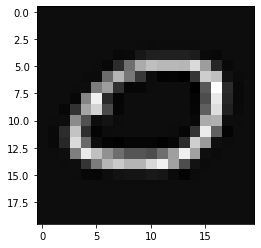

----------------------------------
Label: 	 [9]
Predição: [7]


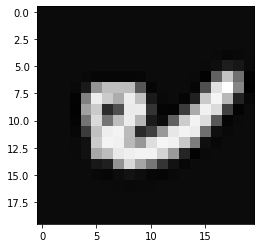

----------------------------------
Label: 	 [0]
Predição: [2]


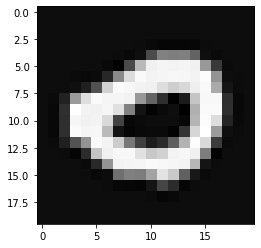

----------------------------------
Label: 	 [1]
Predição: [8]


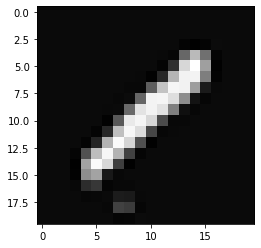

----------------------------------
Label: 	 [0]
Predição: [3]


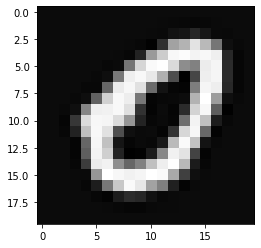

----------------------------------
Label: 	 [0]
Predição: [5]


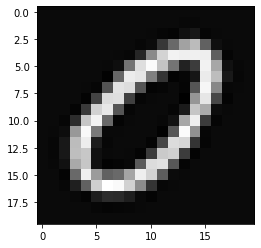

----------------------------------
Label: 	 [0]
Predição: [2]


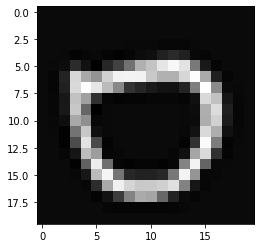

----------------------------------
Label: 	 [0]
Predição: [5]


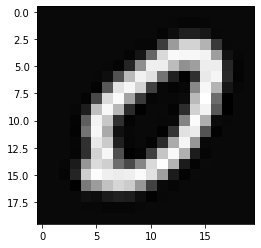

----------------------------------
Label: 	 [0]
Predição: [9]


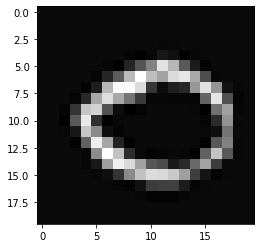

----------------------------------
Label: 	 [0]
Predição: [3]


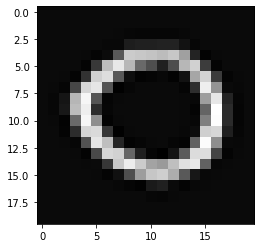

----------------------------------
Label: 	 [3]
Predição: [5]


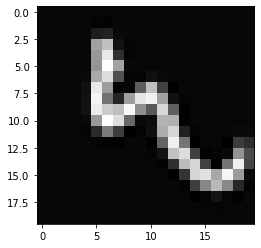

----------------------------------
Label: 	 [7]
Predição: [4]


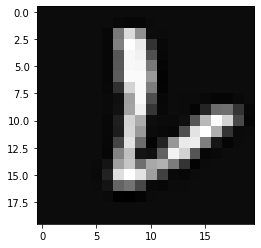

----------------------------------
Label: 	 [0]
Predição: [7]


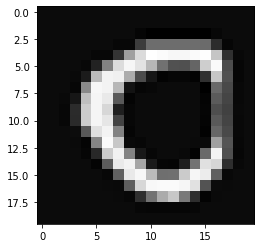

----------------------------------
Label: 	 [8]
Predição: [1]


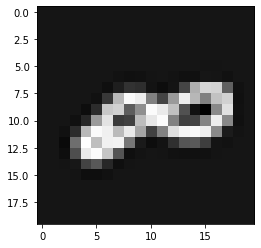

----------------------------------
Label: 	 [0]
Predição: [3]


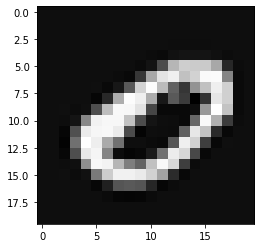

----------------------------------
Label: 	 [7]
Predição: [9]


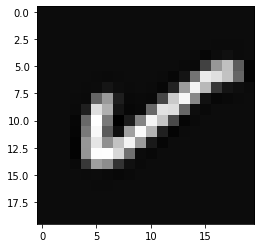

----------------------------------
Label: 	 [0]
Predição: [2]


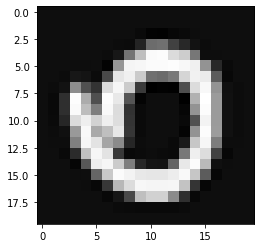

----------------------------------
Label: 	 [0]
Predição: [5]


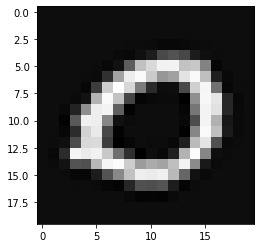

----------------------------------
Label: 	 [7]
Predição: [9]


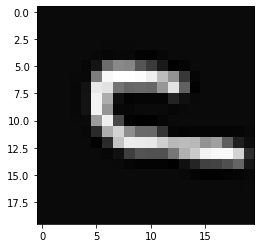

----------------------------------
Label: 	 [2]
Predição: [8]


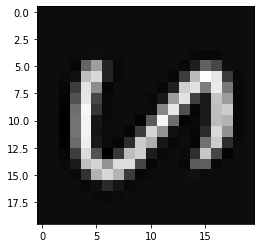

----------------------------------
Label: 	 [0]
Predição: [3]


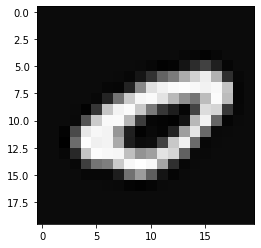

----------------------------------
Label: 	 [9]
Predição: [6]


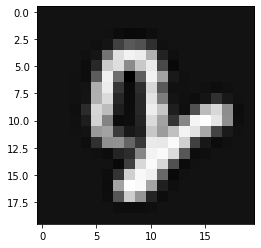

----------------------------------
Label: 	 [0]
Predição: [5]


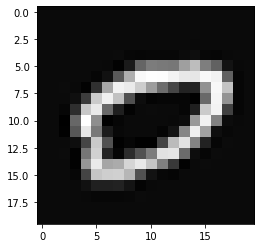

----------------------------------
Label: 	 [4]
Predição: [2]


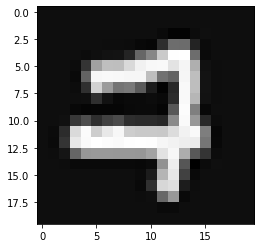

----------------------------------
Label: 	 [0]
Predição: [5]


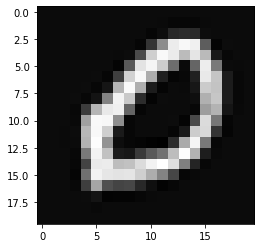

----------------------------------
Label: 	 [9]
Predição: [7]


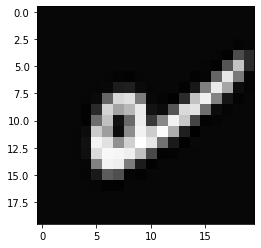

----------------------------------
Label: 	 [0]
Predição: [3]


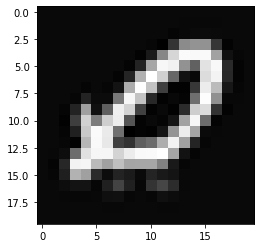

----------------------------------
Label: 	 [0]
Predição: [5]


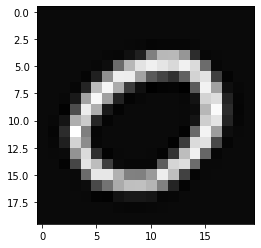

----------------------------------
Label: 	 [0]
Predição: [5]


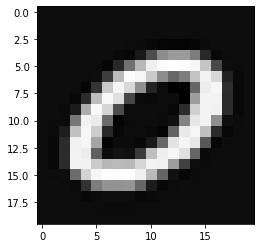

----------------------------------
Label: 	 [7]
Predição: [9]


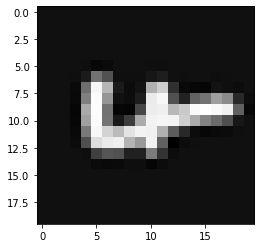

----------------------------------
Label: 	 [0]
Predição: [2]


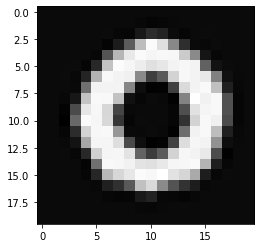

----------------------------------
Label: 	 [6]
Predição: [2]


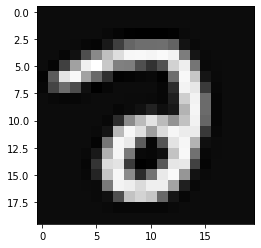

----------------------------------
Label: 	 [8]
Predição: [3]


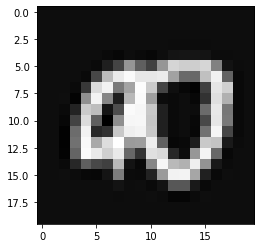

----------------------------------
Label: 	 [8]
Predição: [6]


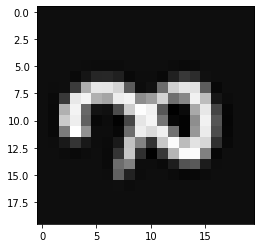

----------------------------------
Label: 	 [0]
Predição: [5]


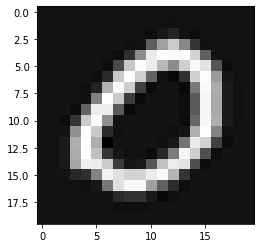

----------------------------------
Label: 	 [0]
Predição: [7]


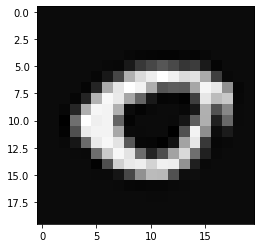

----------------------------------
Label: 	 [8]
Predição: [5]


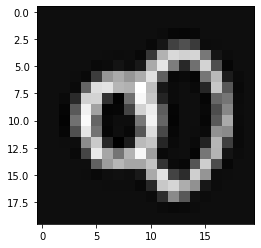

----------------------------------
Label: 	 [0]
Predição: [5]


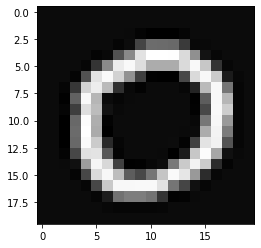

----------------------------------
Label: 	 [4]
Predição: [9]


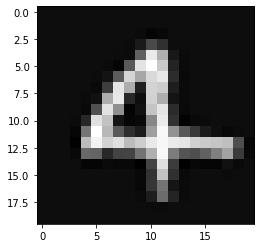

----------------------------------
Label: 	 [5]
Predição: [4]


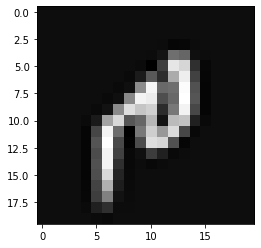

----------------------------------
Label: 	 [6]
Predição: [5]


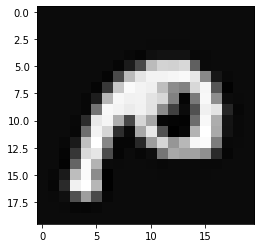

----------------------------------
Label: 	 [0]
Predição: [3]


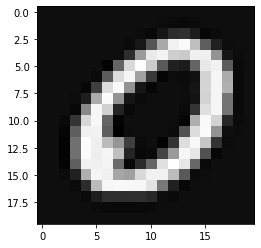

----------------------------------
Label: 	 [0]
Predição: [5]


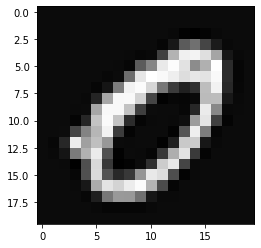

----------------------------------
Label: 	 [0]
Predição: [5]


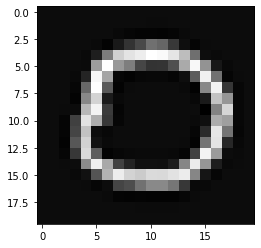

----------------------------------
Label: 	 [8]
Predição: [6]


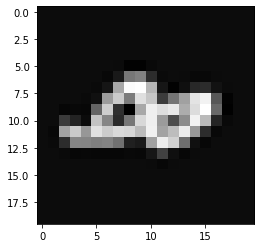

----------------------------------
Label: 	 [0]
Predição: [5]


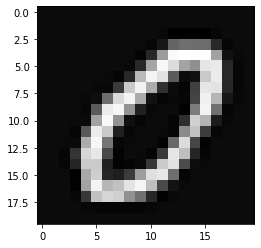

----------------------------------
Label: 	 [0]
Predição: [5]


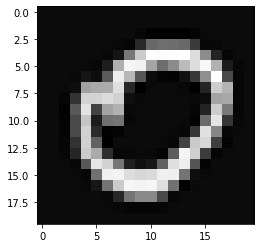

----------------------------------
Label: 	 [2]
Predição: [4]


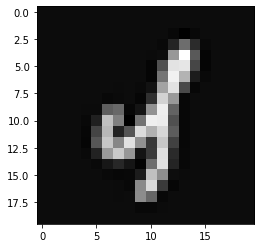

----------------------------------
Label: 	 [0]
Predição: [6]


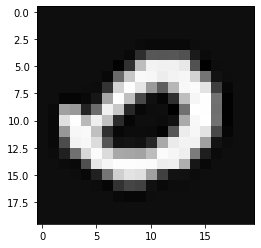

----------------------------------
Label: 	 [0]
Predição: [7]


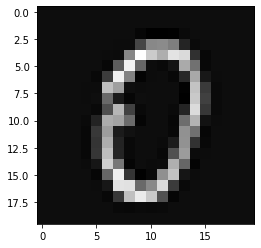

----------------------------------
Label: 	 [0]
Predição: [6]


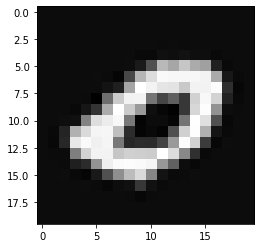

----------------------------------
Label: 	 [9]
Predição: [3]


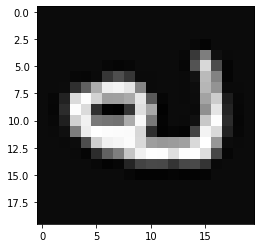

----------------------------------
Label: 	 [0]
Predição: [2]


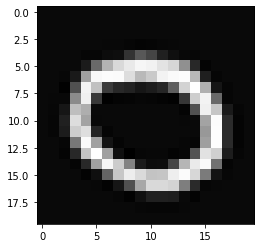

----------------------------------
Label: 	 [0]
Predição: [5]


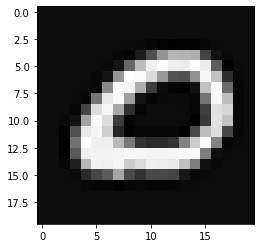

----------------------------------
Label: 	 [0]
Predição: [5]


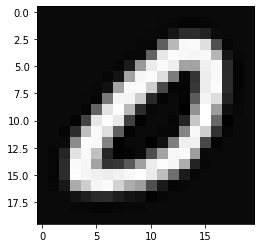

----------------------------------
Label: 	 [9]
Predição: [8]


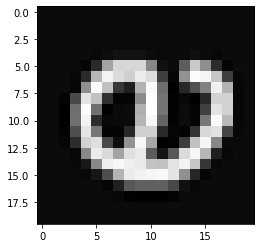

----------------------------------
Label: 	 [9]
Predição: [1]


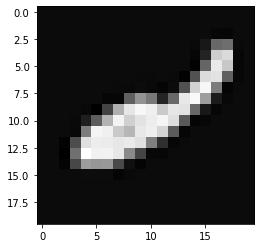

----------------------------------
Label: 	 [2]
Predição: [3]


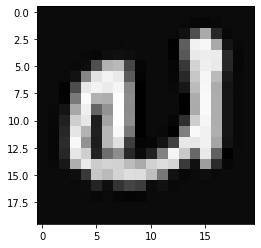

----------------------------------
Label: 	 [0]
Predição: [5]


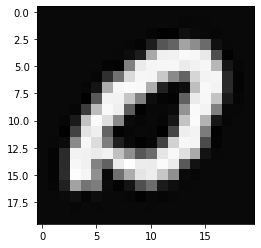

----------------------------------
Label: 	 [8]
Predição: [1]


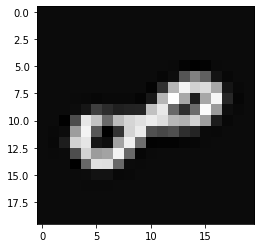

----------------------------------
Label: 	 [0]
Predição: [5]


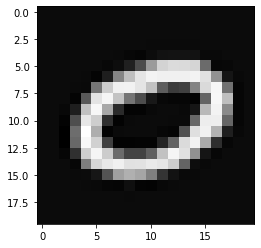

----------------------------------
Label: 	 [0]
Predição: [5]


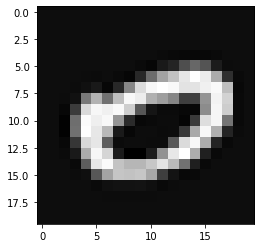

----------------------------------
Label: 	 [2]
Predição: [8]


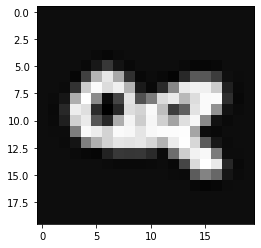

----------------------------------
Label: 	 [0]
Predição: [5]


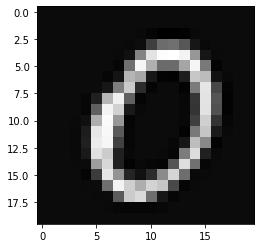

----------------------------------
Label: 	 [0]
Predição: [6]


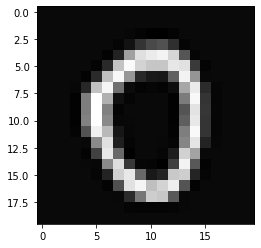

----------------------------------
Label: 	 [3]
Predição: [5]


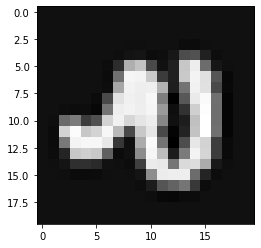

----------------------------------
Label: 	 [0]
Predição: [2]


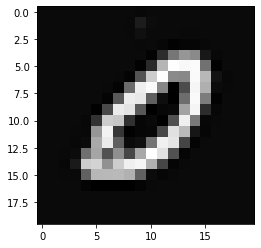

----------------------------------
Label: 	 [4]
Predição: [9]


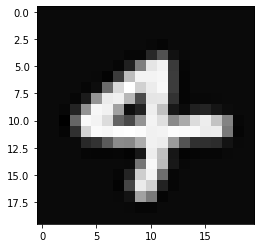

----------------------------------
Label: 	 [5]
Predição: [4]


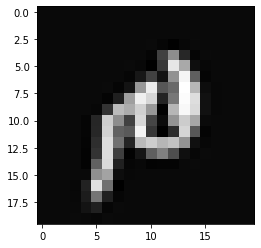

----------------------------------
Label: 	 [3]
Predição: [1]


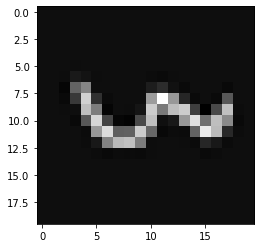

----------------------------------
Label: 	 [0]
Predição: [3]


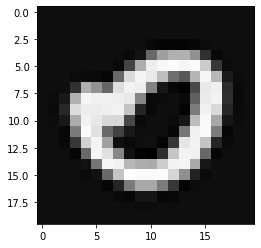

----------------------------------
Label: 	 [0]
Predição: [6]


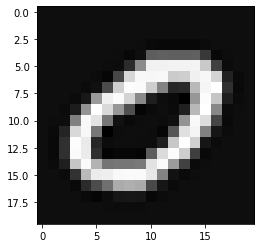

----------------------------------
Label: 	 [0]
Predição: [5]


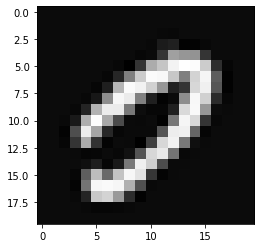

----------------------------------
Label: 	 [0]
Predição: [5]


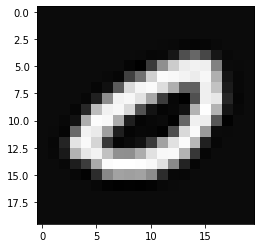

----------------------------------
Label: 	 [0]
Predição: [5]


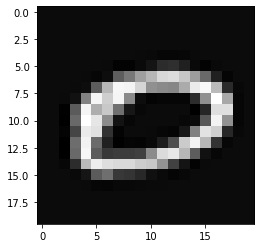

----------------------------------
Label: 	 [0]
Predição: [5]


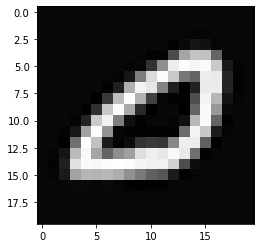

----------------------------------
Label: 	 [0]
Predição: [2]


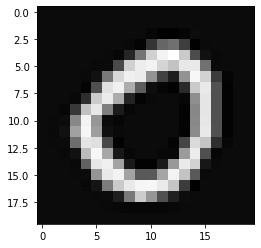

----------------------------------
Label: 	 [0]
Predição: [7]


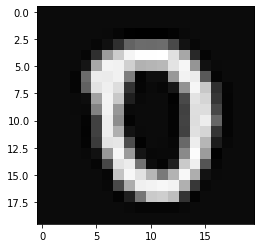

----------------------------------
Label: 	 [8]
Predição: [2]


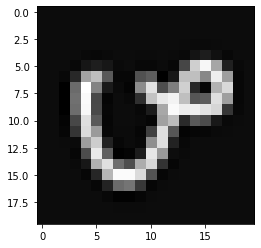

----------------------------------
Label: 	 [0]
Predição: [7]


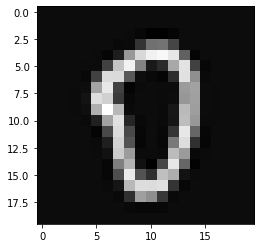

----------------------------------
Label: 	 [0]
Predição: [3]


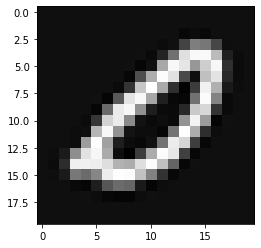

----------------------------------
Label: 	 [0]
Predição: [7]


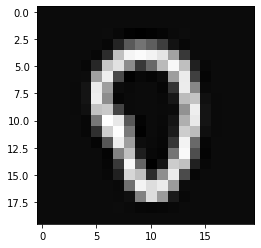

----------------------------------
Label: 	 [0]
Predição: [5]


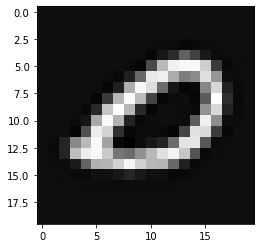

----------------------------------
Label: 	 [0]
Predição: [3]


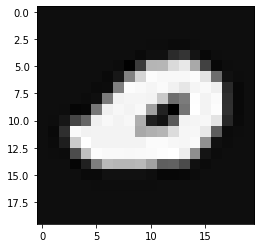

----------------------------------
Label: 	 [5]
Predição: [9]


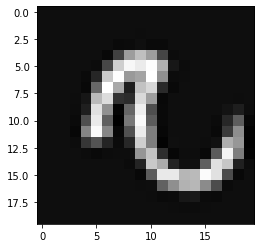

----------------------------------
Label: 	 [2]
Predição: [6]


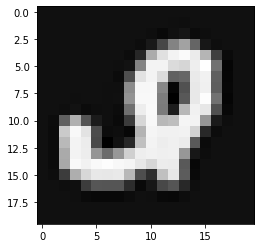

----------------------------------
Label: 	 [0]
Predição: [6]


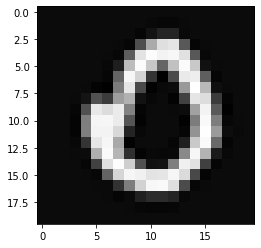

----------------------------------
Label: 	 [5]
Predição: [6]


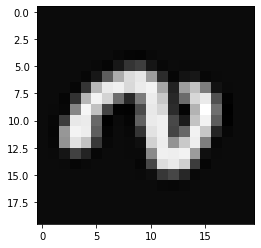

----------------------------------
Label: 	 [0]
Predição: [2]


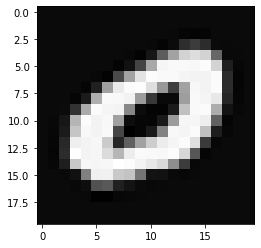

----------------------------------
Label: 	 [0]
Predição: [5]


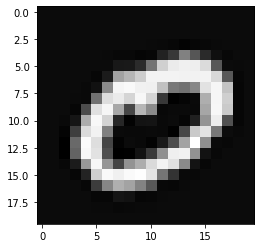

----------------------------------
Label: 	 [9]
Predição: [5]


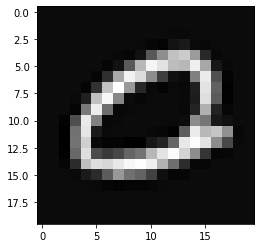

----------------------------------
Label: 	 [0]
Predição: [5]


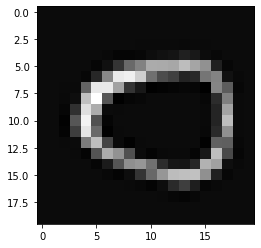

----------------------------------


In [62]:
missFeedback(X_test, Y_test, pred_test_reg)